Distance Matrix:
[[ 0.   30.64 12.9   8.62]
 [30.64  0.   17.75 15.4 ]
 [12.9  17.75  0.   10.69]
 [ 8.62 15.4  10.69  0.  ]]


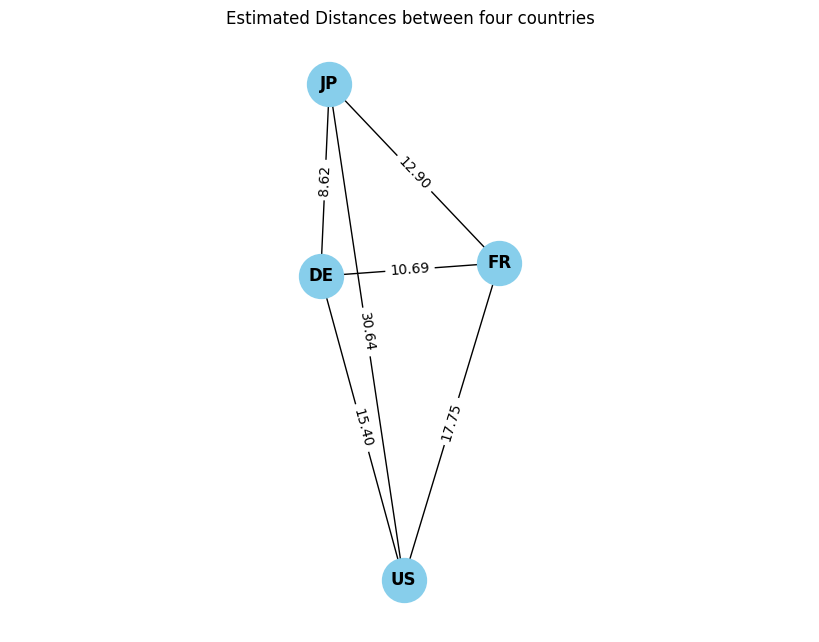

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import MDS
import numpy as np

# Define the distances between the points
de = "DE"
jp = "JP"
fr = "FR"
us = "US"

distances = {
    (de, jp): 8.62,  # Distance between A and B
    (de, fr): 10.69,  # Distance between A and C
    (de, us): 15.40,  # Distance between A and D
    (jp, fr): 12.90,  # Distance between B and C
    (jp, us): 30.64,  # Distance between B and D
    (fr, us): 17.75   # Distance between C and D
}
# Get all unique nodes in the graph
all_nodes = list(set().union(*distances.keys()))

# Initialize the distance matrix with NaN
distance_matrix = np.full((len(all_nodes), len(all_nodes)), np.nan)

# Fill in the known distances
for i, node_i in enumerate(all_nodes):
    for j, node_j in enumerate(all_nodes):
        if i == j:
            distance_matrix[i, j] = 0.0
        elif (node_i, node_j) in distances:
            distance_matrix[i, j] = distances[(node_i, node_j)]
            distance_matrix[j, i] = distances[(node_i, node_j)]  # Make the matrix symmetric

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Perform Multidimensional Scaling (MDS) to estimate the coordinates of the points
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(distance_matrix)

# Map the coordinates to the points
points = {point: coordinates[i] for i, point in enumerate(all_nodes)}

# Create a graph and add nodes and edges
G = nx.Graph()
for edge, weight in distances.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, points, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, points, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_size=10)

plt.title('Estimated Distances between four countries')
plt.axis('equal')

# Save the plot as a PNG file
plt.savefig('graph.png', format='png')

plt.show()


Distance Matrix:
[[ 0.          5.92514647  6.36544069  9.26688485  9.47404922 12.50603623]
 [ 5.92514647  0.         17.97086763 20.4221789  20.33341184 16.12047259]
 [ 6.36544069 17.97086763  0.          1.48327879  2.1402662  18.99651066]
 [ 9.26688485 20.4221789   1.48327879  0.          1.59800325 19.75524001]
 [ 9.47404922 20.33341184  2.1402662   1.59800325  0.         17.88297731]
 [12.50603623 16.12047259 18.99651066 19.75524001 17.88297731  0.        ]]


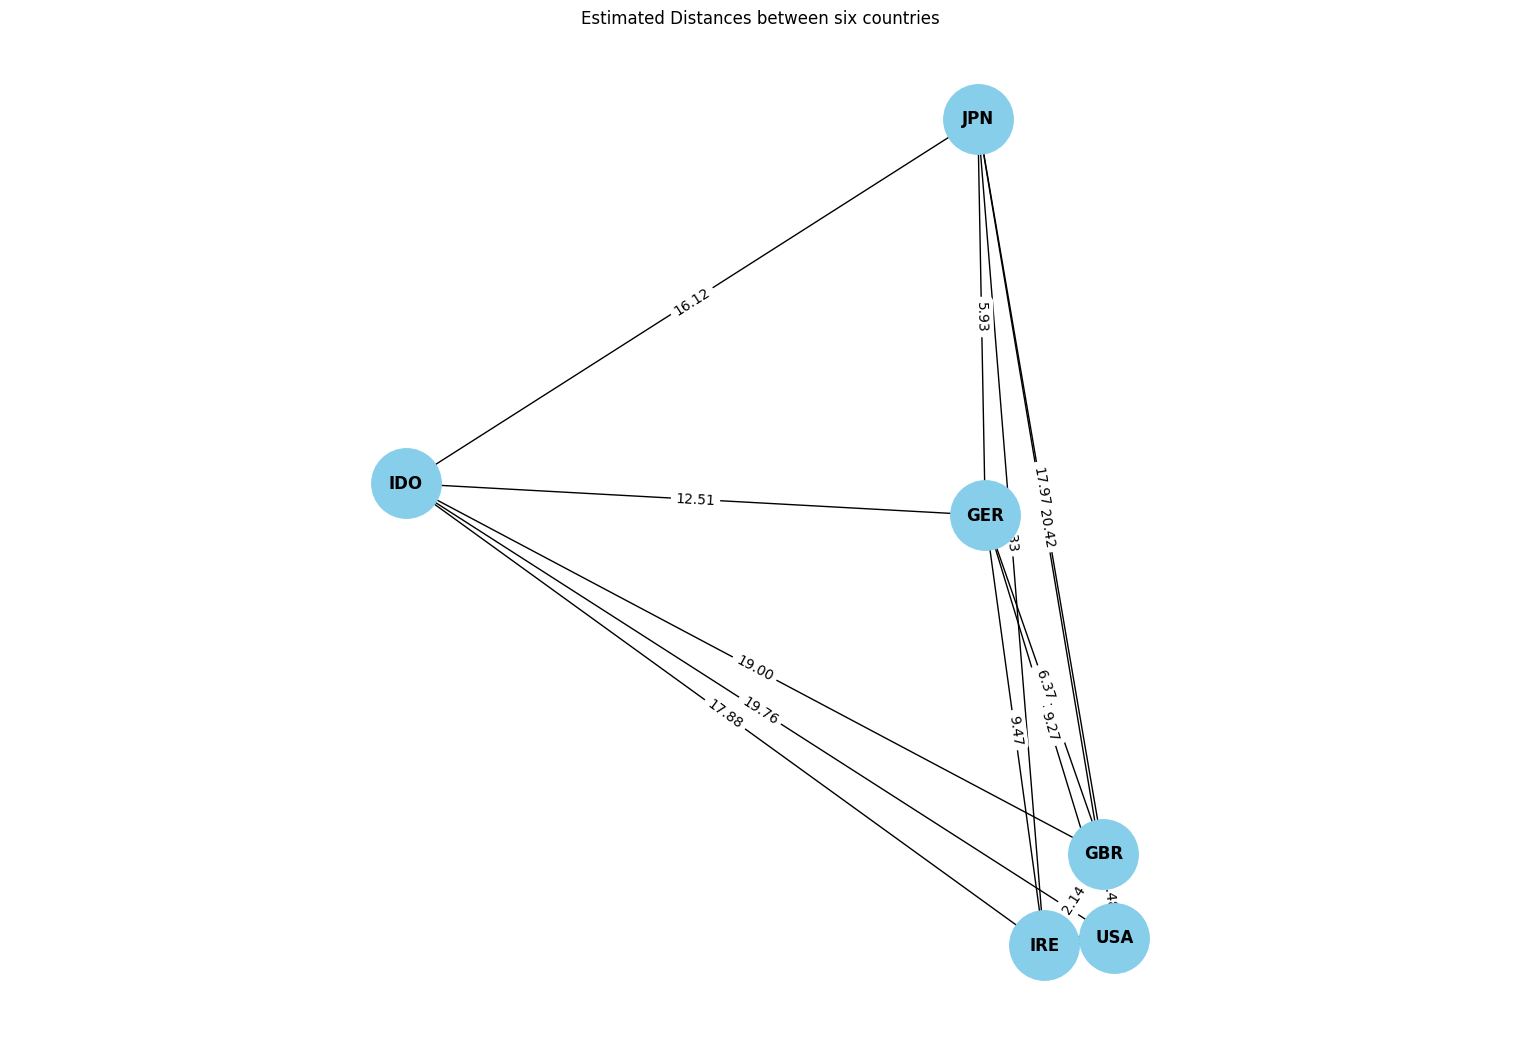

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import MDS
import numpy as np

# Define the distances between the points
GER = "GER"
GBR = "GBR"
IDO = "IDO"
IRE = "IRE"
JPN = "JPN"
USA = "USA"

distances = {
(GER, GBR): 6.365440686,
(GER, IDO): 12.50603623,
(GER, IRE): 9.474049221,
(GER, JPN): 5.925146468,
(GER, USA): 9.266884848,
(GBR, IDO): 18.99651066,
(GBR, IRE): 2.140266202,
(GBR, JPN): 17.97086763,
(GBR, USA): 1.48327879,
(IDO, IRE): 17.88297731,
(IDO, JPN): 16.12047259,
(IDO, USA): 19.75524001,
(IRE, JPN): 20.33341184,
(IRE, USA): 1.598003247,
(JPN, USA): 20.4221789
}

# Get all unique nodes in the graph
all_nodes = list(set().union(*distances.keys()))

# Initialize the distance matrix with NaN
distance_matrix = np.full((len(all_nodes), len(all_nodes)), np.nan)

# Fill in the known distances
for i, node_i in enumerate(all_nodes):
    for j, node_j in enumerate(all_nodes):
        if i == j:
            distance_matrix[i, j] = 0.0
        elif (node_i, node_j) in distances:
            distance_matrix[i, j] = distances[(node_i, node_j)]
            distance_matrix[j, i] = distances[(node_i, node_j)]  # Make the matrix symmetric

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Perform Multidimensional Scaling (MDS) to estimate the coordinates of the points
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(distance_matrix)

# Map the coordinates to the points
points = {point: coordinates[i] for i, point in enumerate(all_nodes)}

# Create a graph and add nodes and edges
G = nx.Graph()
for edge, weight in distances.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Swap x and y coordinates to switch the axes
flipped_points = {point: (y, x) for point, (x, y) in points.items()}

# Plot the graph with the switched axes
plt.figure(figsize=(15, 10))
nx.draw(G, flipped_points, with_labels=True, node_size=2500, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, flipped_points, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_size=10)

plt.title('Estimated Distances between six countries')
plt.axis('equal')
# Adjust the aspect ratio to make the plot narrower
plt.gca().set_aspect(1)

# Save the plot as a PNG file
plt.savefig('big_graph.png', format='png')

plt.show()


Distance Matrix:
[[ 0.    7.77 14.2  ...  6.   11.46  3.68]
 [ 7.77  0.   12.28 ...  4.35  6.64  2.39]
 [14.2  12.28  0.   ... 11.48 23.27 12.37]
 ...
 [ 6.    4.35 11.48 ...  0.    5.4   6.88]
 [11.46  6.64 23.27 ...  5.4   0.   10.62]
 [ 3.68  2.39 12.37 ...  6.88 10.62  0.  ]]


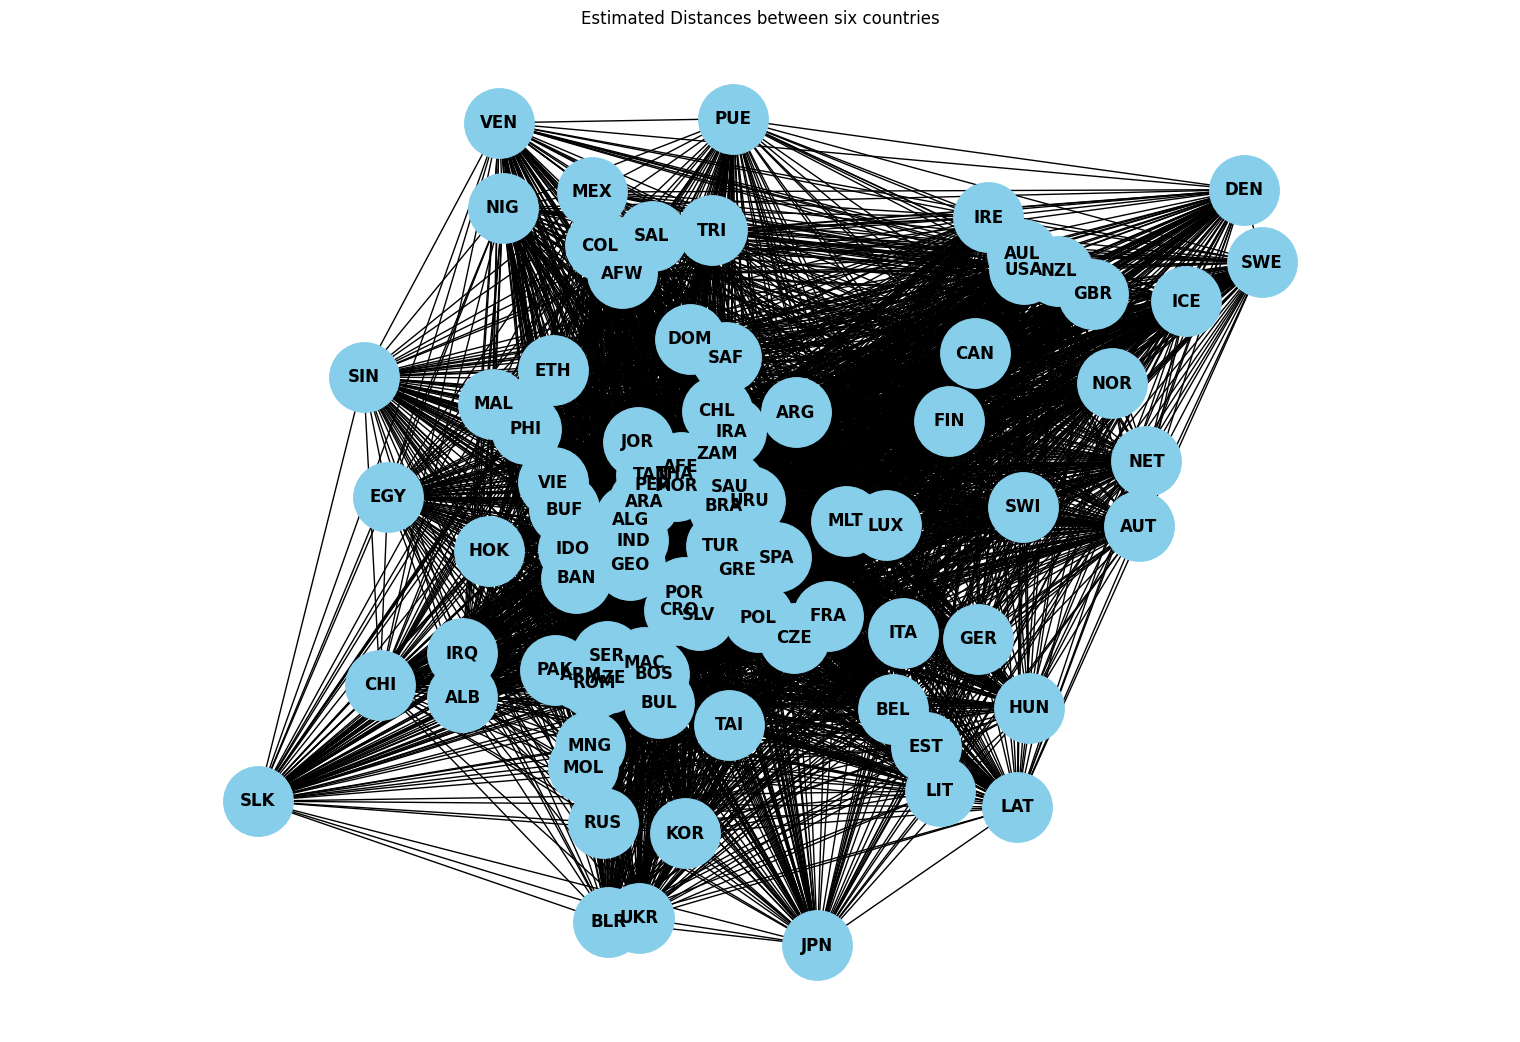

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import MDS
import numpy as np

# Define the distances between the points
AFE = "AFE"
AFW = "AFW"
ALB = "ALB"
ALG = "ALG"
ARA = "ARA"
ARG = "ARG"
ARM = "ARM"
AUL = "AUL"
AUT = "AUT"
AZE = "AZE"
BAN = "BAN"
BEL = "BEL"
BLR = "BLR"
BOS = "BOS"
BRA = "BRA"
BUF = "BUF"
BUL = "BUL"
CAN = "CAN"
CHI = "CHI"
CHL = "CHL"
COL = "COL"
CRO = "CRO"
CZE = "CZE"
DEN = "DEN"
DOM = "DOM"
EGY = "EGY"
EST = "EST"
ETH = "ETH"
FIN = "FIN"
FRA = "FRA"
GBR = "GBR"
GEO = "GEO"
GER = "GER"
GRE = "GRE"
HOK = "HOK"
HUN = "HUN"
ICE = "ICE"
IDO = "IDO"
IND = "IND"
IRA = "IRA"
IRE = "IRE"
IRQ = "IRQ"
ITA = "ITA"
JOR = "JOR"
JPN = "JPN"
KOR = "KOR"
LAT = "LAT"
LIT = "LIT"
LUX = "LUX"
MAC = "MAC"
MAL = "MAL"
MEX = "MEX"
MLT = "MLT"
MNG = "MNG"
MOL = "MOL"
MOR = "MOR"
NET = "NET"
NIG = "NIG"
NOR = "NOR"
NZL = "NZL"
PAK = "PAK"
PER = "PER"
PHI = "PHI"
POL = "POL"
POR = "POR"
PUE = "PUE"
ROM = "ROM"
RUS = "RUS"
SAF = "SAF"
SAL = "SAL"
SAU = "SAU"
SER = "SER"
SIN = "SIN"
SLK = "SLK"
SLV = "SLV"
SPA = "SPA"
SWE = "SWE"
SWI = "SWI"
TAI = "TAI"
TAN = "TAN"
THA = "THA"
TRI = "TRI"
TUR = "TUR"
UKR = "UKR"
URU = "URU"
USA = "USA"
VEN = "VEN"
VIE = "VIE"
ZAM = "ZAM"

distances = {
    (AFE,AFW):4.35,
    (AFE,ALB):9.66,
    (AFE,ALG):1.63,
    (AFE,ARA):2.06,
    (AFE,ARG):5.67,
    (AFE,ARM):6.27,
    (AFE,AUL):12.61,
    (AFE,AUT):15.78,
    (AFE,AZE):6.27,
    (AFE,BAN):2.63,
    (AFE,BEL):13.80,
    (AFE,BLR):14.02,
    (AFE,BOS):7.37,
    (AFE,BRA):2.72,
    (AFE,BUF):1.62,
    (AFE,BUL):6.04,
    (AFE,CAN):8.90,
    (AFE,CHI):9.49,
    (AFE,CHL):4.63,
    (AFE,COL):7.99,
    (AFE,CRO):3.28,
    (AFE,CZE):6.59,
    (AFE,DEN):14.89,
    (AFE,DOM):3.11,
    (AFE,EGY):5.25,
    (AFE,EST):9.52,
    (AFE,ETH):3.27,
    (AFE,FIN):6.24,
    (AFE,FRA):8.15,
    (AFE,GBR):14.26,
    (AFE,GEO):3.46,
    (AFE,GER):11.95,
    (AFE,GRE):6.50,
    (AFE,HOK):4.50,
    (AFE,HUN):16.23,
    (AFE,ICE):13.22,
    (AFE,IDO):2.50,
    (AFE,IND):3.28,
    (AFE,IRA):1.15,
    (AFE,IRE):10.88,
    (AFE,IRQ):8.45,
    (AFE,ITA):10.50,
    (AFE,JOR):1.07,
    (AFE,JPN):18.82,
    (AFE,KOR):10.97,
    (AFE,LAT):11.74,
    (AFE,LIT):10.63,
    (AFE,LUX):6.75,
    (AFE,MAC):6.33,
    (AFE,MAL):4.64,
    (AFE,MEX):11.56,
    (AFE,MLT):8.22,
    (AFE,MNG):8.75,
    (AFE,MOL):9.24,
    (AFE,MOR):2.79,
    (AFE,NET):12.96,
    (AFE,NIG):7.58,
    (AFE,NOR):9.80,
    (AFE,NZL):12.77,
    (AFE,PAK):5.19,
    (AFE,PER):3.09,
    (AFE,PHI):4.01,
    (AFE,POL):7.74,
    (AFE,POR):5.29,
    (AFE,PUE):8.36,
    (AFE,ROM):6.31,
    (AFE,RUS):11.45,
    (AFE,SAF):3.11,
    (AFE,SAL):8.98,
    (AFE,SAU):1.65,
    (AFE,SER):5.69,
    (AFE,SIN):7.62,
    (AFE,SLK):18.73,
    (AFE,SLV):5.07,
    (AFE,SPA):4.26,
    (AFE,SWE):15.06,
    (AFE,SWI):12.47,
    (AFE,TAI):7.67,
    (AFE,TAN):0.12,
    (AFE,THA):0.61,
    (AFE,TRI):5.60,
    (AFE,TUR):3.15,
    (AFE,UKR):14.52,
    (AFE,URU):5.25,
    (AFE,USA):12.31,
    (AFE,VEN):13.02,
    (AFE,VIE):2.40,
    (AFE,ZAM):0.19,
    (AFW,ALB):17.12,
    (AFW,ALG):5.77,
    (AFW,ARA):5.37,
    (AFW,ARG):6.46,
    (AFW,ARM):13.03,
    (AFW,AUL):14.17,
    (AFW,AUT):21.73,
    (AFW,AZE):13.78,
    (AFW,BAN):9.49,
    (AFW,BEL):20.13,
    (AFW,BLR):24.95,
    (AFW,BOS):12.40,
    (AFW,BRA):4.73,
    (AFW,BUF):7.86,
    (AFW,BUL):16.41,
    (AFW,CAN):12.09,
    (AFW,CHI):18.93,
    (AFW,CHL):4.77,
    (AFW,COL):2.88,
    (AFW,CRO):10.16,
    (AFW,CZE):16.26,
    (AFW,DEN):20.17,
    (AFW,DOM):3.40,
    (AFW,EGY):11.13,
    (AFW,EST):24.16,
    (AFW,ETH):3.60,
    (AFW,FIN):11.84,
    (AFW,FRA):14.39,
    (AFW,GBR):18.71,
    (AFW,GEO):8.39,
    (AFW,GER):22.45,
    (AFW,GRE):9.97,
    (AFW,HOK):14.05,
    (AFW,HUN):24.90,
    (AFW,ICE):17.82,
    (AFW,IDO):8.23,
    (AFW,IND):10.66,
    (AFW,IRA):4.68,
    (AFW,IRE):13.60,
    (AFW,IRQ):12.80,
    (AFW,ITA):19.81,
    (AFW,JOR):2.88,
    (AFW,JPN):26.55,
    (AFW,KOR):22.24,
    (AFW,LAT):26.41,
    (AFW,LIT):25.43,
    (AFW,LUX):13.27,
    (AFW,MAC):12.15,
    (AFW,MAL):4.77,
    (AFW,MEX):4.66,
    (AFW,MLT):10.70,
    (AFW,MNG):17.51,
    (AFW,MOL):17.94,
    (AFW,MOR):7.56,
    (AFW,NET):19.83,
    (AFW,NIG):1.49,
    (AFW,NOR):16.37,
    (AFW,NZL):15.52,
    (AFW,PAK):16.75,
    (AFW,PER):5.34,
    (AFW,PHI):5.29,
    (AFW,POL):13.81,
    (AFW,POR):10.31,
    (AFW,PUE):2.51,
    (AFW,ROM):13.36,
    (AFW,RUS):21.03,
    (AFW,SAF):4.38,
    (AFW,SAL):4.37,
    (AFW,SAU):4.43,
    (AFW,SER):11.61,
    (AFW,SIN):13.68,
    (AFW,SLK):25.15,
    (AFW,SLV):9.51,
    (AFW,SPA):10.06,
    (AFW,SWE):19.99,
    (AFW,SWI):18.39,
    (AFW,TAI):15.44,
    (AFW,TAN):4.55,
    (AFW,THA):4.13,
    (AFW,TRI):2.67,
    (AFW,TUR):7.02,
    (AFW,UKR):26.17,
    (AFW,URU):7.30,
    (AFW,USA):14.65,
    (AFW,VEN):4.47,
    (AFW,VIE):9.18,
    (AFW,ZAM):4.60,
    (ALB,ALG):9.11,
    (ALB,ARA):5.94,
    (ALB,ARG):14.35,
    (ALB,ARM):3.89,
    (ALB,AUL):25.03,
    (ALB,AUT):21.07,
    (ALB,AZE):3.60,
    (ALB,BAN):2.84,
    (ALB,BEL):13.51,
    (ALB,BLR):13.91,
    (ALB,BOS):5.86,
    (ALB,BRA):8.60,
    (ALB,BUF):6.51,
    (ALB,BUL):6.44,
    (ALB,CAN):21.74,
    (ALB,CHI):5.79,
    (ALB,CHL):17.65,
    (ALB,COL):15.78,
    (ALB,CRO):6.49,
    (ALB,CZE):6.64,
    (ALB,DEN):41.15,
    (ALB,DOM):10.83,
    (ALB,EGY):8.37,
    (ALB,EST):16.70,
    (ALB,ETH):8.68,
    (ALB,FIN):23.83,
    (ALB,FRA):11.76,
    (ALB,GBR):23.89,
    (ALB,GEO):5.67,
    (ALB,GER):13.10,
    (ALB,GRE):8.73,
    (ALB,HOK):6.48,
    (ALB,HUN):11.11,
    (ALB,ICE):37.68,
    (ALB,IDO):6.28,
    (ALB,IND):5.40,
    (ALB,IRA):12.37,
    (ALB,IRE):23.27,
    (ALB,IRQ):6.11,
    (ALB,ITA):9.29,
    (ALB,JOR):9.93,
    (ALB,JPN):8.28,
    (ALB,KOR):10.97,
    (ALB,LAT):24.18,
    (ALB,LIT):19.76,
    (ALB,LUX):14.17,
    (ALB,MAC):5.46,
    (ALB,MAL):9.68,
    (ALB,MEX):16.51,
    (ALB,MLT):15.00,
    (ALB,MNG):4.39,
    (ALB,MOL):6.68,
    (ALB,MOR):7.96,
    (ALB,NET):31.36,
    (ALB,NIG):16.76,
    (ALB,NOR):32.72,
    (ALB,NZL):27.24,
    (ALB,PAK):6.66,
    (ALB,PER):11.04,
    (ALB,PHI):5.81,
    (ALB,POL):6.52,
    (ALB,POR):13.44,
    (ALB,PUE):23.25,
    (ALB,ROM):5.47,
    (ALB,RUS):8.30,
    (ALB,SAF):11.73,
    (ALB,SAL):21.34,
    (ALB,SAU):9.65,
    (ALB,SER):5.74,
    (ALB,SIN):14.37,
    (ALB,SLK):4.24,
    (ALB,SLV):15.26,
    (ALB,SPA):10.62,
    (ALB,SWE):40.78,
    (ALB,SWI):16.82,
    (ALB,TAI):10.45,
    (ALB,TAN):9.02,
    (ALB,THA):11.46,
    (ALB,TRI):19.00,
    (ALB,TUR):8.46,
    (ALB,UKR):12.52,
    (ALB,URU):14.24,
    (ALB,USA):23.85,
    (ALB,VEN):18.61,
    (ALB,VIE):10.24,
    (ALB,ZAM):11.14,
    (ALG,ARA):1.17,
    (ALG,ARG):6.60,
    (ALG,ARM):3.98,
    (ALG,AUL):17.31,
    (ALG,AUT):22.56,
    (ALG,AZE):3.81,
    (ALG,BAN):2.65,
    (ALG,BEL):13.73,
    (ALG,BLR):9.18,
    (ALG,BOS):5.31,
    (ALG,BRA):3.12,
    (ALG,BUF):2.18,
    (ALG,BUL):4.57,
    (ALG,CAN):13.73,
    (ALG,CHI):13.26,
    (ALG,CHL):4.07,
    (ALG,COL):9.08,
    (ALG,CRO):2.25,
    (ALG,CZE):7.82,
    (ALG,DEN):22.09,
    (ALG,DOM):6.05,
    (ALG,EGY):4.38,
    (ALG,EST):12.02,
    (ALG,ETH):5.04,
    (ALG,FIN):9.54,
    (ALG,FRA):7.42,
    (ALG,GBR):21.22,
    (ALG,GEO):2.88,
    (ALG,GER):16.47,
    (ALG,GRE):5.75,
    (ALG,HOK):8.14,
    (ALG,HUN):18.44,
    (ALG,ICE):16.84,
    (ALG,IDO):4.22,
    (ALG,IND):5.20,
    (ALG,IRA):2.28,
    (ALG,IRE):17.90,
    (ALG,IRQ):3.64,
    (ALG,ITA):12.36,
    (ALG,JOR):1.17,
    (ALG,JPN):21.12,
    (ALG,KOR):11.39,
    (ALG,LAT):12.48,
    (ALG,LIT):12.18,
    (ALG,LUX):10.06,
    (ALG,MAC):3.71,
    (ALG,MAL):5.83,
    (ALG,MEX):12.13,
    (ALG,MLT):8.09,
    (ALG,MNG):6.06,
    (ALG,MOL):5.56,
    (ALG,MOR):2.14,
    (ALG,NET):16.74,
    (ALG,NIG):9.62,
    (ALG,NOR):13.14,
    (ALG,NZL):19.22,
    (ALG,PAK):5.65,
    (ALG,PER):2.11,
    (ALG,PHI):4.72,
    (ALG,POL):6.19,
    (ALG,POR):2.61,
    (ALG,PUE):12.11,
    (ALG,ROM):2.74,
    (ALG,RUS):7.58,
    (ALG,SAF):7.73,
    (ALG,SAL):8.45,
    (ALG,SAU):2.09,
    (ALG,SER):2.60,
    (ALG,SIN):13.31,
    (ALG,SLK):20.19,
    (ALG,SLV):3.12,
    (ALG,SPA):4.05,
    (ALG,SWE):21.05,
    (ALG,SWI):18.38,
    (ALG,TAI):10.21,
    (ALG,TAN):1.41,
    (ALG,THA):1.25,
    (ALG,TRI):9.87,
    (ALG,TUR):2.66,
    (ALG,UKR):10.19,
    (ALG,URU):3.58,
    (ALG,USA):17.30,
    (ALG,VEN):14.28,
    (ALG,VIE):5.70,
    (ALG,ZAM):2.21,
    (ARA,ARG):4.73,
    (ARA,ARM):4.52,
    (ARA,AUL):12.99,
    (ARA,AUT):18.14,
    (ARA,AZE):3.98,
    (ARA,BAN):2.18,
    (ARA,BEL):11.83,
    (ARA,BLR):12.26,
    (ARA,BOS):5.20,
    (ARA,BRA):2.48,
    (ARA,BUF):2.19,
    (ARA,BUL):5.87,
    (ARA,CAN):10.90,
    (ARA,CHI):11.71,
    (ARA,CHL):6.12,
    (ARA,COL):7.19,
    (ARA,CRO):3.15,
    (ARA,CZE):6.11,
    (ARA,DEN):23.16,
    (ARA,DOM):3.10,
    (ARA,EGY):3.81,
    (ARA,EST):13.29,
    (ARA,ETH):3.33,
    (ARA,FIN):10.35,
    (ARA,FRA):6.66,
    (ARA,GBR):16.59,
    (ARA,GEO):2.61,
    (ARA,GER):13.43,
    (ARA,GRE):4.63,
    (ARA,HOK):7.17,
    (ARA,HUN):12.51,
    (ARA,ICE):18.43,
    (ARA,IDO):4.86,
    (ARA,IND):3.47,
    (ARA,IRA):1.88,
    (ARA,IRE):13.45,
    (ARA,IRQ):3.32,
    (ARA,ITA):8.51,
    (ARA,JOR):1.33,
    (ARA,JPN):15.92,
    (ARA,KOR):13.44,
    (ARA,LAT):15.61,
    (ARA,LIT):14.69,
    (ARA,LUX):8.73,
    (ARA,MAC):3.91,
    (ARA,MAL):5.13,
    (ARA,MEX):9.13,
    (ARA,MLT):7.09,
    (ARA,MNG):6.67,
    (ARA,MOL):7.16,
    (ARA,MOR):0.67,
    (ARA,NET):18.43,
    (ARA,NIG):8.39,
    (ARA,NOR):15.61,
    (ARA,NZL):15.69,
    (ARA,PAK):6.21,
    (ARA,PER):3.00,
    (ARA,PHI):2.33,
    (ARA,POL):3.47,
    (ARA,POR):4.56,
    (ARA,PUE):9.49,
    (ARA,ROM):3.66,
    (ARA,RUS):9.19,
    (ARA,SAF):5.71,
    (ARA,SAL):9.13,
    (ARA,SAU):1.62,
    (ARA,SER):3.53,
    (ARA,SIN):13.21,
    (ARA,SLK):13.87,
    (ARA,SLV):6.39,
    (ARA,SPA):3.97,
    (ARA,SWE):23.60,
    (ARA,SWI):14.51,
    (ARA,TAI):11.27,
    (ARA,TAN):2.04,
    (ARA,THA):2.75,
    (ARA,TRI):8.34,
    (ARA,TUR):2.68,
    (ARA,UKR):12.32,
    (ARA,URU):4.26,
    (ARA,USA):12.87,
    (ARA,VEN):11.30,
    (ARA,VIE):6.59,
    (ARA,ZAM):2.42,
    (ARG,ARM):10.51,
    (ARG,AUL):6.96,
    (ARG,AUT):8.61,
    (ARG,AZE):9.96,
    (ARG,BAN):9.85,
    (ARG,BEL):9.20,
    (ARG,BLR):20.09,
    (ARG,BOS):9.34,
    (ARG,BRA):2.49,
    (ARG,BUF):9.03,
    (ARG,BUL):10.71,
    (ARG,CAN):6.22,
    (ARG,CHI):21.55,
    (ARG,CHL):4.15,
    (ARG,COL):4.11,
    (ARG,CRO):6.76,
    (ARG,CZE):7.29,
    (ARG,DEN):17.93,
    (ARG,DOM):4.89,
    (ARG,EGY):13.44,
    (ARG,EST):15.02,
    (ARG,ETH):6.92,
    (ARG,FIN):6.12,
    (ARG,FRA):6.22,
    (ARG,GBR):11.85,
    (ARG,GEO):4.81,
    (ARG,GER):10.53,
    (ARG,GRE):2.34,
    (ARG,HOK):15.80,
    (ARG,HUN):9.82,
    (ARG,ICE):12.94,
    (ARG,IDO):11.71,
    (ARG,IND):10.78,
    (ARG,IRA):3.37,
    (ARG,IRE):8.37,
    (ARG,IRQ):10.67,
    (ARG,ITA):7.57,
    (ARG,JOR):4.44,
    (ARG,JPN):13.67,
    (ARG,KOR):16.08,
    (ARG,LAT):17.97,
    (ARG,LIT):16.53,
    (ARG,LUX):4.72,
    (ARG,MAC):9.02,
    (ARG,MAL):13.46,
    (ARG,MEX):5.94,
    (ARG,MLT):2.22,
    (ARG,MNG):13.37,
    (ARG,MOL):14.00,
    (ARG,MOR):4.55,
    (ARG,NET):14.22,
    (ARG,NIG):9.60,
    (ARG,NOR):12.13,
    (ARG,NZL):7.51,
    (ARG,PAK):11.87,
    (ARG,PER):3.42,
    (ARG,PHI):10.20,
    (ARG,POL):4.26,
    (ARG,POR):5.20,
    (ARG,PUE):8.19,
    (ARG,ROM):10.44,
    (ARG,RUS):16.15,
    (ARG,SAF):4.53,
    (ARG,SAL):4.45,
    (ARG,SAU):3.50,
    (ARG,SER):8.81,
    (ARG,SIN):21.64,
    (ARG,SLK):22.88,
    (ARG,SLV):7.89,
    (ARG,SPA):2.81,
    (ARG,SWE):19.43,
    (ARG,SWI):8.95,
    (ARG,TAI):12.52,
    (ARG,TAN):7.01,
    (ARG,THA):5.20,
    (ARG,TRI):4.59,
    (ARG,TUR):2.74,
    (ARG,UKR):19.52,
    (ARG,URU):2.06,
    (ARG,USA):7.87,
    (ARG,VEN):8.66,
    (ARG,VIE):13.88,
    (ARG,ZAM):5.11,
    (ARM,AUL):25.95,
    (ARM,AUT):22.07,
    (ARM,AZE):0.25,
    (ARM,BAN):2.27,
    (ARM,BEL):10.37,
    (ARM,BLR):5.83,
    (ARM,BOS):1.95,
    (ARM,BRA):4.57,
    (ARM,BUF):5.07,
    (ARM,BUL):1.46,
    (ARM,CAN):21.02,
    (ARM,CHI):9.44,
    (ARM,CHL):7.93,
    (ARM,COL):12.20,
    (ARM,CRO):1.43,
    (ARM,CZE):5.89,
    (ARM,DEN):35.04,
    (ARM,DOM):12.26,
    (ARM,EGY):8.55,
    (ARM,EST):12.32,
    (ARM,ETH):8.56,
    (ARM,FIN):17.13,
    (ARM,FRA):7.53,
    (ARM,GBR):26.96,
    (ARM,GEO):2.09,
    (ARM,GER):14.08,
    (ARM,GRE):4.27,
    (ARM,HOK):8.75,
    (ARM,HUN):15.87,
    (ARM,ICE):29.10,
    (ARM,IDO):4.04,
    (ARM,IND):7.36,
    (ARM,IRA):9.19,
    (ARM,IRE):25.95,
    (ARM,IRQ):3.04,
    (ARM,ITA):11.30,
    (ARM,JOR):5.99,
    (ARM,JPN):11.96,
    (ARM,KOR):4.60,
    (ARM,LAT):16.34,
    (ARM,LIT):13.03,
    (ARM,LUX):11.06,
    (ARM,MAC):1.36,
    (ARM,MAL):9.36,
    (ARM,MEX):14.13,
    (ARM,MLT):9.24,
    (ARM,MNG):0.63,
    (ARM,MOL):0.97,
    (ARM,MOR):6.96,
    (ARM,NET):23.30,
    (ARM,NIG):14.20,
    (ARM,NOR):23.72,
    (ARM,NZL):26.80,
    (ARM,PAK):4.34,
    (ARM,PER):4.40,
    (ARM,PHI):8.08,
    (ARM,POL):5.88,
    (ARM,POR):4.76,
    (ARM,PUE):22.45,
    (ARM,ROM):0.78,
    (ARM,RUS):2.54,
    (ARM,SAF):11.16,
    (ARM,SAL):12.26,
    (ARM,SAU):6.21,
    (ARM,SER):0.47,
    (ARM,SIN):15.47,
    (ARM,SLK):13.97,
    (ARM,SLV):4.87,
    (ARM,SPA):5.33,
    (ARM,SWE):32.07,
    (ARM,SWI):18.07,
    (ARM,TAI):5.56,
    (ARM,TAN):5.76,
    (ARM,THA):5.39,
    (ARM,TRI):16.06,
    (ARM,TUR):3.26,
    (ARM,UKR):5.95,
    (ARM,URU):6.43,
    (ARM,USA):25.55,
    (ARM,VEN):16.62,
    (ARM,VIE):8.48,
    (ARM,ZAM):7.87,
    (AUL,AUT):8.70,
    (AUL,AZE):23.65,
    (AUL,BAN):20.29,
    (AUL,BEL):13.33,
    (AUL,BLR):33.07,
    (AUL,BOS):20.35,
    (AUL,BRA):10.56,
    (AUL,BUF):19.31,
    (AUL,BUL):23.29,
    (AUL,CAN):0.87,
    (AUL,CHI):26.75,
    (AUL,CHL):16.36,
    (AUL,COL):15.74,
    (AUL,CRO):17.65,
    (AUL,CZE):11.74,
    (AUL,DEN):9.67,
    (AUL,DOM):7.78,
    (AUL,EGY):25.00,
    (AUL,EST):17.32,
    (AUL,ETH):17.16,
    (AUL,FIN):6.22,
    (AUL,FRA):10.68,
    (AUL,GBR):2.25,
    (AUL,GEO):18.76,
    (AUL,GER):10.20,
    (AUL,GRE):14.21,
    (AUL,HOK):19.98,
    (AUL,HUN):10.22,
    (AUL,ICE):8.26,
    (AUL,IDO):20.80,
    (AUL,IND):12.97,
    (AUL,IRA):8.70,
    (AUL,IRE):1.81,
    (AUL,IRQ):26.94,
    (AUL,ITA):8.35,
    (AUL,JOR):14.72,
    (AUL,JPN):21.10,
    (AUL,KOR):29.62,
    (AUL,LAT):20.03,
    (AUL,LIT):20.04,
    (AUL,LUX):6.60,
    (AUL,MAC):20.46,
    (AUL,MAL):19.11,
    (AUL,MEX):15.05,
    (AUL,MLT):8.92,
    (AUL,MNG):27.77,
    (AUL,MOL):29.60,
    (AUL,MOR):11.27,
    (AUL,NET):10.64,
    (AUL,NIG):20.37,
    (AUL,NOR):10.34,
    (AUL,NZL):1.17,
    (AUL,PAK):24.39,
    (AUL,PER):17.40,
    (AUL,PHI):15.89,
    (AUL,POL):11.78,
    (AUL,POR):19.88,
    (AUL,PUE):8.36,
    (AUL,ROM):24.70,
    (AUL,RUS):29.89,
    (AUL,SAF):9.40,
    (AUL,SAL):17.66,
    (AUL,SAU):8.65,
    (AUL,SER):23.70,
    (AUL,SIN):22.96,
    (AUL,SLK):25.80,
    (AUL,SLV):21.06,
    (AUL,SPA):10.31,
    (AUL,SWE):13.29,
    (AUL,SWI):6.31,
    (AUL,TAI):22.81,
    (AUL,TAN):14.40,
    (AUL,THA):15.21,
    (AUL,TRI):11.10,
    (AUL,TUR):12.68,
    (AUL,UKR):30.96,
    (AUL,URU):14.04,
    (AUL,USA):0.13,
    (AUL,VEN):19.70,
    (AUL,VIE):19.06,
    (AUL,ZAM):10.14,
    (AUT,AZE):21.16,
    (AUT,BAN):19.72,
    (AUT,BEL):11.87,
    (AUT,BLR):34.31,
    (AUT,BOS):19.89,
    (AUT,BRA):11.95,
    (AUT,BUF):20.41,
    (AUT,BUL):19.17,
    (AUT,CAN):7.43,
    (AUT,CHI):22.13,
    (AUT,CHL):18.46,
    (AUT,COL):16.53,
    (AUT,CRO):16.79,
    (AUT,CZE):9.06,
    (AUT,DEN):18.90,
    (AUT,DOM):13.59,
    (AUT,EGY):28.88,
    (AUT,EST):14.76,
    (AUT,ETH):18.21,
    (AUT,FIN):10.99,
    (AUT,FRA):13.27,
    (AUT,GBR):7.04,
    (AUT,GEO):15.09,
    (AUT,GER):4.20,
    (AUT,GRE):10.73,
    (AUT,HOK):18.88,
    (AUT,HUN):6.74,
    (AUT,ICE):19.53,
    (AUT,IDO):19.65,
    (AUT,IND):16.99,
    (AUT,IRA):14.65,
    (AUT,IRE):6.48,
    (AUT,IRQ):29.39,
    (AUT,ITA):6.95,
    (AUT,JOR):18.49,
    (AUT,JPN):8.69,
    (AUT,KOR):18.85,
    (AUT,LAT):23.08,
    (AUT,LIT):18.52,
    (AUT,LUX):4.75,
    (AUT,MAC):21.15,
    (AUT,MAL):26.49,
    (AUT,MEX):18.17,
    (AUT,MLT):9.81,
    (AUT,MNG):23.61,
    (AUT,MOL):26.78,
    (AUT,MOR):17.15,
    (AUT,NET):16.54,
    (AUT,NIG):23.64,
    (AUT,NOR):18.73,
    (AUT,NZL):5.27,
    (AUT,PAK):18.43,
    (AUT,PER):17.21,
    (AUT,PHI):22.55,
    (AUT,POL):12.84,
    (AUT,POR):20.43,
    (AUT,PUE):19.72,
    (AUT,ROM):25.01,
    (AUT,RUS):28.07,
    (AUT,SAF):8.39,
    (AUT,SAL):19.80,
    (AUT,SAU):14.31,
    (AUT,SER):22.79,
    (AUT,SIN):24.11,
    (AUT,SLK):24.13,
    (AUT,SLV):22.46,
    (AUT,SPA):10.80,
    (AUT,SWE):22.29,
    (AUT,SWI):2.52,
    (AUT,TAI):13.91,
    (AUT,TAN):18.02,
    (AUT,THA):17.36,
    (AUT,TRI):12.34,
    (AUT,TUR):12.64,
    (AUT,UKR):31.27,
    (AUT,URU):15.76,
    (AUT,USA):8.75,
    (AUT,VEN):21.65,
    (AUT,VIE):20.43,
    (AUT,ZAM):14.49,
    (AZE,BAN):2.34,
    (AZE,BEL):8.54,
    (AZE,BLR):4.65,
    (AZE,BOS):1.45,
    (AZE,BRA):4.33,
    (AZE,BUF):5.33,
    (AZE,BUL):1.06,
    (AZE,CAN):19.10,
    (AZE,CHI):9.55,
    (AZE,CHL):8.43,
    (AZE,COL):13.31,
    (AZE,CRO):1.09,
    (AZE,CZE):4.44,
    (AZE,DEN):33.40,
    (AZE,DOM):11.97,
    (AZE,EGY):8.73,
    (AZE,EST):10.63,
    (AZE,ETH):9.48,
    (AZE,FIN):15.81,
    (AZE,FRA):5.76,
    (AZE,GBR):24.67,
    (AZE,GEO):2.51,
    (AZE,GER):12.38,
    (AZE,GRE):4.05,
    (AZE,HOK):8.56,
    (AZE,HUN):13.52,
    (AZE,ICE):27.04,
    (AZE,IDO):4.57,
    (AZE,IND):6.31,
    (AZE,IRA):8.60,
    (AZE,IRE):24.42,
    (AZE,IRQ):2.86,
    (AZE,ITA):9.11,
    (AZE,JOR):6.33,
    (AZE,JPN):11.18,
    (AZE,KOR):4.85,
    (AZE,LAT):14.20,
    (AZE,LIT):11.35,
    (AZE,LUX):9.85,
    (AZE,MAC):0.75,
    (AZE,MAL):9.60,
    (AZE,MEX):14.68,
    (AZE,MLT):8.20,
    (AZE,MNG):0.40,
    (AZE,MOL):0.73,
    (AZE,MOR):5.98,
    (AZE,NET):21.38,
    (AZE,NIG):15.87,
    (AZE,NOR):22.12,
    (AZE,NZL):25.01,
    (AZE,PAK):4.42,
    (AZE,PER):4.95,
    (AZE,PHI):7.89,
    (AZE,POL):4.35,
    (AZE,POR):4.68,
    (AZE,PUE):22.36,
    (AZE,ROM):0.42,
    (AZE,RUS):1.80,
    (AZE,SAF):11.61,
    (AZE,SAL):13.18,
    (AZE,SAU):5.46,
    (AZE,SER):0.42,
    (AZE,SIN):15.84,
    (AZE,SLK):12.77,
    (AZE,SLV):4.97,
    (AZE,SPA):4.36,
    (AZE,SWE):30.66,
    (AZE,SWI):16.64,
    (AZE,TAI):6.09,
    (AZE,TAN):5.82,
    (AZE,THA):5.75,
    (AZE,TRI):17.00,
    (AZE,TUR):2.95,
    (AZE,UKR):4.46,
    (AZE,URU):6.21,
    (AZE,USA):23.16,
    (AZE,VEN):17.96,
    (AZE,VIE):8.72,
    (AZE,ZAM):7.55,
    (BAN,BEL):13.77,
    (BAN,BLR):10.54,
    (BAN,BOS):4.83,
    (BAN,BRA):4.59,
    (BAN,BUF):1.13,
    (BAN,BUL):3.37,
    (BAN,CAN):16.08,
    (BAN,CHI):5.19,
    (BAN,CHL):9.39,
    (BAN,COL):11.46,
    (BAN,CRO):2.55,
    (BAN,CZE):5.59,
    (BAN,DEN):27.67,
    (BAN,DOM):6.27,
    (BAN,EGY):3.47,
    (BAN,EST):11.02,
    (BAN,ETH):4.17,
    (BAN,FIN):14.27,
    (BAN,FRA):9.28,
    (BAN,GBR):20.55,
    (BAN,GEO):2.39,
    (BAN,GER):12.63,
    (BAN,GRE):6.70,
    (BAN,HOK):2.88,
    (BAN,HUN):14.55,
    (BAN,ICE):25.02,
    (BAN,IDO):1.67,
    (BAN,IND):2.52,
    (BAN,IRA):5.16,
    (BAN,IRE):18.13,
    (BAN,IRQ):4.47,
    (BAN,ITA):9.94,
    (BAN,JOR):3.33,
    (BAN,JPN):13.94,
    (BAN,KOR):8.22,
    (BAN,LAT):15.33,
    (BAN,LIT):12.74,
    (BAN,LUX):10.29,
    (BAN,MAC):3.76,
    (BAN,MAL):5.13,
    (BAN,MEX):14.43,
    (BAN,MLT):11.52,
    (BAN,MNG):3.75,
    (BAN,MOL):4.82,
    (BAN,MOR):3.66,
    (BAN,NET):21.63,
    (BAN,NIG):10.98,
    (BAN,NOR):19.99,
    (BAN,NZL):21.40,
    (BAN,PAK):2.67,
    (BAN,PER):4.94,
    (BAN,PHI):3.21,
    (BAN,POL):6.38,
    (BAN,POR):6.85,
    (BAN,PUE):15.94,
    (BAN,ROM):2.97,
    (BAN,RUS):6.92,
    (BAN,SAF):6.72,
    (BAN,SAL):14.33,
    (BAN,SAU):4.36,
    (BAN,SER):2.99,
    (BAN,SIN):8.61,
    (BAN,SLK):10.97,
    (BAN,SLV):7.49,
    (BAN,SPA):6.26,
    (BAN,SWE):27.17,
    (BAN,SWI):15.67,
    (BAN,TAI):7.04,
    (BAN,TAN):2.12,
    (BAN,THA):3.61,
    (BAN,TRI):11.84,
    (BAN,TUR):4.36,
    (BAN,UKR):10.53,
    (BAN,URU):8.33,
    (BAN,USA):19.47,
    (BAN,VEN):15.93,
    (BAN,VIE):3.52,
    (BAN,ZAM):3.76,
    (BEL,BLR):10.55,
    (BEL,BOS):4.67,
    (BEL,BRA):6.02,
    (BEL,BUF):18.71,
    (BEL,BUL):8.34,
    (BEL,CAN):10.30,
    (BEL,CHI):18.01,
    (BEL,CHL):12.23,
    (BEL,COL):17.86,
    (BEL,CRO):6.73,
    (BEL,CZE):3.41,
    (BEL,DEN):25.00,
    (BEL,DOM):16.68,
    (BEL,EGY):26.72,
    (BEL,EST):9.53,
    (BEL,ETH):21.07,
    (BEL,FIN):11.22,
    (BEL,FRA):1.35,
    (BEL,GBR):12.61,
    (BEL,GEO):11.76,
    (BEL,GER):5.15,
    (BEL,GRE):5.76,
    (BEL,HOK):18.08,
    (BEL,HUN):7.08,
    (BEL,ICE):18.52,
    (BEL,IDO):13.85,
    (BEL,IND):11.75,
    (BEL,IRA):14.11,
    (BEL,IRE):17.63,
    (BEL,IRQ):16.16,
    (BEL,ITA):4.32,
    (BEL,JOR):16.04,
    (BEL,JPN):7.53,
    (BEL,KOR):9.30,
    (BEL,LAT):13.46,
    (BEL,LIT):10.57,
    (BEL,LUX):3.83,
    (BEL,MAC):5.88,
    (BEL,MAL):17.98,
    (BEL,MEX):14.58,
    (BEL,MLT):3.16,
    (BEL,MNG):8.64,
    (BEL,MOL):9.69,
    (BEL,MOR):13.31,
    (BEL,NET):10.98,
    (BEL,NIG):24.66,
    (BEL,NOR):17.42,
    (BEL,NZL):13.84,
    (BEL,PAK):16.92,
    (BEL,PER):13.22,
    (BEL,PHI):17.15,
    (BEL,POL):5.71,
    (BEL,POR):12.38,
    (BEL,PUE):22.87,
    (BEL,ROM):10.16,
    (BEL,RUS):8.07,
    (BEL,SAF):14.66,
    (BEL,SAL):15.42,
    (BEL,SAU):7.64,
    (BEL,SER):9.50,
    (BEL,SIN):22.82,
    (BEL,SLK):16.15,
    (BEL,SLV):10.40,
    (BEL,SPA):4.21,
    (BEL,SWE):21.73,
    (BEL,SWI):6.31,
    (BEL,TAI):8.57,
    (BEL,TAN):14.50,
    (BEL,THA):13.71,
    (BEL,TRI):20.30,
    (BEL,TUR):5.62,
    (BEL,UKR):8.40,
    (BEL,URU):9.33,
    (BEL,USA):13.01,
    (BEL,VEN):21.38,
    (BEL,VIE):17.55,
    (BEL,ZAM):13.20,
    (BLR,BOS):4.57,
    (BLR,BRA):11.37,
    (BLR,BUF):15.00,
    (BLR,BUL):3.82,
    (BLR,CAN):26.57,
    (BLR,CHI):17.98,
    (BLR,CHL):13.96,
    (BLR,COL):27.83,
    (BLR,CRO):4.87,
    (BLR,CZE):9.39,
    (BLR,DEN):36.68,
    (BLR,DOM):25.11,
    (BLR,EGY):20.00,
    (BLR,EST):10.56,
    (BLR,ETH):24.19,
    (BLR,FIN):19.36,
    (BLR,FRA):7.27,
    (BLR,GBR):33.55,
    (BLR,GEO):12.02,
    (BLR,GER):18.99,
    (BLR,GRE):12.17,
    (BLR,HOK):17.22,
    (BLR,HUN):23.58,
    (BLR,ICE):27.54,
    (BLR,IDO):11.51,
    (BLR,IND):13.18,
    (BLR,IRA):16.96,
    (BLR,IRE):37.26,
    (BLR,IRQ):9.86,
    (BLR,ITA):15.99,
    (BLR,JOR):15.86,
    (BLR,JPN):22.65,
    (BLR,KOR):7.02,
    (BLR,LAT):10.07,
    (BLR,LIT):9.03,
    (BLR,LUX):15.47,
    (BLR,MAC):3.64,
    (BLR,MAL):17.65,
    (BLR,MEX):27.67,
    (BLR,MLT):13.25,
    (BLR,MNG):3.51,
    (BLR,MOL):2.21,
    (BLR,MOR):14.51,
    (BLR,NET):19.65,
    (BLR,NIG):30.84,
    (BLR,NOR):22.46,
    (BLR,NZL):34.84,
    (BLR,PAK):12.32,
    (BLR,PER):13.30,
    (BLR,PHI):18.64,
    (BLR,POL):11.55,
    (BLR,POR):9.29,
    (BLR,PUE):35.46,
    (BLR,ROM):3.74,
    (BLR,RUS):0.99,
    (BLR,SAF):24.97,
    (BLR,SAL):22.16,
    (BLR,SAU):11.24,
    (BLR,SER):4.65,
    (BLR,SIN):23.62,
    (BLR,SLK):24.11,
    (BLR,SLV):6.29,
    (BLR,SPA):8.71,
    (BLR,SWE):30.31,
    (BLR,SWI):25.52,
    (BLR,TAI):11.06,
    (BLR,TAN):13.11,
    (BLR,THA):12.52,
    (BLR,TRI):31.85,
    (BLR,TUR):8.80,
    (BLR,UKR):0.31,
    (BLR,URU):12.22,
    (BLR,USA):32.32,
    (BLR,VEN):33.91,
    (BLR,VIE):15.32,
    (BLR,ZAM):14.94,
    (BOS,BRA):2.97,
    (BOS,BUF):9.01,
    (BOS,BUL):2.90,
    (BOS,CAN):15.91,
    (BOS,CHI):10.43,
    (BOS,CHL):7.33,
    (BOS,COL):12.27,
    (BOS,CRO):1.58,
    (BOS,CZE):4.31,
    (BOS,DEN):30.30,
    (BOS,DOM):12.18,
    (BOS,EGY):14.17,
    (BOS,EST):11.17,
    (BOS,ETH):11.71,
    (BOS,FIN):14.17,
    (BOS,FRA):3.22,
    (BOS,GBR):20.71,
    (BOS,GEO):4.95,
    (BOS,GER):11.06,
    (BOS,GRE):4.00,
    (BOS,HOK):10.81,
    (BOS,HUN):13.24,
    (BOS,ICE):23.76,
    (BOS,IDO):5.19,
    (BOS,IND):6.85,
    (BOS,IRA):9.81,
    (BOS,IRE):22.74,
    (BOS,IRQ):5.80,
    (BOS,ITA):8.67,
    (BOS,JOR):7.96,
    (BOS,JPN):10.52,
    (BOS,KOR):5.38,
    (BOS,LAT):14.60,
    (BOS,LIT):11.73,
    (BOS,LUX):7.78,
    (BOS,MAC):0.30,
    (BOS,MAL):8.16,
    (BOS,MEX):11.02,
    (BOS,MLT):5.54,
    (BOS,MNG):1.53,
    (BOS,MOL):1.94,
    (BOS,MOR):8.12,
    (BOS,NET):16.79,
    (BOS,NIG):14.87,
    (BOS,NOR):20.26,
    (BOS,NZL):21.84,
    (BOS,PAK):9.41,
    (BOS,PER):6.42,
    (BOS,PHI):8.26,
    (BOS,POL):5.04,
    (BOS,POR):6.61,
    (BOS,PUE):19.43,
    (BOS,ROM):2.02,
    (BOS,RUS):1.95,
    (BOS,SAF):11.45,
    (BOS,SAL):10.91,
    (BOS,SAU):4.30,
    (BOS,SER):1.68,
    (BOS,SIN):15.12,
    (BOS,SLK):12.16,
    (BOS,SLV):4.55,
    (BOS,SPA):3.82,
    (BOS,SWE):26.02,
    (BOS,SWI):13.36,
    (BOS,TAI):5.21,
    (BOS,TAN):6.95,
    (BOS,THA):6.70,
    (BOS,TRI):16.38,
    (BOS,TUR):2.50,
    (BOS,UKR):4.14,
    (BOS,URU):6.19,
    (BOS,USA):19.87,
    (BOS,VEN):15.16,
    (BOS,VIE):9.53,
    (BOS,ZAM):8.24,
    (BRA,BUF):5.81,
    (BRA,BUL):5.28,
    (BRA,CAN):7.59,
    (BRA,CHI):12.10,
    (BRA,CHL):2.53,
    (BRA,COL):4.75,
    (BRA,CRO):2.04,
    (BRA,CZE):4.28,
    (BRA,DEN):18.62,
    (BRA,DOM):4.67,
    (BRA,EGY):10.93,
    (BRA,EST):10.79,
    (BRA,ETH):5.52,
    (BRA,FIN):6.64,
    (BRA,FRA):3.31,
    (BRA,GBR):12.66,
    (BRA,GEO):2.84,
    (BRA,GER):8.93,
    (BRA,GRE):1.83,
    (BRA,HOK):9.35,
    (BRA,HUN):11.26,
    (BRA,ICE):14.25,
    (BRA,IDO):4.49,
    (BRA,IND):5.57,
    (BRA,IRA):3.34,
    (BRA,IRE):11.59,
    (BRA,IRQ):7.24,
    (BRA,ITA):7.16,
    (BRA,JOR):2.82,
    (BRA,JPN):11.62,
    (BRA,KOR):8.73,
    (BRA,LAT):13.96,
    (BRA,LIT):11.86,
    (BRA,LUX):3.76,
    (BRA,MAC):3.08,
    (BRA,MAL):6.14,
    (BRA,MEX):5.30,
    (BRA,MLT):2.26,
    (BRA,MNG):6.21,
    (BRA,MOL):6.82,
    (BRA,MOR):4.17,
    (BRA,NET):11.69,
    (BRA,NIG):7.33,
    (BRA,NOR):12.09,
    (BRA,NZL):11.13,
    (BRA,PAK):8.57,
    (BRA,PER):2.38,
    (BRA,PHI):5.58,
    (BRA,POL):4.09,
    (BRA,POR):4.24,
    (BRA,PUE):8.67,
    (BRA,ROM):4.86,
    (BRA,RUS):8.09,
    (BRA,SAF):3.80,
    (BRA,SAL):4.46,
    (BRA,SAU):0.85,
    (BRA,SER):3.69,
    (BRA,SIN):12.56,
    (BRA,SLK):15.76,
    (BRA,SLV):3.57,
    (BRA,SPA):1.51,
    (BRA,SWE):17.16,
    (BRA,SWI):8.41,
    (BRA,TAI):5.72,
    (BRA,TAN):3.10,
    (BRA,THA):2.32,
    (BRA,TRI):5.87,
    (BRA,TUR):0.45,
    (BRA,UKR):11.17,
    (BRA,URU):2.23,
    (BRA,USA):10.67,
    (BRA,VEN):8.08,
    (BRA,VIE):6.95,
    (BRA,ZAM):2.86,
    (BUF,BUL):5.83,
    (BUF,CAN):15.64,
    (BUF,CHI):8.84,
    (BUF,CHL):8.76,
    (BUF,COL):10.64,
    (BUF,CRO):4.46,
    (BUF,CZE):8.41,
    (BUF,DEN):24.41,
    (BUF,DOM):4.87,
    (BUF,EGY):1.41,
    (BUF,EST):12.67,
    (BUF,ETH):2.64,
    (BUF,FIN):12.73,
    (BUF,FRA):12.37,
    (BUF,GBR):21.30,
    (BUF,GEO):2.71,
    (BUF,GER):15.63,
    (BUF,GRE):8.19,
    (BUF,HOK):3.87,
    (BUF,HUN):17.55,
    (BUF,ICE):22.40,
    (BUF,IDO):3.25,
    (BUF,IND):3.96,
    (BUF,IRA):3.08,
    (BUF,IRE):16.30,
    (BUF,IRQ):5.68,
    (BUF,ITA):12.56,
    (BUF,JOR):1.78,
    (BUF,JPN):19.30,
    (BUF,KOR):12.21,
    (BUF,LAT):15.86,
    (BUF,LIT):14.26,
    (BUF,LUX):11.81,
    (BUF,MAC):7.22,
    (BUF,MAL):6.53,
    (BUF,MEX):15.70,
    (BUF,MLT):13.16,
    (BUF,MNG):7.82,
    (BUF,MOL):8.53,
    (BUF,MOR):2.65,
    (BUF,NET):22.29,
    (BUF,NIG):9.88,
    (BUF,NOR):17.50,
    (BUF,NZL):20.17,
    (BUF,PAK):2.60,
    (BUF,PER):4.08,
    (BUF,PHI):3.94,
    (BUF,POL):8.14,
    (BUF,POR):6.19,
    (BUF,PUE):13.73,
    (BUF,ROM):5.39,
    (BUF,RUS):11.63,
    (BUF,SAF):5.84,
    (BUF,SAL):13.70,
    (BUF,SAU):4.85,
    (BUF,SER):5.26,
    (BUF,SIN):10.06,
    (BUF,SLK):17.02,
    (BUF,SLV):8.21,
    (BUF,SPA):7.32,
    (BUF,SWE):25.60,
    (BUF,SWI):18.19,
    (BUF,TAI):10.41,
    (BUF,TAN):1.42,
    (BUF,THA):2.57,
    (BUF,TRI):9.36,
    (BUF,TUR):5.55,
    (BUF,UKR):15.53,
    (BUF,URU):7.96,
    (BUF,USA):18.85,
    (BUF,VEN):16.30,
    (BUF,VIE):3.88,
    (BUF,ZAM):2.52,
    (BUL,CAN):17.81,
    (BUL,CHI):9.83,
    (BUL,CHL):8.50,
    (BUL,COL):16.71,
    (BUL,CRO):0.87,
    (BUL,CZE):3.40,
    (BUL,DEN):28.20,
    (BUL,DOM):13.95,
    (BUL,EGY):10.50,
    (BUL,EST):5.88,
    (BUL,ETH):11.98,
    (BUL,FIN):12.47,
    (BUL,FRA):5.36,
    (BUL,GBR):23.30,
    (BUL,GEO):3.37,
    (BUL,GER):10.00,
    (BUL,GRE):4.94,
    (BUL,HOK):7.94,
    (BUL,HUN):13.87,
    (BUL,ICE):22.76,
    (BUL,IDO):4.80,
    (BUL,IND):6.74,
    (BUL,IRA):8.54,
    (BUL,IRE):23.49,
    (BUL,IRQ):5.99,
    (BUL,ITA):8.49,
    (BUL,JOR):7.52,
    (BUL,JPN):12.35,
    (BUL,KOR):2.54,
    (BUL,LAT):8.71,
    (BUL,LIT):6.14,
    (BUL,LUX):7.89,
    (BUL,MAC):2.04,
    (BUL,MAL):12.46,
    (BUL,MEX):19.31,
    (BUL,MLT):8.27,
    (BUL,MNG):1.14,
    (BUL,MOL):1.23,
    (BUL,MOR):7.12,
    (BUL,NET):16.91,
    (BUL,NIG):19.77,
    (BUL,NOR):17.42,
    (BUL,NZL):23.13,
    (BUL,PAK):2.97,
    (BUL,PER):5.66,
    (BUL,PHI):11.27,
    (BUL,POL):5.66,
    (BUL,POR):4.34,
    (BUL,PUE):25.10,
    (BUL,ROM):1.57,
    (BUL,RUS):1.98,
    (BUL,SAF):12.10,
    (BUL,SAL):15.14,
    (BUL,SAU):6.09,
    (BUL,SER):1.59,
    (BUL,SIN):15.24,
    (BUL,SLK):16.95,
    (BUL,SLV):4.09,
    (BUL,SPA):3.59,
    (BUL,SWE):25.52,
    (BUL,SWI):15.19,
    (BUL,TAI):4.46,
    (BUL,TAN):5.85,
    (BUL,THA):5.42,
    (BUL,TRI):18.17,
    (BUL,TUR):3.28,
    (BUL,UKR):3.62,
    (BUL,URU):6.59,
    (BUL,USA):22.72,
    (BUL,VEN):23.20,
    (BUL,VIE):7.81,
    (BUL,ZAM):6.98,
    (CAN,CHI):20.68,
    (CAN,CHL):12.62,
    (CAN,COL):14.61,
    (CAN,CRO):12.99,
    (CAN,CZE):8.30,
    (CAN,DEN):6.44,
    (CAN,DOM):6.88,
    (CAN,EGY):22.37,
    (CAN,EST):11.59,
    (CAN,ETH):15.02,
    (CAN,FIN):3.21,
    (CAN,FRA):7.67,
    (CAN,GBR):1.56,
    (CAN,GEO):15.37,
    (CAN,GER):7.02,
    (CAN,GRE):11.77,
    (CAN,HOK):14.94,
    (CAN,HUN):10.13,
    (CAN,ICE):5.68,
    (CAN,IDO):15.14,
    (CAN,IND):9.50,
    (CAN,IRA):6.71,
    (CAN,IRE):1.90,
    (CAN,IRQ):24.33,
    (CAN,ITA):6.84,
    (CAN,JOR):11.98,
    (CAN,JPN):18.72,
    (CAN,KOR):22.19,
    (CAN,LAT):14.21,
    (CAN,LIT):13.76,
    (CAN,LUX):3.51,
    (CAN,MAC):16.17,
    (CAN,MAL):15.20,
    (CAN,MEX):14.40,
    (CAN,MLT):6.91,
    (CAN,MNG):22.33,
    (CAN,MOL):23.92,
    (CAN,MOR):9.91,
    (CAN,NET):6.13,
    (CAN,NIG):18.14,
    (CAN,NOR):6.60,
    (CAN,NZL):0.92,
    (CAN,PAK):19.53,
    (CAN,PER):14.22,
    (CAN,PHI):13.67,
    (CAN,POL):10.68,
    (CAN,POR):16.38,
    (CAN,PUE):8.17,
    (CAN,ROM):20.25,
    (CAN,RUS):23.98,
    (CAN,SAF):6.94,
    (CAN,SAL):15.34,
    (CAN,SAU):5.91,
    (CAN,SER):19.25,
    (CAN,SIN):16.70,
    (CAN,SLK):23.58,
    (CAN,SLV):15.79,
    (CAN,SPA):7.27,
    (CAN,SWE):8.51,
    (CAN,SWI):4.09,
    (CAN,TAI):16.07,
    (CAN,TAN):10.37,
    (CAN,THA):11.07,
    (CAN,TRI):9.49,
    (CAN,TUR):9.37,
    (CAN,UKR):24.84,
    (CAN,URU):11.61,
    (CAN,USA):0.72,
    (CAN,VEN):18.95,
    (CAN,VIE):13.33,
    (CAN,ZAM):6.81,
    (CHI,CHL):21.30,
    (CHI,COL):22.48,
    (CHI,CRO):9.63,
    (CHI,CZE):9.12,
    (CHI,DEN):31.48,
    (CHI,DOM):13.06,
    (CHI,EGY):13.87,
    (CHI,EST):13.02,
    (CHI,ETH):12.26,
    (CHI,FIN):21.95,
    (CHI,FRA):16.01,
    (CHI,GBR):20.38,
    (CHI,GEO):11.95,
    (CHI,GER):12.36,
    (CHI,GRE):16.84,
    (CHI,HOK):1.93,
    (CHI,HUN):18.72,
    (CHI,ICE):33.82,
    (CHI,IDO):3.49,
    (CHI,IND):4.34,
    (CHI,IRA):15.34,
    (CHI,IRE):21.68,
    (CHI,IRQ):17.69,
    (CHI,ITA):13.98,
    (CHI,JOR):13.84,
    (CHI,JPN):14.57,
    (CHI,KOR):10.18,
    (CHI,LAT):21.00,
    (CHI,LIT):16.13,
    (CHI,LUX):14.18,
    (CHI,MAC):10.83,
    (CHI,MAL):7.75,
    (CHI,MEX):23.61,
    (CHI,MLT):21.27,
    (CHI,MNG):9.43,
    (CHI,MOL):12.33,
    (CHI,MOR):14.60,
    (CHI,NET):25.07,
    (CHI,NIG):18.95,
    (CHI,NOR):28.14,
    (CHI,NZL):26.04,
    (CHI,PAK):9.41,
    (CHI,PER):17.25,
    (CHI,PHI):8.16,
    (CHI,POL):16.44,
    (CHI,POR):21.25,
    (CHI,PUE):23.68,
    (CHI,ROM):12.28,
    (CHI,RUS):13.22,
    (CHI,SAF):11.08,
    (CHI,SAL):27.72,
    (CHI,SAU):11.93,
    (CHI,SER):12.38,
    (CHI,SIN):3.48,
    (CHI,SLK):7.62,
    (CHI,SLV):18.05,
    (CHI,SPA):15.23,
    (CHI,SWE):29.85,
    (CHI,SWI):15.08,
    (CHI,TAI):7.15,
    (CHI,TAN):8.54,
    (CHI,THA):12.45,
    (CHI,TRI):20.01,
    (CHI,TUR):13.20,
    (CHI,UKR):16.81,
    (CHI,URU):22.10,
    (CHI,USA):24.54,
    (CHI,VEN):25.14,
    (CHI,VIE):4.11,
    (CHI,ZAM):10.68,
    (CHL,COL):5.25,
    (CHL,CRO):4.64,
    (CHL,CZE):10.98,
    (CHL,DEN):19.09,
    (CHL,DOM):9.25,
    (CHL,EGY):14.27,
    (CHL,EST):15.30,
    (CHL,ETH):8.34,
    (CHL,FIN):7.19,
    (CHL,FRA):7.78,
    (CHL,GBR):21.10,
    (CHL,GEO):4.98,
    (CHL,GER):17.27,
    (CHL,GRE):4.26,
    (CHL,HOK):16.45,
    (CHL,HUN):21.89,
    (CHL,ICE):13.42,
    (CHL,IDO):8.31,
    (CHL,IND):12.88,
    (CHL,IRA):5.02,
    (CHL,IRE):17.89,
    (CHL,IRQ):10.08,
    (CHL,ITA):15.86,
    (CHL,JOR):3.60,
    (CHL,JPN):21.95,
    (CHL,KOR):11.80,
    (CHL,LAT):15.87,
    (CHL,LIT):14.80,
    (CHL,LUX):8.14,
    (CHL,MAC):7.02,
    (CHL,MAL):10.69,
    (CHL,MEX):7.75,
    (CHL,MLT):4.39,
    (CHL,MNG):10.71,
    (CHL,MOL):9.86,
    (CHL,MOR):7.89,
    (CHL,NET):13.04,
    (CHL,NIG):8.01,
    (CHL,NOR):10.97,
    (CHL,NZL):15.94,
    (CHL,PAK):12.06,
    (CHL,PER):1.71,
    (CHL,PHI):11.63,
    (CHL,POL):9.81,
    (CHL,POR):2.85,
    (CHL,PUE):10.92,
    (CHL,ROM):7.78,
    (CHL,RUS):11.95,
    (CHL,SAF):7.26,
    (CHL,SAL):1.71,
    (CHL,SAU):3.69,
    (CHL,SER):5.96,
    (CHL,SIN):18.80,
    (CHL,SLK):30.20,
    (CHL,SLV):1.79,
    (CHL,SPA):3.83,
    (CHL,SWE):16.71,
    (CHL,SWI):16.27,
    (CHL,TAI):9.11,
    (CHL,TAN):5.20,
    (CHL,THA):2.23,
    (CHL,TRI):6.41,
    (CHL,TUR):2.38,
    (CHL,UKR):15.23,
    (CHL,URU):1.44,
    (CHL,USA):17.27,
    (CHL,VEN):9.78,
    (CHL,VIE):10.79,
    (CHL,ZAM):4.92,
    (COL,CRO):11.08,
    (COL,CZE):15.82,
    (COL,DEN):28.28,
    (COL,DOM):5.56,
    (COL,EGY):14.35,
    (COL,EST):27.59,
    (COL,ETH):4.16,
    (COL,FIN):15.38,
    (COL,FRA):14.72,
    (COL,GBR):21.01,
    (COL,GEO):6.53,
    (COL,GER):20.85,
    (COL,GRE):6.02,
    (COL,HOK):18.75,
    (COL,HUN):20.36,
    (COL,ICE):24.48,
    (COL,IDO):11.73,
    (COL,IND):15.24,
    (COL,IRA):7.65,
    (COL,IRE):15.28,
    (COL,IRQ):12.18,
    (COL,ITA):18.09,
    (COL,JOR):4.86,
    (COL,JPN):18.93,
    (COL,KOR):21.15,
    (COL,LAT):32.49,
    (COL,LIT):29.59,
    (COL,LUX):12.84,
    (COL,MAC):12.63,
    (COL,MAL):10.50,
    (COL,MEX):1.71,
    (COL,MLT):8.42,
    (COL,MNG):16.99,
    (COL,MOL):18.00,
    (COL,MOR):9.42,
    (COL,NET):25.44,
    (COL,NIG):2.16,
    (COL,NOR):23.05,
    (COL,NZL):16.34,
    (COL,PAK):17.10,
    (COL,PER):4.56,
    (COL,PHI):8.95,
    (COL,POL):11.47,
    (COL,POR):9.82,
    (COL,PUE):6.21,
    (COL,ROM):13.99,
    (COL,RUS):21.73,
    (COL,SAF):4.65,
    (COL,SAL):2.41,
    (COL,SAU):7.14,
    (COL,SER):11.42,
    (COL,SIN):21.19,
    (COL,SLK):24.48,
    (COL,SLV):11.38,
    (COL,SPA):9.72,
    (COL,SWE):28.75,
    (COL,SWI):16.75,
    (COL,TAI):15.11,
    (COL,TAN):8.78,
    (COL,THA):6.88,
    (COL,TRI):2.48,
    (COL,TUR):6.45,
    (COL,UKR):28.28,
    (COL,URU):5.94,
    (COL,USA):16.79,
    (COL,VEN):1.34,
    (COL,VIE):15.29,
    (COL,ZAM):8.59,
    (CRO,CZE):3.06,
    (CRO,DEN):23.04,
    (CRO,DOM):9.22,
    (CRO,EGY):9.17,
    (CRO,EST):6.79,
    (CRO,ETH):8.33,
    (CRO,FIN):8.99,
    (CRO,FRA):3.44,
    (CRO,GBR):18.66,
    (CRO,GEO):2.22,
    (CRO,GER):9.45,
    (CRO,GRE):3.04,
    (CRO,HOK):7.30,
    (CRO,HUN):13.02,
    (CRO,ICE):17.84,
    (CRO,IDO):3.19,
    (CRO,IND):4.95,
    (CRO,IRA):5.16,
    (CRO,IRE):18.39,
    (CRO,IRQ):5.00,
    (CRO,ITA):7.66,
    (CRO,JOR):4.22,
    (CRO,JPN):12.43,
    (CRO,KOR):4.03,
    (CRO,LAT):9.22,
    (CRO,LIT):7.13,
    (CRO,LUX):5.65,
    (CRO,MAC):1.01,
    (CRO,MAL):8.05,
    (CRO,MEX):12.81,
    (CRO,MLT):5.06,
    (CRO,MNG):1.87,
    (CRO,MOL):1.95,
    (CRO,MOR):4.71,
    (CRO,NET):13.42,
    (CRO,NIG):13.48,
    (CRO,NOR):13.71,
    (CRO,NZL):18.01,
    (CRO,PAK):4.25,
    (CRO,PER):3.12,
    (CRO,PHI):7.51,
    (CRO,POL):4.32,
    (CRO,POR):2.93,
    (CRO,PUE):17.20,
    (CRO,ROM):1.34,
    (CRO,RUS):2.84,
    (CRO,SAF):8.08,
    (CRO,SAL):9.63,
    (CRO,SAU):2.59,
    (CRO,SER):0.99,
    (CRO,SIN):12.60,
    (CRO,SLK):15.90,
    (CRO,SLV):2.14,
    (CRO,SPA):1.75,
    (CRO,SWE):20.49,
    (CRO,SWI):12.41,
    (CRO,TAI):4.03,
    (CRO,TAN):3.19,
    (CRO,THA):2.66,
    (CRO,TRI):12.44,
    (CRO,TUR):1.04,
    (CRO,UKR):4.90,
    (CRO,URU):3.67,
    (CRO,USA):17.33,
    (CRO,VEN):16.26,
    (CRO,VIE):5.85,
    (CRO,ZAM):3.93,
    (CZE,DEN):20.43,
    (CZE,DOM):9.91,
    (CZE,EGY):14.20,
    (CZE,EST):3.93,
    (CZE,ETH):12.50,
    (CZE,FIN):8.18,
    (CZE,FRA):2.32,
    (CZE,GBR):10.39,
    (CZE,GEO):5.82,
    (CZE,GER):2.28,
    (CZE,GRE):4.49,
    (CZE,HOK):7.27,
    (CZE,HUN):4.54,
    (CZE,ICE):16.86,
    (CZE,IDO):6.92,
    (CZE,IND):4.35,
    (CZE,IRA):7.40,
    (CZE,IRE):12.28,
    (CZE,IRQ):10.91,
    (CZE,ITA):1.40,
    (CZE,JOR):9.32,
    (CZE,JPN):6.29,
    (CZE,KOR):5.94,
    (CZE,LAT):8.44,
    (CZE,LIT):5.69,
    (CZE,LUX):2.38,
    (CZE,MAC):4.24,
    (CZE,MAL):12.77,
    (CZE,MEX):16.28,
    (CZE,MLT):4.99,
    (CZE,MNG):5.18,
    (CZE,MOL):6.63,
    (CZE,MOR):6.36,
    (CZE,NET):11.38,
    (CZE,NIG):20.24,
    (CZE,NOR):13.89,
    (CZE,NZL):11.74,
    (CZE,PAK):6.29,
    (CZE,PER):8.71,
    (CZE,PHI):10.31,
    (CZE,POL):3.04,
    (CZE,POR):8.50,
    (CZE,PUE):19.50,
    (CZE,ROM):6.11,
    (CZE,RUS):6.50,
    (CZE,SAF):8.55,
    (CZE,SAL):16.35,
    (CZE,SAU):4.62,
    (CZE,SER):6.01,
    (CZE,SIN):13.88,
    (CZE,SLK):11.38,
    (CZE,SLV):8.62,
    (CZE,SPA):2.39,
    (CZE,SWE):19.83,
    (CZE,SWI):5.26,
    (CZE,TAI):5.46,
    (CZE,TAN):7.09,
    (CZE,THA):7.77,
    (CZE,TRI):15.26,
    (CZE,TUR):3.55,
    (CZE,UKR):7.56,
    (CZE,URU):7.87,
    (CZE,USA):10.99,
    (CZE,VEN):21.29,
    (CZE,VIE):8.70,
    (CZE,ZAM):6.33,
    (DEN,DOM):17.52,
    (DEN,EGY):33.24,
    (DEN,EST):14.76,
    (DEN,ETH):26.62,
    (DEN,FIN):4.28,
    (DEN,FRA):19.30,
    (DEN,GBR):9.48,
    (DEN,GEO):27.95,
    (DEN,GER):18.07,
    (DEN,GRE):26.28,
    (DEN,HOK):22.54,
    (DEN,HUN):29.25,
    (DEN,ICE):2.32,
    (DEN,IDO):23.01,
    (DEN,IND):19.42,
    (DEN,IRA):13.56,
    (DEN,IRE):9.05,
    (DEN,IRQ):41.22,
    (DEN,ITA):21.59,
    (DEN,JOR):20.63,
    (DEN,JPN):40.50,
    (DEN,KOR):31.09,
    (DEN,LAT):13.74,
    (DEN,LIT):15.28,
    (DEN,LUX):11.77,
    (DEN,MAC):29.95,
    (DEN,MAL):24.91,
    (DEN,MEX):31.11,
    (DEN,MLT):18.82,
    (DEN,MNG):36.76,
    (DEN,MOL):37.13,
    (DEN,MOR):21.38,
    (DEN,NET):4.83,
    (DEN,NIG):29.18,
    (DEN,NOR):2.69,
    (DEN,NZL):6.98,
    (DEN,PAK):28.63,
    (DEN,PER):23.95,
    (DEN,PHI):26.92,
    (DEN,POL):27.47,
    (DEN,POR):25.30,
    (DEN,PUE):16.16,
    (DEN,ROM):33.55,
    (DEN,RUS):37.15,
    (DEN,SAF):15.62,
    (DEN,SAL):25.32,
    (DEN,SAU):14.87,
    (DEN,SER):32.42,
    (DEN,SIN):20.32,
    (DEN,SLK):46.81,
    (DEN,SLV):21.64,
    (DEN,SPA):17.08,
    (DEN,SWE):1.57,
    (DEN,SWI):14.93,
    (DEN,TAI):24.11,
    (DEN,TAN):16.51,
    (DEN,THA):16.65,
    (DEN,TRI):17.17,
    (DEN,TUR):20.27,
    (DEN,UKR):36.38,
    (DEN,URU):21.78,
    (DEN,USA):9.45,
    (DEN,VEN):35.41,
    (DEN,VIE):17.25,
    (DEN,ZAM):12.12,
    (DOM,EGY):7.25,
    (DOM,EST):17.86,
    (DOM,ETH):2.26,
    (DOM,FIN):9.83,
    (DOM,FRA):11.75,
    (DOM,GBR):10.39,
    (DOM,GEO):6.89,
    (DOM,GER):13.67,
    (DOM,GRE):8.75,
    (DOM,HOK):7.84,
    (DOM,HUN):13.49,
    (DOM,ICE):16.81,
    (DOM,IDO):7.36,
    (DOM,IND):4.92,
    (DOM,IRA):2.42,
    (DOM,IRE):5.97,
    (DOM,IRQ):11.89,
    (DOM,ITA):10.57,
    (DOM,JOR):3.03,
    (DOM,JPN):18.17,
    (DOM,KOR):20.94,
    (DOM,LAT):22.08,
    (DOM,LIT):20.71,
    (DOM,LUX):9.08,
    (DOM,MAC):11.53,
    (DOM,MAL):5.48,
    (DOM,MEX):7.64,
    (DOM,MLT):10.06,
    (DOM,MNG):15.86,
    (DOM,MOL):17.60,
    (DOM,MOR):3.44,
    (DOM,NET):18.70,
    (DOM,NIG):5.39,
    (DOM,NOR):15.40,
    (DOM,NZL):9.45,
    (DOM,PAK):11.54,
    (DOM,PER):6.80,
    (DOM,PHI):2.73,
    (DOM,POL):8.35,
    (DOM,POR):11.42,
    (DOM,PUE):3.27,
    (DOM,ROM):12.63,
    (DOM,RUS):20.34,
    (DOM,SAF):2.03,
    (DOM,SAL):10.37,
    (DOM,SAU):3.51,
    (DOM,SER):11.71,
    (DOM,SIN):10.95,
    (DOM,SLK):15.65,
    (DOM,SLV):13.15,
    (DOM,SPA):8.13,
    (DOM,SWE):20.31,
    (DOM,SWI):11.32,
    (DOM,TAI):14.75,
    (DOM,TAN):3.61,
    (DOM,THA):5.13,
    (DOM,TRI):3.41,
    (DOM,TUR):6.70,
    (DOM,UKR):24.70,
    (DOM,URU):8.73,
    (DOM,USA):7.64,
    (DOM,VEN):8.40,
    (DOM,VIE):7.19,
    (DOM,ZAM):2.82,
    (EGY,EST):20.24,
    (EGY,ETH):4.16,
    (EGY,FIN):19.94,
    (EGY,FRA):18.71,
    (EGY,GBR):28.98,
    (EGY,GEO):5.76,
    (EGY,GER):23.79,
    (EGY,GRE):13.06,
    (EGY,HOK):7.58,
    (EGY,HUN):22.36,
    (EGY,ICE):30.25,
    (EGY,IDO):7.95,
    (EGY,IND):7.24,
    (EGY,IRA):5.78,
    (EGY,IRE):21.99,
    (EGY,IRQ):5.58,
    (EGY,ITA):17.85,
    (EGY,JOR):3.99,
    (EGY,JPN):25.96,
    (EGY,KOR):20.20,
    (EGY,LAT):22.87,
    (EGY,LIT):22.06,
    (EGY,LUX):19.71,
    (EGY,MAC):11.41,
    (EGY,MAL):9.71,
    (EGY,MEX):20.25,
    (EGY,MLT):19.73,
    (EGY,MNG):12.01,
    (EGY,MOL):12.56,
    (EGY,MOR):3.68,
    (EGY,NET):32.39,
    (EGY,NIG):13.04,
    (EGY,NOR):25.08,
    (EGY,NZL):27.71,
    (EGY,PAK):5.36,
    (EGY,PER):7.43,
    (EGY,PHI):5.22,
    (EGY,POL):10.95,
    (EGY,POR):9.50,
    (EGY,PUE):17.34,
    (EGY,ROM):8.07,
    (EGY,RUS):16.46,
    (EGY,SAF):10.90,
    (EGY,SAL):19.06,
    (EGY,SAU):9.14,
    (EGY,SER):8.50,
    (EGY,SIN):16.08,
    (EGY,SLK):19.82,
    (EGY,SLV):13.80,
    (EGY,SPA):12.79,
    (EGY,SWE):35.82,
    (EGY,SWI):27.08,
    (EGY,TAI):18.91,
    (EGY,TAN):4.81,
    (EGY,THA):6.63,
    (EGY,TRI):14.07,
    (EGY,TUR):10.52,
    (EGY,UKR):20.82,
    (EGY,URU):12.18,
    (EGY,USA):24.61,
    (EGY,VEN):20.20,
    (EGY,VIE):8.67,
    (EGY,ZAM):6.40,
    (EST,ETH):21.26,
    (EST,FIN):6.89,
    (EST,FRA):6.77,
    (EST,GBR):14.20,
    (EST,GEO):12.59,
    (EST,GER):5.27,
    (EST,GRE):12.58,
    (EST,HOK):9.35,
    (EST,HUN):13.58,
    (EST,ICE):12.93,
    (EST,IDO):10.31,
    (EST,IND):8.39,
    (EST,IRA):11.25,
    (EST,IRE):16.92,
    (EST,IRQ):20.35,
    (EST,ITA):7.24,
    (EST,JOR):15.08,
    (EST,JPN):17.30,
    (EST,KOR):6.89,
    (EST,LAT):1.90,
    (EST,LIT):0.43,
    (EST,LUX):5.15,
    (EST,MAC):10.49,
    (EST,MAL):19.63,
    (EST,MEX):30.26,
    (EST,MLT):11.41,
    (EST,MNG):10.73,
    (EST,MOL):11.29,
    (EST,MOR):12.58,
    (EST,NET):7.37,
    (EST,NIG):31.04,
    (EST,NOR):8.91,
    (EST,NZL):15.18,
    (EST,PAK):8.36,
    (EST,PER):14.64,
    (EST,PHI):19.25,
    (EST,POL):11.52,
    (EST,POR):12.42,
    (EST,PUE):28.14,
    (EST,ROM):11.78,
    (EST,RUS):10.45,
    (EST,SAF):14.80,
    (EST,SAL):24.94,
    (EST,SAU):9.56,
    (EST,SER):12.09,
    (EST,SIN):14.74,
    (EST,SLK):24.15,
    (EST,SLV):10.43,
    (EST,SPA):6.35,
    (EST,SWE):13.47,
    (EST,SWI):10.09,
    (EST,TAI):7.56,
    (EST,TAN):10.06,
    (EST,THA):10.61,
    (EST,TRI):22.70,
    (EST,TUR):9.12,
    (EST,UKR):9.31,
    (EST,URU):13.75,
    (EST,USA):16.22,
    (EST,VEN):36.18,
    (EST,VIE):9.35,
    (EST,ZAM):8.77,
    (ETH,FIN):15.25,
    (ETH,FRA):15.73,
    (ETH,GBR):20.26,
    (ETH,GEO):3.86,
    (ETH,GER):18.56,
    (ETH,GRE):8.12,
    (ETH,HOK):7.85,
    (ETH,HUN):18.73,
    (ETH,ICE):25.44,
    (ETH,IDO):5.63,
    (ETH,IND):7.30,
    (ETH,IRA):4.15,
    (ETH,IRE):13.70,
    (ETH,IRQ):8.38,
    (ETH,ITA):15.50,
    (ETH,JOR):1.78,
    (ETH,JPN):18.95,
    (ETH,KOR):18.07,
    (ETH,LAT):26.40,
    (ETH,LIT):23.84,
    (ETH,LUX):13.36,
    (ETH,MAC):10.82,
    (ETH,MAL):5.86,
    (ETH,MEX):8.25,
    (ETH,MLT):13.07,
    (ETH,MNG):12.99,
    (ETH,MOL):14.45,
    (ETH,MOR):4.61,
    (ETH,NET):26.54,
    (ETH,NIG):3.25,
    (ETH,NOR):21.92,
    (ETH,NZL):18.07,
    (ETH,PAK):8.25,
    (ETH,PER):4.31,
    (ETH,PHI):3.19,
    (ETH,POL):10.19,
    (ETH,POR):9.33,
    (ETH,PUE):7.54,
    (ETH,ROM):10.15,
    (ETH,RUS):18.54,
    (ETH,SAF):2.92,
    (ETH,SAL):9.25,
    (ETH,SAU):5.82,
    (ETH,SER):8.89,
    (ETH,SIN):12.01,
    (ETH,SLK):17.44,
    (ETH,SLV):11.75,
    (ETH,SPA):9.90,
    (ETH,SWE):28.66,
    (ETH,SWI):17.52,
    (ETH,TAI):13.17,
    (ETH,TAN):3.40,
    (ETH,THA):4.08,
    (ETH,TRI):3.85,
    (ETH,TUR):6.79,
    (ETH,UKR):24.64,
    (ETH,URU):8.44,
    (ETH,USA):17.20,
    (ETH,VEN):7.24,
    (ETH,VIE):7.08,
    (ETH,ZAM):4.19,
    (FIN,FRA):6.81,
    (FIN,GBR):8.01,
    (FIN,GEO):12.18,
    (FIN,GER):9.10,
    (FIN,GRE):10.06,
    (FIN,HOK):14.70,
    (FIN,HUN):15.82,
    (FIN,ICE):2.12,
    (FIN,IDO):12.71,
    (FIN,IND):10.80,
    (FIN,IRA):4.90,
    (FIN,IRE):7.24,
    (FIN,IRQ):21.31,
    (FIN,ITA):9.82,
    (FIN,JOR):9.28,
    (FIN,JPN):23.29,
    (FIN,KOR):15.96,
    (FIN,LAT):6.79,
    (FIN,LIT):7.15,
    (FIN,LUX):3.34,
    (FIN,MAC):13.62,
    (FIN,MAL):16.37,
    (FIN,MEX):17.91,
    (FIN,MLT):5.95,
    (FIN,MNG):18.46,
    (FIN,MOL):18.44,
    (FIN,MOR):9.27,
    (FIN,NET):2.85,
    (FIN,NIG):19.05,
    (FIN,NOR):1.26,
    (FIN,NZL):4.79,
    (FIN,PAK):14.45,
    (FIN,PER):9.61,
    (FIN,PHI):16.34,
    (FIN,POL):11.43,
    (FIN,POR):9.57,
    (FIN,PUE):12.10,
    (FIN,ROM):15.85,
    (FIN,RUS):18.87,
    (FIN,SAF):8.18,
    (FIN,SAL):12.23,
    (FIN,SAU):5.08,
    (FIN,SER):14.82,
    (FIN,SIN):17.07,
    (FIN,SLK):32.11,
    (FIN,SLV):8.35,
    (FIN,SPA):4.55,
    (FIN,SWE):4.71,
    (FIN,SWI):8.36,
    (FIN,TAI):12.35,
    (FIN,TAN):7.59,
    (FIN,THA):6.48,
    (FIN,TRI):10.02,
    (FIN,TUR):6.75,
    (FIN,UKR):19.04,
    (FIN,URU):7.36,
    (FIN,USA):6.42,
    (FIN,VEN):22.38,
    (FIN,VIE):10.89,
    (FIN,ZAM):4.60,
    (FRA,GBR):11.69,
    (FRA,GEO):8.12,
    (FRA,GER):6.05,
    (FRA,GRE):4.26,
    (FRA,HOK):13.72,
    (FRA,HUN):8.11,
    (FRA,ICE):12.77,
    (FRA,IDO):9.91,
    (FRA,IND):7.58,
    (FRA,IRA):7.93,
    (FRA,IRE):14.71,
    (FRA,IRQ):11.06,
    (FRA,ITA):3.95,
    (FRA,JOR):9.95,
    (FRA,JPN):11.13,
    (FRA,KOR):8.74,
    (FRA,LAT):8.53,
    (FRA,LIT):7.22,
    (FRA,LUX):2.96,
    (FRA,MAC):3.37,
    (FRA,MAL):13.03,
    (FRA,MEX):13.13,
    (FRA,MLT):1.98,
    (FRA,MNG):6.61,
    (FRA,MOL):6.89,
    (FRA,MOR):7.49,
    (FRA,NET):8.08,
    (FRA,NIG):20.01,
    (FRA,NOR):11.34,
    (FRA,NZL):11.92,
    (FRA,PAK):12.21,
    (FRA,PER):8.43,
    (FRA,PHI):12.13,
    (FRA,POL):3.49,
    (FRA,POR):7.20,
    (FRA,PUE):17.53,
    (FRA,ROM):6.20,
    (FRA,RUS):5.92,
    (FRA,SAF):11.46,
    (FRA,SAL):11.95,
    (FRA,SAU):3.44,
    (FRA,SER):5.94,
    (FRA,SIN):18.71,
    (FRA,SLK):16.84,
    (FRA,SLV):5.86,
    (FRA,SPA):1.49,
    (FRA,SWE):16.76,
    (FRA,SWI):7.58,
    (FRA,TAI):8.10,
    (FRA,TAN):8.65,
    (FRA,THA):8.08,
    (FRA,TRI):16.10,
    (FRA,TUR):2.77,
    (FRA,UKR):6.04,
    (FRA,URU):5.33,
    (FRA,USA):10.46,
    (FRA,VEN):19.27,
    (FRA,VIE):12.35,
    (FRA,ZAM):7.52,
    (GBR,GEO):21.59,
    (GBR,GER):6.37,
    (GBR,GRE):17.44,
    (GBR,HOK):16.34,
    (GBR,HUN):9.69,
    (GBR,ICE):11.07,
    (GBR,IDO):19.00,
    (GBR,IND):11.48,
    (GBR,IRA):12.65,
    (GBR,IRE):2.14,
    (GBR,IRQ):32.35,
    (GBR,ITA):7.60,
    (GBR,JOR):18.94,
    (GBR,JPN):17.97,
    (GBR,KOR):26.31,
    (GBR,LAT):19.20,
    (GBR,LIT):17.63,
    (GBR,LUX):5.78,
    (GBR,MAC):21.68,
    (GBR,MAL):19.07,
    (GBR,MEX):19.52,
    (GBR,MLT):12.12,
    (GBR,MNG):27.55,
    (GBR,MOL):30.44,
    (GBR,MOR):15.64,
    (GBR,NET):9.54,
    (GBR,NIG):24.14,
    (GBR,NOR):12.34,
    (GBR,NZL):1.87,
    (GBR,PAK):24.65,
    (GBR,PER):22.23,
    (GBR,PHI):17.29,
    (GBR,POL):15.09,
    (GBR,POR):25.50,
    (GBR,PUE):12.47,
    (GBR,ROM):27.12,
    (GBR,RUS):29.87,
    (GBR,SAF):9.92,
    (GBR,SAL):23.95,
    (GBR,SAU):10.96,
    (GBR,SER):26.22,
    (GBR,SIN):17.25,
    (GBR,SLK):21.37,
    (GBR,SLV):24.29,
    (GBR,SPA):12.66,
    (GBR,SWE):12.19,
    (GBR,SWI):3.01,
    (GBR,TAI):19.05,
    (GBR,TAN):15.80,
    (GBR,THA):17.94,
    (GBR,TRI):14.49,
    (GBR,TUR):15.20,
    (GBR,UKR):30.68,
    (GBR,URU):19.76,
    (GBR,USA):1.48,
    (GBR,VEN):24.43,
    (GBR,VIE):16.58,
    (GBR,ZAM):11.89,
    (GEO,GER):12.32,
    (GEO,GRE):2.06,
    (GEO,HOK):8.49,
    (GEO,HUN):13.05,
    (GEO,ICE):23.29,
    (GEO,IDO):4.75,
    (GEO,IND):7.27,
    (GEO,IRA):4.48,
    (GEO,IRE):17.63,
    (GEO,IRQ):3.68,
    (GEO,ITA):9.57,
    (GEO,JOR):2.38,
    (GEO,JPN):11.70,
    (GEO,KOR):7.63,
    (GEO,LAT):16.78,
    (GEO,LIT):13.90,
    (GEO,LUX):8.30,
    (GEO,MAC):4.05,
    (GEO,MAL):9.78,
    (GEO,MEX):10.31,
    (GEO,MLT):6.81,
    (GEO,MNG):4.44,
    (GEO,MOL):5.03,
    (GEO,MOR):3.67,
    (GEO,NET):21.29,
    (GEO,NIG):9.44,
    (GEO,NOR):18.86,
    (GEO,NZL):18.91,
    (GEO,PAK):3.08,
    (GEO,PER):1.21,
    (GEO,PHI):6.93,
    (GEO,POL):4.34,
    (GEO,POR):2.64,
    (GEO,PUE):15.54,
    (GEO,ROM):3.13,
    (GEO,RUS):7.85,
    (GEO,SAF):5.70,
    (GEO,SAL):7.85,
    (GEO,SAU):4.42,
    (GEO,SER):2.18,
    (GEO,SIN):15.84,
    (GEO,SLK):16.98,
    (GEO,SLV):5.03,
    (GEO,SPA):3.63,
    (GEO,SWE):27.86,
    (GEO,SWI):14.57,
    (GEO,TAI):6.88,
    (GEO,TAN):3.73,
    (GEO,THA):2.75,
    (GEO,TRI):8.41,
    (GEO,TUR):1.92,
    (GEO,UKR):12.13,
    (GEO,URU):3.26,
    (GEO,USA):18.95,
    (GEO,VEN):11.73,
    (GEO,VIE):8.09,
    (GEO,ZAM):4.52,
    (GER,GRE):9.16,
    (GER,HOK):11.01,
    (GER,HUN):3.98,
    (GER,ICE):17.31,
    (GER,IDO):12.51,
    (GER,IND):8.81,
    (GER,IRA):12.63,
    (GER,IRE):9.47,
    (GER,IRQ):22.24,
    (GER,ITA):2.01,
    (GER,JOR):16.46,
    (GER,JPN):5.93,
    (GER,KOR):9.98,
    (GER,LAT):11.85,
    (GER,LIT):8.04,
    (GER,LUX):2.12,
    (GER,MAC):11.92,
    (GER,MAL):19.71,
    (GER,MEX):20.90,
    (GER,MLT):8.00,
    (GER,MNG):13.11,
    (GER,MOL):15.68,
    (GER,MOR):13.15,
    (GER,NET):10.85,
    (GER,NIG):26.29,
    (GER,NOR):15.23,
    (GER,NZL):8.24,
    (GER,PAK):12.28,
    (GER,PER):15.84,
    (GER,PHI):17.25,
    (GER,POL):8.25,
    (GER,POR):16.65,
    (GER,PUE):22.66,
    (GER,ROM):15.52,
    (GER,RUS):15.11,
    (GER,SAF):10.06,
    (GER,SAL):22.36,
    (GER,SAU):9.77,
    (GER,SER):14.85,
    (GER,SIN):16.34,
    (GER,SLK):14.89,
    (GER,SLV):16.23,
    (GER,SPA):6.56,
    (GER,SWE):18.62,
    (GER,SWI):1.63,
    (GER,TAI):7.81,
    (GER,TAN):13.13,
    (GER,THA):14.02,
    (GER,TRI):17.54,
    (GER,TUR):8.83,
    (GER,UKR):16.03,
    (GER,URU):14.30,
    (GER,USA):9.27,
    (GER,VEN):26.31,
    (GER,VIE):13.19,
    (GER,ZAM):10.97,
    (GRE,HOK):14.02,
    (GRE,HUN):9.01,
    (GRE,ICE):19.89,
    (GRE,IDO):8.73,
    (GRE,IND):10.13,
    (GRE,IRA):6.26,
    (GRE,IRE):15.70,
    (GRE,IRQ):6.41,
    (GRE,ITA):6.61,
    (GRE,JOR):5.38,
    (GRE,JPN):8.22,
    (GRE,KOR):8.22,
    (GRE,LAT):16.68,
    (GRE,LIT):13.74,
    (GRE,LUX):5.00,
    (GRE,MAC):3.97,
    (GRE,MAL):13.29,
    (GRE,MEX):7.37,
    (GRE,MLT):2.00,
    (GRE,MNG):5.83,
    (GRE,MOL):6.40,
    (GRE,MOR):5.69,
    (GRE,NET):17.03,
    (GRE,NIG):11.88,
    (GRE,NOR):17.26,
    (GRE,NZL):14.42,
    (GRE,PAK):7.99,
    (GRE,PER):2.52,
    (GRE,PHI):10.54,
    (GRE,POL):2.57,
    (GRE,POR):3.27,
    (GRE,PUE):15.43,
    (GRE,ROM):4.97,
    (GRE,RUS):8.09,
    (GRE,SAF):6.94,
    (GRE,SAL):5.62,
    (GRE,SAU):4.27,
    (GRE,SER):3.59,
    (GRE,SIN):21.07,
    (GRE,SLK):18.05,
    (GRE,SLV):5.15,
    (GRE,SPA):1.72,
    (GRE,SWE):25.46,
    (GRE,SWI):10.10,
    (GRE,TAI):7.24,
    (GRE,TAN):7.30,
    (GRE,THA):5.27,
    (GRE,TRI):9.13,
    (GRE,TUR):1.03,
    (GRE,UKR):11.52,
    (GRE,URU):1.76,
    (GRE,USA):14.78,
    (GRE,VEN):10.51,
    (GRE,VIE):13.02,
    (GRE,ZAM):6.89,
    (HOK,HUN):16.50,
    (HOK,ICE):24.46,
    (HOK,IDO):2.50,
    (HOK,IND):1.82,
    (HOK,IRA):8.23,
    (HOK,IRE):15.14,
    (HOK,IRQ):14.22,
    (HOK,ITA):11.30,
    (HOK,JOR):8.23,
    (HOK,JPN):16.94,
    (HOK,KOR):11.08,
    (HOK,LAT):14.97,
    (HOK,LIT):12.00,
    (HOK,LUX):11.10,
    (HOK,MAC):10.07,
    (HOK,MAL):6.57,
    (HOK,MEX):22.05,
    (HOK,MLT):17.81,
    (HOK,MNG):9.76,
    (HOK,MOL):11.92,
    (HOK,MOR):8.26,
    (HOK,NET):20.05,
    (HOK,NIG):15.94,
    (HOK,NOR):19.31,
    (HOK,NZL):19.59,
    (HOK,PAK):5.26,
    (HOK,PER):12.20,
    (HOK,PHI):5.63,
    (HOK,POL):12.73,
    (HOK,POR):15.31,
    (HOK,PUE):17.82,
    (HOK,ROM):10.24,
    (HOK,RUS):13.52,
    (HOK,SAF):7.30,
    (HOK,SAL):23.38,
    (HOK,SAU):7.85,
    (HOK,SER):10.48,
    (HOK,SIN):3.21,
    (HOK,SLK):11.23,
    (HOK,SLV):14.20,
    (HOK,SPA):11.15,
    (HOK,SWE):23.00,
    (HOK,SWI):13.73,
    (HOK,TAI):8.13,
    (HOK,TAN):4.00,
    (HOK,THA):7.40,
    (HOK,TRI):14.55,
    (HOK,TUR):10.03,
    (HOK,UKR):16.55,
    (HOK,URU):16.61,
    (HOK,USA):18.27,
    (HOK,VEN):23.46,
    (HOK,VIE):1.60,
    (HOK,ZAM):5.11,
    (HUN,ICE):25.46,
    (HUN,IDO):18.89,
    (HUN,IND):11.41,
    (HUN,IRA):14.15,
    (HUN,IRE):11.35,
    (HUN,IRQ):18.55,
    (HUN,ITA):1.18,
    (HUN,JOR):17.96,
    (HUN,JPN):4.57,
    (HUN,KOR):18.30,
    (HUN,LAT):20.77,
    (HUN,LIT):17.34,
    (HUN,LUX):6.85,
    (HUN,MAC):13.47,
    (HUN,MAL):23.52,
    (HUN,MEX):19.46,
    (HUN,MLT):9.24,
    (HUN,MNG):15.41,
    (HUN,MOL):18.32,
    (HUN,MOR):11.24,
    (HUN,NET):21.44,
    (HUN,NIG):28.20,
    (HUN,NOR):24.49,
    (HUN,NZL):11.41,
    (HUN,PAK):15.30,
    (HUN,PER):17.52,
    (HUN,PHI):16.84,
    (HUN,POL):4.66,
    (HUN,POR):18.20,
    (HUN,PUE):23.92,
    (HUN,ROM):16.35,
    (HUN,RUS):18.30,
    (HUN,SAF):13.61,
    (HUN,SAL):24.60,
    (HUN,SAU):12.17,
    (HUN,SER):16.13,
    (HUN,SIN):26.52,
    (HUN,SLK):11.73,
    (HUN,SLV):22.15,
    (HUN,SPA):8.87,
    (HUN,SWE):32.15,
    (HUN,SWI):5.73,
    (HUN,TAI):16.78,
    (HUN,TAN):17.57,
    (HUN,THA):18.86,
    (HUN,TRI):20.52,
    (HUN,TUR):11.05,
    (HUN,UKR):19.90,
    (HUN,URU):15.17,
    (HUN,USA):9.71,
    (HUN,VEN):25.09,
    (HUN,VIE):21.30,
    (HUN,ZAM):15.24,
    (ICE,IDO):22.36,
    (ICE,IND):18.55,
    (ICE,IRA):10.55,
    (ICE,IRE):11.07,
    (ICE,IRQ):32.49,
    (ICE,ITA):17.95,
    (ICE,JOR):17.11,
    (ICE,JPN):37.37,
    (ICE,KOR):27.52,
    (ICE,LAT):9.86,
    (ICE,LIT):12.34,
    (ICE,LUX):9.51,
    (ICE,MAC):23.00,
    (ICE,MAL):23.84,
    (ICE,MEX):26.29,
    (ICE,MLT):12.18,
    (ICE,MNG):30.27,
    (ICE,MOL):29.50,
    (ICE,MOR):16.62,
    (ICE,NET):2.92,
    (ICE,NIG):27.92,
    (ICE,NOR):0.76,
    (ICE,NZL):7.34,
    (ICE,PAK):26.10,
    (ICE,PER):18.45,
    (ICE,PHI):25.03,
    (ICE,POL):20.42,
    (ICE,POR):17.56,
    (ICE,PUE):15.72,
    (ICE,ROM):26.06,
    (ICE,RUS):29.07,
    (ICE,SAF):16.43,
    (ICE,SAL):19.08,
    (ICE,SAU):10.90,
    (ICE,SER):25.22,
    (ICE,SIN):24.85,
    (ICE,SLK):45.42,
    (ICE,SLV):15.01,
    (ICE,SPA):11.43,
    (ICE,SWE):2.66,
    (ICE,SWI):15.25,
    (ICE,TAI):22.87,
    (ICE,TAN):14.79,
    (ICE,THA):13.60,
    (ICE,TRI):17.13,
    (ICE,TUR):14.82,
    (ICE,UKR):27.53,
    (ICE,URU):14.41,
    (ICE,USA):8.61,
    (ICE,VEN):31.91,
    (ICE,VIE):18.61,
    (ICE,ZAM):10.58,
    (IDO,IND):3.17,
    (IDO,IRA):6.72,
    (IDO,IRE):17.88,
    (IDO,IRQ):9.59,
    (IDO,ITA):12.79,
    (IDO,JOR):4.63,
    (IDO,JPN):16.12,
    (IDO,KOR):6.67,
    (IDO,LAT):14.80,
    (IDO,LIT):11.71,
    (IDO,LUX):9.32,
    (IDO,MAC):5.02,
    (IDO,MAL):3.29,
    (IDO,MEX):14.04,
    (IDO,MLT):12.08,
    (IDO,MNG):5.39,
    (IDO,MOL):6.53,
    (IDO,MOR):7.54,
    (IDO,NET):17.23,
    (IDO,NIG):9.47,
    (IDO,NOR):17.40,
    (IDO,NZL):20.31,
    (IDO,PAK):5.48,
    (IDO,PER):6.40,
    (IDO,PHI):4.44,
    (IDO,POL):10.93,
    (IDO,POR):9.35,
    (IDO,PUE):14.46,
    (IDO,ROM):5.58,
    (IDO,RUS):8.18,
    (IDO,SAF):5.67,
    (IDO,SAL):13.37,
    (IDO,SAU):4.48,
    (IDO,SER):5.04,
    (IDO,SIN):3.94,
    (IDO,SLK):13.41,
    (IDO,SLV):6.67,
    (IDO,SPA):7.34,
    (IDO,SWE):20.77,
    (IDO,SWI):14.05,
    (IDO,TAI):3.88,
    (IDO,TAN):1.88,
    (IDO,THA):3.22,
    (IDO,TRI):10.55,
    (IDO,TUR):5.07,
    (IDO,UKR):11.81,
    (IDO,URU):10.04,
    (IDO,USA):19.76,
    (IDO,VEN):15.23,
    (IDO,VIE):1.11,
    (IDO,ZAM):3.58,
    (IND,IRA):5.06,
    (IND,IRE):11.48,
    (IND,IRQ):10.25,
    (IND,ITA):6.76,
    (IND,JOR):6.09,
    (IND,JPN):14.75,
    (IND,KOR):12.00,
    (IND,LAT):12.32,
    (IND,LIT):10.64,
    (IND,LUX):7.73,
    (IND,MAC):6.13,
    (IND,MAL):4.42,
    (IND,MEX):16.24,
    (IND,MLT):11.61,
    (IND,MNG):7.92,
    (IND,MOL):9.58,
    (IND,MOR):4.29,
    (IND,NET):15.27,
    (IND,NIG):14.16,
    (IND,NOR):15.25,
    (IND,NZL):14.61,
    (IND,PAK):6.81,
    (IND,PER):9.81,
    (IND,PHI):2.93,
    (IND,POL):7.16,
    (IND,POR):11.90,
    (IND,PUE):12.87,
    (IND,ROM):7.20,
    (IND,RUS):10.29,
    (IND,SAF):6.62,
    (IND,SAL):18.59,
    (IND,SAU):3.56,
    (IND,SER):7.68,
    (IND,SIN):5.54,
    (IND,SLK):8.64,
    (IND,SLV):11.11,
    (IND,SPA):6.88,
    (IND,SWE):19.59,
    (IND,SWI):10.60,
    (IND,TAI):9.08,
    (IND,TAN):2.93,
    (IND,THA):6.00,
    (IND,TRI):12.92,
    (IND,TUR):6.43,
    (IND,UKR):12.27,
    (IND,URU):11.80,
    (IND,USA):11.62,
    (IND,VEN):19.18,
    (IND,VIE):2.85,
    (IND,ZAM):3.30,
    (IRA,IRE):8.36,
    (IRA,IRQ):8.72,
    (IRA,ITA):9.37,
    (IRA,JOR):1.31,
    (IRA,JPN):20.32,
    (IRA,KOR):15.81,
    (IRA,LAT):12.39,
    (IRA,LIT):12.40,
    (IRA,LUX):6.79,
    (IRA,MAC):8.30,
    (IRA,MAL):7.84,
    (IRA,MEX):11.28,
    (IRA,MLT):6.94,
    (IRA,MNG):12.06,
    (IRA,MOL):12.32,
    (IRA,MOR):1.32,
    (IRA,NET):13.01,
    (IRA,NIG):9.13,
    (IRA,NOR):8.38,
    (IRA,NZL):9.85,
    (IRA,PAK):7.27,
    (IRA,PER):3.30,
    (IRA,PHI):5.41,
    (IRA,POL):6.07,
    (IRA,POR):4.83,
    (IRA,PUE):6.99,
    (IRA,ROM):8.14,
    (IRA,RUS):14.63,
    (IRA,SAF):4.00,
    (IRA,SAL):8.59,
    (IRA,SAU):1.76,
    (IRA,SER):7.60,
    (IRA,SIN):13.25,
    (IRA,SLK):21.73,
    (IRA,SLV):6.66,
    (IRA,SPA):3.87,
    (IRA,SWE):15.36,
    (IRA,SWI):12.66,
    (IRA,TAI):12.48,
    (IRA,TAN):1.76,
    (IRA,THA):1.86,
    (IRA,TRI):5.36,
    (IRA,TUR):3.64,
    (IRA,UKR):17.23,
    (IRA,URU):4.07,
    (IRA,USA):8.87,
    (IRA,VEN):13.34,
    (IRA,VIE):6.37,
    (IRA,ZAM):0.74,
    (IRE,IRQ):28.76,
    (IRE,ITA):9.58,
    (IRE,JOR):13.72,
    (IRE,JPN):20.33,
    (IRE,KOR):28.43,
    (IRE,LAT):21.77,
    (IRE,LIT):20.55,
    (IRE,LUX):7.19,
    (IRE,MAC):22.85,
    (IRE,MAL):17.84,
    (IRE,MEX):16.72,
    (IRE,MLT):12.57,
    (IRE,MNG):28.65,
    (IRE,MOL):31.33,
    (IRE,MOR):11.75,
    (IRE,NET):13.26,
    (IRE,NIG):17.97,
    (IRE,NOR):11.84,
    (IRE,NZL):1.32,
    (IRE,PAK):20.97,
    (IRE,PER):17.46,
    (IRE,PHI):14.56,
    (IRE,POL):14.38,
    (IRE,POR):21.71,
    (IRE,PUE):7.96,
    (IRE,ROM):26.40,
    (IRE,RUS):32.74,
    (IRE,SAF):6.02,
    (IRE,SAL):19.69,
    (IRE,SAU):9.92,
    (IRE,SER):25.11,
    (IRE,SIN):17.50,
    (IRE,SLK):24.40,
    (IRE,SLV):23.14,
    (IRE,SPA):12.37,
    (IRE,SWE):13.95,
    (IRE,SWI):5.67,
    (IRE,TAI):20.61,
    (IRE,TAN):12.64,
    (IRE,THA):14.20,
    (IRE,TRI):8.34,
    (IRE,TUR):14.03,
    (IRE,UKR):35.17,
    (IRE,URU):16.60,
    (IRE,USA):1.60,
    (IRE,VEN):19.55,
    (IRE,VIE):15.19,
    (IRE,ZAM):8.80,
    (IRQ,ITA):14.80,
    (IRQ,JOR):5.58,
    (IRQ,JPN):18.89,
    (IRQ,KOR):14.42,
    (IRQ,LAT):22.37,
    (IRQ,LIT):20.98,
    (IRQ,LUX):17.36,
    (IRQ,MAC):3.97,
    (IRQ,MAL):11.56,
    (IRQ,MEX):14.44,
    (IRQ,MLT):11.95,
    (IRQ,MNG):4.77,
    (IRQ,MOL):4.45,
    (IRQ,MOR):4.67,
    (IRQ,NET):31.11,
    (IRQ,NIG):14.82,
    (IRQ,NOR):28.03,
    (IRQ,NZL):30.82,
    (IRQ,PAK):7.66,
    (IRQ,PER):4.97,
    (IRQ,PHI):7.66,
    (IRQ,POL):5.36,
    (IRQ,POR):4.80,
    (IRQ,PUE):21.64,
    (IRQ,ROM):1.91,
    (IRQ,RUS):6.83,
    (IRQ,SAF):15.01,
    (IRQ,SAL):13.13,
    (IRQ,SAU):7.70,
    (IRQ,SER):2.15,
    (IRQ,SIN):23.96,
    (IRQ,SLK):17.57,
    (IRQ,SLV):8.18,
    (IRQ,SPA):8.11,
    (IRQ,SWE):40.11,
    (IRQ,SWI):26.11,
    (IRQ,TAI):15.72,
    (IRQ,TAN):7.93,
    (IRQ,THA):7.64,
    (IRQ,TRI):18.00,
    (IRQ,TUR):5.84,
    (IRQ,UKR):10.41,
    (IRQ,URU):6.59,
    (IRQ,USA):27.08,
    (IRQ,VEN):16.71,
    (IRQ,VIE):14.33,
    (IRQ,ZAM):9.92,
    (ITA,JOR):13.03,
    (ITA,JPN):5.87,
    (ITA,KOR):12.55,
    (ITA,LAT):12.44,
    (ITA,LIT):9.92,
    (ITA,LUX):3.35,
    (ITA,MAC):8.62,
    (ITA,MAL):17.54,
    (ITA,MEX):17.73,
    (ITA,MLT):6.11,
    (ITA,MNG):10.62,
    (ITA,MOL):12.69,
    (ITA,MOR):7.62,
    (ITA,NET):13.85,
    (ITA,NIG):24.28,
    (ITA,NOR):16.41,
    (ITA,NZL):9.18,
    (ITA,PAK):10.73,
    (ITA,PER):12.90,
    (ITA,PHI):12.94,
    (ITA,POL):3.03,
    (ITA,POR):12.85,
    (ITA,PUE):20.10,
    (ITA,ROM):11.15,
    (ITA,RUS):12.38,
    (ITA,SAF):10.48,
    (ITA,SAL):20.21,
    (ITA,SAU):7.21,
    (ITA,SER):11.14,
    (ITA,SIN):19.49,
    (ITA,SLK):11.58,
    (ITA,SLV):14.85,
    (ITA,SPA):4.65,
    (ITA,SWE):23.02,
    (ITA,SWI):4.22,
    (ITA,TAI):11.36,
    (ITA,TAN):11.50,
    (ITA,THA):12.64,
    (ITA,TRI):17.25,
    (ITA,TUR):6.77,
    (ITA,UKR):13.19,
    (ITA,URU):10.84,
    (ITA,USA):7.71,
    (ITA,VEN):23.44,
    (ITA,VIE):14.28,
    (ITA,ZAM):9.56,
    (JOR,JPN):20.22,
    (JOR,KOR):14.03,
    (JOR,LAT):17.10,
    (JOR,LIT):16.12,
    (JOR,LUX):9.77,
    (JOR,MAC):6.65,
    (JOR,MAL):5.64,
    (JOR,MEX):8.71,
    (JOR,MLT):8.26,
    (JOR,MNG):9.44,
    (JOR,MOL):9.60,
    (JOR,MOR):2.16,
    (JOR,NET):18.45,
    (JOR,NIG):5.23,
    (JOR,NOR):13.86,
    (JOR,NZL):15.86,
    (JOR,PAK):6.41,
    (JOR,PER):1.37,
    (JOR,PHI):3.94,
    (JOR,POL):7.15,
    (JOR,POR):3.80,
    (JOR,PUE):7.79,
    (JOR,ROM):5.88,
    (JOR,RUS):12.66,
    (JOR,SAF):3.98,
    (JOR,SAL):6.15,
    (JOR,SAU):2.40,
    (JOR,SER):5.00,
    (JOR,SIN):12.74,
    (JOR,SLK):20.73,
    (JOR,SLV):5.27,
    (JOR,SPA):5.06,
    (JOR,SWE):21.20,
    (JOR,SWI):16.52,
    (JOR,TAI):10.89,
    (JOR,TAN):1.24,
    (JOR,THA):0.91,
    (JOR,TRI):4.74,
    (JOR,TUR):3.13,
    (JOR,UKR):16.76,
    (JOR,URU):3.60,
    (JOR,USA):14.97,
    (JOR,VEN):9.44,
    (JOR,VIE):5.85,
    (JOR,ZAM):1.59,
    (JPN,KOR):11.80,
    (JPN,LAT):27.92,
    (JPN,LIT):21.23,
    (JPN,LUX):9.45,
    (JPN,MAC):12.11,
    (JPN,MAL):23.23,
    (JPN,MEX):17.66,
    (JPN,MLT):11.44,
    (JPN,MNG):11.43,
    (JPN,MOL):14.89,
    (JPN,MOR):17.43,
    (JPN,NET):28.19,
    (JPN,NIG):25.79,
    (JPN,NOR):34.40,
    (JPN,NZL):20.24,
    (JPN,PAK):15.19,
    (JPN,PER):17.56,
    (JPN,PHI):18.75,
    (JPN,POL):8.49,
    (JPN,POR):19.91,
    (JPN,PUE):29.65,
    (JPN,ROM):15.37,
    (JPN,RUS):15.37,
    (JPN,SAF):14.24,
    (JPN,SAL):23.40,
    (JPN,SAU):15.66,
    (JPN,SER):14.18,
    (JPN,SIN):24.96,
    (JPN,SLK):9.53,
    (JPN,SLV):21.69,
    (JPN,SPA):11.49,
    (JPN,SWE):40.47,
    (JPN,SWI):7.81,
    (JPN,TAI):10.55,
    (JPN,TAN):19.68,
    (JPN,THA):20.08,
    (JPN,TRI):21.74,
    (JPN,TUR):11.39,
    (JPN,UKR):19.22,
    (JPN,URU):17.24,
    (JPN,USA):20.42,
    (JPN,VEN):21.74,
    (JPN,VIE):21.33,
    (JPN,ZAM):19.29,
    (KOR,LAT):11.82,
    (KOR,LIT):7.18,
    (KOR,LUX):8.94,
    (KOR,MAC):5.83,
    (KOR,MAL):17.28,
    (KOR,MEX):23.33,
    (KOR,MLT):11.37,
    (KOR,MNG):3.60,
    (KOR,MOL):4.22,
    (KOR,MOR):16.02,
    (KOR,NET):17.64,
    (KOR,NIG):24.15,
    (KOR,NOR):21.41,
    (KOR,NZL):26.65,
    (KOR,PAK):7.00,
    (KOR,PER):10.54,
    (KOR,PHI):18.45,
    (KOR,POL):12.35,
    (KOR,POR):9.95,
    (KOR,PUE):31.98,
    (KOR,ROM):6.74,
    (KOR,RUS):4.51,
    (KOR,SAF):14.86,
    (KOR,SAL):18.59,
    (KOR,SAU):11.34,
    (KOR,SER):5.93,
    (KOR,SIN):15.71,
    (KOR,SLK):20.84,
    (KOR,SLV):6.96,
    (KOR,SPA):7.35,
    (KOR,SWE):26.45,
    (KOR,SWI):14.85,
    (KOR,TAI):1.56,
    (KOR,TAN):10.85,
    (KOR,THA):9.72,
    (KOR,TRI):21.90,
    (KOR,TUR):6.81,
    (KOR,UKR):6.55,
    (KOR,URU):11.76,
    (KOR,USA):28.82,
    (KOR,VEN):27.12,
    (KOR,VIE):10.22,
    (KOR,ZAM):12.20,
    (LAT,LIT):0.83,
    (LAT,LUX):9.11,
    (LAT,MAC):13.06,
    (LAT,MAL):23.17,
    (LAT,MEX):35.51,
    (LAT,MLT):13.72,
    (LAT,MNG):14.60,
    (LAT,MOL):13.72,
    (LAT,MOR):14.27,
    (LAT,NET):6.52,
    (LAT,NIG):36.02,
    (LAT,NOR):6.28,
    (LAT,NZL):18.86,
    (LAT,PAK):12.52,
    (LAT,PER):16.70,
    (LAT,PHI):23.53,
    (LAT,POL):14.92,
    (LAT,POR):12.50,
    (LAT,PUE):30.88,
    (LAT,ROM):13.69,
    (LAT,RUS):12.45,
    (LAT,SAF):20.66,
    (LAT,SAL):26.78,
    (LAT,SAU):11.23,
    (LAT,SER):14.46,
    (LAT,SIN):20.41,
    (LAT,SLK):34.16,
    (LAT,SLV):10.11,
    (LAT,SPA):8.23,
    (LAT,SWE):11.75,
    (LAT,SWI):17.15,
    (LAT,TAI):13.46,
    (LAT,TAN):12.20,
    (LAT,THA):12.11,
    (LAT,TRI):27.40,
    (LAT,TUR):11.74,
    (LAT,UKR):9.72,
    (LAT,URU):14.56,
    (LAT,USA):19.24,
    (LAT,VEN):42.39,
    (LAT,VIE):12.97,
    (LAT,ZAM):10.59,
    (LIT,LUX):6.69,
    (LIT,MAC):10.84,
    (LIT,MAL):21.35,
    (LIT,MEX):32.42,
    (LIT,MLT):12.03,
    (LIT,MNG):11.24,
    (LIT,MOL):11.07,
    (LIT,MOR):14.08,
    (LIT,NET):6.91,
    (LIT,NIG):33.20,
    (LIT,NOR):8.18,
    (LIT,NZL):17.89,
    (LIT,PAK):9.76,
    (LIT,PER):15.05,
    (LIT,PHI):21.78,
    (LIT,POL):13.23,
    (LIT,POR):11.84,
    (LIT,PUE):30.52,
    (LIT,ROM):11.88,
    (LIT,RUS):10.00,
    (LIT,SAF):17.58,
    (LIT,SAL):25.04,
    (LIT,SAU):10.46,
    (LIT,SER):12.24,
    (LIT,SIN):17.19,
    (LIT,SLK):28.87,
    (LIT,SLV):9.22,
    (LIT,SPA):6.84,
    (LIT,SWE):13.00,
    (LIT,SWI):13.30,
    (LIT,TAI):8.62,
    (LIT,TAN):11.09,
    (LIT,THA):10.99,
    (LIT,TRI):25.05,
    (LIT,TUR):9.75,
    (LIT,UKR):8.27,
    (LIT,URU):13.67,
    (LIT,USA):19.09,
    (LIT,VEN):38.74,
    (LIT,VIE):10.81,
    (LIT,ZAM):9.90,
    (LUX,MAC):8.37,
    (LUX,MAL):14.37,
    (LUX,MEX):13.31,
    (LUX,MLT):2.84,
    (LUX,MNG):11.30,
    (LUX,MOL):12.64,
    (LUX,MOR):8.86,
    (LUX,NET):5.65,
    (LUX,NIG):17.71,
    (LUX,NOR):8.06,
    (LUX,NZL):5.04,
    (LUX,PAK):11.13,
    (LUX,PER):8.82,
    (LUX,PHI):13.41,
    (LUX,POL):6.27,
    (LUX,POR):9.64,
    (LUX,PUE):14.28,
    (LUX,ROM):11.63,
    (LUX,RUS):12.64,
    (LUX,SAF):6.00,
    (LUX,SAL):11.99,
    (LUX,SAU):4.38,
    (LUX,SER):10.46,
    (LUX,SIN):14.64,
    (LUX,SLK):19.00,
    (LUX,SLV):8.56,
    (LUX,SPA):2.34,
    (LUX,SWE):11.43,
    (LUX,SWI):2.11,
    (LUX,TAI):6.00,
    (LUX,TAN):7.93,
    (LUX,THA):7.37,
    (LUX,TRI):10.25,
    (LUX,TUR):3.89,
    (LUX,UKR):13.85,
    (LUX,URU):6.89,
    (LUX,USA):6.38,
    (LUX,VEN):18.03,
    (LUX,VIE):10.03,
    (LUX,ZAM):5.77,
    (MAC,MAL):8.14,
    (MAC,MEX):12.28,
    (MAC,MLT):5.95,
    (MAC,MNG):1.12,
    (MAC,MOL):1.22,
    (MAC,MOR):6.27,
    (MAC,NET):17.24,
    (MAC,NIG):15.20,
    (MAC,NOR):19.23,
    (MAC,NZL):22.38,
    (MAC,PAK):7.62,
    (MAC,PER):5.41,
    (MAC,PHI):7.57,
    (MAC,POL):4.19,
    (MAC,POR):5.03,
    (MAC,PUE):19.53,
    (MAC,ROM):0.86,
    (MAC,RUS):1.49,
    (MAC,SAF):11.68,
    (MAC,SAL):11.25,
    (MAC,SAU):3.83,
    (MAC,SER):0.81,
    (MAC,SIN):15.55,
    (MAC,SLK):13.03,
    (MAC,SLV):3.88,
    (MAC,SPA):3.39,
    (MAC,SWE):26.26,
    (MAC,SWI):14.95,
    (MAC,TAI):6.27,
    (MAC,TAN):5.88,
    (MAC,THA):5.71,
    (MAC,TRI):16.53,
    (MAC,TUR):2.25,
    (MAC,UKR):3.45,
    (MAC,URU):5.39,
    (MAC,USA):20.03,
    (MAC,VEN):16.37,
    (MAC,VIE):9.00,
    (MAC,ZAM):7.20,
    (MAL,MEX):10.30,
    (MAL,MLT):14.93,
    (MAL,MNG):11.49,
    (MAL,MOL):12.68,
    (MAL,MOR):8.51,
    (MAL,NET):20.87,
    (MAL,NIG):6.18,
    (MAL,NOR):20.88,
    (MAL,NZL):21.38,
    (MAL,PAK):14.22,
    (MAL,PER):9.91,
    (MAL,PHI):1.68,
    (MAL,POL):13.99,
    (MAL,POR):14.55,
    (MAL,PUE):8.24,
    (MAL,ROM):9.78,
    (MAL,RUS):14.19,
    (MAL,SAF):7.32,
    (MAL,SAL):13.36,
    (MAL,SAU):4.79,
    (MAL,SER):9.38,
    (MAL,SIN):5.36,
    (MAL,SLK):13.31,
    (MAL,SLV):11.16,
    (MAL,SPA):11.77,
    (MAL,SWE):22.74,
    (MAL,SWI):18.24,
    (MAL,TAI):11.75,
    (MAL,TAN):3.70,
    (MAL,THA):6.11,
    (MAL,TRI):10.36,
    (MAL,TUR):8.54,
    (MAL,UKR):18.23,
    (MAL,URU):13.17,
    (MAL,USA):18.11,
    (MAL,VEN):11.10,
    (MAL,VIE):4.02,
    (MAL,ZAM):5.40,
    (MEX,MLT):7.84,
    (MEX,MNG):17.83,
    (MEX,MOL):19.15,
    (MEX,MOR):12.35,
    (MEX,NET):25.20,
    (MEX,NIG):4.13,
    (MEX,NOR):26.17,
    (MEX,NZL):16.87,
    (MEX,PAK):23.20,
    (MEX,PER):8.45,
    (MEX,PHI):9.62,
    (MEX,POL):11.91,
    (MEX,POR):13.89,
    (MEX,PUE):6.61,
    (MEX,ROM):15.57,
    (MEX,RUS):21.54,
    (MEX,SAF):7.51,
    (MEX,SAL):3.80,
    (MEX,SAU):7.81,
    (MEX,SER):13.11,
    (MEX,SIN):22.85,
    (MEX,SLK):21.12,
    (MEX,SLV):13.73,
    (MEX,SPA):11.01,
    (MEX,SWE):30.05,
    (MEX,SWI):15.66,
    (MEX,TAI):16.61,
    (MEX,TAN):12.15,
    (MEX,THA):10.74,
    (MEX,TRI):5.91,
    (MEX,TUR):7.78,
    (MEX,UKR):27.51,
    (MEX,URU):8.32,
    (MEX,USA):15.89,
    (MEX,VEN):0.88,
    (MEX,VIE):18.44,
    (MEX,ZAM):11.92,
    (MLT,MNG):10.06,
    (MLT,MOL):10.31,
    (MLT,MOR):7.85,
    (MLT,NET):9.71,
    (MLT,NIG):14.98,
    (MLT,NOR):11.45,
    (MLT,NZL):9.28,
    (MLT,PAK):14.00,
    (MLT,PER):5.61,
    (MLT,PHI):13.54,
    (MLT,POL):4.08,
    (MLT,POR):5.66,
    (MLT,PUE):13.50,
    (MLT,ROM):8.76,
    (MLT,RUS):10.63,
    (MLT,SAF):8.57,
    (MLT,SAL):5.81,
    (MLT,SAU):3.75,
    (MLT,SER):7.36,
    (MLT,SIN):22.63,
    (MLT,SLK):22.14,
    (MLT,SLV):5.68,
    (MLT,SPA):1.37,
    (MLT,SWE):17.35,
    (MLT,SWI):7.38,
    (MLT,TAI):9.32,
    (MLT,TAN):9.34,
    (MLT,THA):7.12,
    (MLT,TRI):10.24,
    (MLT,TUR):2.02,
    (MLT,UKR):12.35,
    (MLT,URU):2.44,
    (MLT,USA):9.55,
    (MLT,VEN):12.66,
    (MLT,VIE):15.20,
    (MLT,ZAM):7.59,
    (MNG,MOL):0.34,
    (MNG,MOR):9.21,
    (MNG,NET):22.59,
    (MNG,NIG):19.50,
    (MNG,NOR):24.82,
    (MNG,NZL):28.75,
    (MNG,PAK):5.72,
    (MNG,PER):7.47,
    (MNG,PHI):10.56,
    (MNG,POL):6.43,
    (MNG,POR):6.77,
    (MNG,PUE):27.11,
    (MNG,ROM):1.07,
    (MNG,RUS):0.89,
    (MNG,SAF):14.66,
    (MNG,SAL):16.19,
    (MNG,SAU):7.72,
    (MNG,SER):1.16,
    (MNG,SIN):16.69,
    (MNG,SLK):13.23,
    (MNG,SLV):5.98,
    (MNG,SPA):5.98,
    (MNG,SWE):32.80,
    (MNG,SWI):18.14,
    (MNG,TAI):5.58,
    (MNG,TAN):8.09,
    (MNG,THA):8.04,
    (MNG,TRI):21.11,
    (MNG,TUR):4.57,
    (MNG,UKR):3.23,
    (MNG,URU):8.72,
    (MNG,USA):27.05,
    (MNG,VEN):21.57,
    (MNG,VIE):9.99,
    (MNG,ZAM):10.23,
    (MOL,MOR):9.64,
    (MOL,NET):22.45,
    (MOL,NIG):20.72,
    (MOL,NOR):23.98,
    (MOL,NZL):30.80,
    (MOL,PAK):6.50,
    (MOL,PER):7.18,
    (MOL,PHI):12.14,
    (MOL,POL):7.28,
    (MOL,POR):5.62,
    (MOL,PUE):28.44,
    (MOL,ROM):0.74,
    (MOL,RUS):0.50,
    (MOL,SAF):16.69,
    (MOL,SAL):15.71,
    (MOL,SAU):8.09,
    (MOL,SER):0.91,
    (MOL,SIN):19.03,
    (MOL,SLK):17.21,
    (MOL,SLV):4.69,
    (MOL,SPA):6.10,
    (MOL,SWE):32.61,
    (MOL,SWI):21.07,
    (MOL,TAI):6.87,
    (MOL,TAN):8.54,
    (MOL,THA):7.91,
    (MOL,TRI):22.52,
    (MOL,TUR):4.78,
    (MOL,UKR):2.40,
    (MOL,URU):8.03,
    (MOL,USA):29.09,
    (MOL,VEN):23.13,
    (MOL,VIE):11.20,
    (MOL,ZAM):10.74,
    (MOR,NET):18.37,
    (MOR,NIG):11.69,
    (MOR,NOR):14.08,
    (MOR,NZL):14.06,
    (MOR,PAK):6.06,
    (MOR,PER):4.06,
    (MOR,PHI):4.26,
    (MOR,POL):3.17,
    (MOR,POR):4.87,
    (MOR,PUE):10.68,
    (MOR,ROM):5.48,
    (MOR,RUS):11.79,
    (MOR,SAF):6.72,
    (MOR,SAL):11.55,
    (MOR,SAU):2.64,
    (MOR,SER):5.59,
    (MOR,SIN):16.11,
    (MOR,SLK):16.57,
    (MOR,SLV):8.28,
    (MOR,SPA):4.28,
    (MOR,SWE):23.39,
    (MOR,SWI):14.78,
    (MOR,TAI):14.27,
    (MOR,TAN):3.11,
    (MOR,THA):3.88,
    (MOR,TRI):9.40,
    (MOR,TUR):3.96,
    (MOR,UKR):14.33,
    (MOR,URU):4.84,
    (MOR,USA):11.27,
    (MOR,VEN):14.93,
    (MOR,VIE):8.44,
    (MOR,ZAM):2.72,
    (NET,NIG):28.66,
    (NET,NOR):2.61,
    (NET,NZL):8.65,
    (NET,PAK):23.26,
    (NET,PER):18.51,
    (NET,PHI):23.90,
    (NET,POL):18.50,
    (NET,POR):17.54,
    (NET,PUE):19.50,
    (NET,ROM):21.64,
    (NET,RUS):20.74,
    (NET,SAF):15.84,
    (NET,SAL):19.57,
    (NET,SAU):9.77,
    (NET,SER):20.82,
    (NET,SIN):19.02,
    (NET,SLK):36.52,
    (NET,SLV):12.17,
    (NET,SPA):9.03,
    (NET,SWE):2.33,
    (NET,SWI):9.97,
    (NET,TAI):14.00,
    (NET,TAN):14.06,
    (NET,THA):13.25,
    (NET,TRI):19.39,
    (NET,TUR):12.11,
    (NET,UKR):18.98,
    (NET,URU):14.61,
    (NET,USA):10.29,
    (NET,VEN):31.68,
    (NET,VIE):14.94,
    (NET,ZAM):10.88,
    (NIG,NOR):25.73,
    (NIG,NZL):21.10,
    (NIG,PAK):18.95,
    (NIG,PER):7.43,
    (NIG,PHI):6.57,
    (NIG,POL):17.56,
    (NIG,POR):14.41,
    (NIG,PUE):4.97,
    (NIG,ROM):16.37,
    (NIG,RUS):24.78,
    (NIG,SAF):5.08,
    (NIG,SAL):5.86,
    (NIG,SAU):8.60,
    (NIG,SER):14.01,
    (NIG,SIN):15.11,
    (NIG,SLK):24.43,
    (NIG,SLV):13.92,
    (NIG,SPA):14.69,
    (NIG,SWE):29.06,
    (NIG,SWI):21.52,
    (NIG,TAI):16.50,
    (NIG,TAN):7.65,
    (NIG,THA):7.24,
    (NIG,TRI):3.16,
    (NIG,TUR):10.10,
    (NIG,UKR):32.00,
    (NIG,URU):11.09,
    (NIG,USA):20.83,
    (NIG,VEN):2.28,
    (NIG,VIE):11.72,
    (NIG,ZAM):8.57,
    (NOR,NZL):8.76,
    (NOR,PAK):19.79,
    (NOR,PER):14.90,
    (NOR,PHI):22.23,
    (NOR,POL):18.37,
    (NOR,POR):13.79,
    (NOR,PUE):16.46,
    (NOR,ROM):21.25,
    (NOR,RUS):23.95,
    (NOR,SAF):14.17,
    (NOR,SAL):17.80,
    (NOR,SAU):9.06,
    (NOR,SER):20.55,
    (NOR,SIN):20.38,
    (NOR,SLK):42.22,
    (NOR,SLV):11.24,
    (NOR,SPA):9.14,
    (NOR,SWE):2.61,
    (NOR,SWI):14.73,
    (NOR,TAI):17.91,
    (NOR,TAN):11.07,
    (NOR,THA):9.95,
    (NOR,TRI):15.75,
    (NOR,TUR):12.05,
    (NOR,UKR):22.76,
    (NOR,URU):12.21,
    (NOR,USA):10.48,
    (NOR,VEN):31.20,
    (NOR,VIE):13.92,
    (NOR,ZAM):7.74,
    (NZL,PAK):23.50,
    (NZL,PER):17.62,
    (NZL,PHI):19.11,
    (NZL,POL):14.36,
    (NZL,POR):20.48,
    (NZL,PUE):10.23,
    (NZL,ROM):26.82,
    (NZL,RUS):31.34,
    (NZL,SAF):8.17,
    (NZL,SAL):17.73,
    (NZL,SAU):10.11,
    (NZL,SER):25.21,
    (NZL,SIN):21.56,
    (NZL,SLK):29.15,
    (NZL,SLV):20.84,
    (NZL,SPA):10.53,
    (NZL,SWE):10.44,
    (NZL,SWI):4.31,
    (NZL,TAI):19.59,
    (NZL,TAN):14.85,
    (NZL,THA):14.98,
    (NZL,TRI):10.00,
    (NZL,TUR):13.05,
    (NZL,UKR):32.72,
    (NZL,URU):14.76,
    (NZL,USA):1.31,
    (NZL,VEN):21.07,
    (NZL,VIE):18.20,
    (NZL,ZAM):10.35,
    (PAK,PER):6.29,
    (PAK,PHI):10.76,
    (PAK,POL):8.15,
    (PAK,POR):6.41,
    (PAK,PUE):24.70,
    (PAK,ROM):5.31,
    (PAK,RUS):9.13,
    (PAK,SAF):9.97,
    (PAK,SAL):19.05,
    (PAK,SAU):8.81,
    (PAK,SER):5.31,
    (PAK,SIN):14.41,
    (PAK,SLK):18.86,
    (PAK,SLV):9.10,
    (PAK,SPA):7.22,
    (PAK,SWE):29.46,
    (PAK,SWI):17.79,
    (PAK,TAI):8.08,
    (PAK,TAN):5.24,
    (PAK,THA):5.67,
    (PAK,TRI):15.83,
    (PAK,TUR):6.63,
    (PAK,UKR):12.18,
    (PAK,URU):9.71,
    (PAK,USA):23.79,
    (PAK,VEN):24.99,
    (PAK,VIE):6.92,
    (PAK,ZAM):6.26,
    (PER,PHI):8.23,
    (PER,POL):6.19,
    (PER,POR):1.27,
    (PER,PUE):12.22,
    (PER,ROM):4.64,
    (PER,RUS):10.14,
    (PER,SAF):5.86,
    (PER,SAL):3.82,
    (PER,SAU):3.58,
    (PER,SER):3.30,
    (PER,SIN):17.99,
    (PER,SLK):24.06,
    (PER,SLV):2.98,
    (PER,SPA):3.42,
    (PER,SWE):23.40,
    (PER,SWI):16.62,
    (PER,TAI):8.98,
    (PER,TAN):3.53,
    (PER,THA):1.48,
    (PER,TRI):6.25,
    (PER,TUR):1.69,
    (PER,UKR):14.20,
    (PER,URU):1.21,
    (PER,USA):18.11,
    (PER,VEN):9.78,
    (PER,VIE):9.31,
    (PER,ZAM):3.83,
    (PHI,POL):8.96,
    (PHI,POR):12.47,
    (PHI,PUE):7.94,
    (PHI,ROM):8.22,
    (PHI,RUS):14.27,
    (PHI,SAF):6.04,
    (PHI,SAL):13.88,
    (PHI,SAU):4.21,
    (PHI,SER):8.13,
    (PHI,SIN):8.46,
    (PHI,SLK):9.68,
    (PHI,SLV):12.64,
    (PHI,SPA):10.12,
    (PHI,SWE):27.28,
    (PHI,SWI):16.72,
    (PHI,TAI):13.78,
    (PHI,TAN):3.42,
    (PHI,THA):6.11,
    (PHI,TRI):9.37,
    (PHI,TUR):7.46,
    (PHI,UKR):18.56,
    (PHI,URU):11.35,
    (PHI,USA):15.09,
    (PHI,VEN):10.50,
    (PHI,VIE):5.52,
    (PHI,ZAM):4.64,
    (POL,POR):5.75,
    (POL,PUE):17.25,
    (POL,ROM):4.89,
    (POL,RUS):8.15,
    (POL,SAF):10.07,
    (POL,SAL):12.65,
    (POL,SAU):4.55,
    (POL,SER):4.83,
    (POL,SIN):22.44,
    (POL,SLK):13.07,
    (POL,SLV):9.24,
    (POL,SPA):2.64,
    (POL,SWE):28.20,
    (POL,SWI):10.68,
    (POL,TAI):12.28,
    (POL,TAN):8.37,
    (POL,THA):8.27,
    (POL,TRI):14.29,
    (POL,TUR):3.16,
    (POL,UKR):10.09,
    (POL,URU):4.72,
    (POL,USA):11.85,
    (POL,VEN):16.49,
    (POL,VIE):14.28,
    (POL,ZAM):7.62,
    (POR,PUE):18.39,
    (POR,ROM):3.66,
    (POR,RUS):7.83,
    (POR,SAF):10.94,
    (POR,SAL):6.72,
    (POR,SAU):5.00,
    (POR,SER):2.89,
    (POR,SIN):23.20,
    (POR,SLK):28.27,
    (POR,SLV):2.07,
    (POR,SPA):2.88,
    (POR,SWE):24.10,
    (POR,SWI):19.44,
    (POR,TAI):10.76,
    (POR,TAN):5.76,
    (POR,THA):3.13,
    (POR,TRI):12.05,
    (POR,TUR):2.31,
    (POR,UKR):10.25,
    (POR,URU):1.11,
    (POR,USA):20.68,
    (POR,VEN):16.80,
    (POR,VIE):12.41,
    (POR,ZAM):5.84,
    (PUE,ROM):22.41,
    (PUE,RUS):31.05,
    (PUE,SAF):5.52,
    (PUE,SAL):9.50,
    (PUE,SAU):7.20,
    (PUE,SER):20.63,
    (PUE,SIN):16.20,
    (PUE,SLK):26.84,
    (PUE,SLV):17.85,
    (PUE,SPA):14.28,
    (PUE,SWE):18.10,
    (PUE,SWI):16.22,
    (PUE,TAI):22.53,
    (PUE,TAN):9.07,
    (PUE,THA):9.79,
    (PUE,TRI):3.61,
    (PUE,TUR):12.32,
    (PUE,UKR):35.71,
    (PUE,URU):12.99,
    (PUE,USA):8.72,
    (PUE,VEN):6.96,
    (PUE,VIE):13.60,
    (PUE,ZAM):7.48,
    (ROM,RUS):1.82,
    (ROM,SAF):13.38,
    (ROM,SAL):12.82,
    (ROM,SAU):5.36,
    (ROM,SER):0.22,
    (ROM,SIN):17.73,
    (ROM,SLK):15.94,
    (ROM,SLV):4.06,
    (ROM,SPA):4.67,
    (ROM,SWE):30.57,
    (ROM,SWI):19.97,
    (ROM,TAI):8.40,
    (ROM,TAN):5.75,
    (ROM,THA):5.43,
    (ROM,TRI):18.04,
    (ROM,TUR):3.28,
    (ROM,UKR):4.06,
    (ROM,URU):5.61,
    (ROM,USA):24.39,
    (ROM,VEN):19.02,
    (ROM,VIE):9.57,
    (ROM,ZAM):7.55,
    (RUS,SAF):19.53,
    (RUS,SAL):18.47,
    (RUS,SAU):9.05,
    (RUS,SER):2.27,
    (RUS,SIN):20.11,
    (RUS,SLK):17.27,
    (RUS,SLV):5.77,
    (RUS,SPA):6.73,
    (RUS,SWE):31.71,
    (RUS,SWI):20.76,
    (RUS,TAI):7.52,
    (RUS,TAN):10.67,
    (RUS,THA):10.30,
    (RUS,TRI):26.30,
    (RUS,TUR):6.03,
    (RUS,UKR):0.86,
    (RUS,URU):9.97,
    (RUS,USA):29.16,
    (RUS,VEN):26.70,
    (RUS,VIE):12.76,
    (RUS,ZAM):12.68,
    (SAF,SAL):8.45,
    (SAF,SAU):4.43,
    (SAF,SER):11.56,
    (SAF,SIN):9.01,
    (SAF,SLK):17.70,
    (SAF,SLV):11.25,
    (SAF,SPA):7.07,
    (SAF,SWE):17.39,
    (SAF,SWI):7.61,
    (SAF,TAI):8.63,
    (SAF,TAN):3.90,
    (SAF,THA):4.25,
    (SAF,TRI):1.60,
    (SAF,TUR):5.54,
    (SAF,UKR):24.48,
    (SAF,URU):8.16,
    (SAF,USA):9.31,
    (SAF,VEN):7.86,
    (SAF,VIE):5.95,
    (SAF,ZAM):3.07,
    (SAL,SAU):6.86,
    (SAL,SER):10.18,
    (SAL,SIN):25.00,
    (SAL,SLK):32.89,
    (SAL,SLV):6.38,
    (SAL,SPA):7.68,
    (SAL,SWE):23.33,
    (SAL,SWI):18.85,
    (SAL,TAI):14.12,
    (SAL,TAN):9.82,
    (SAL,THA):6.16,
    (SAL,TRI):5.46,
    (SAL,TUR):5.21,
    (SAL,UKR):23.35,
    (SAL,URU):3.27,
    (SAL,USA):19.10,
    (SAL,VEN):4.92,
    (SAL,VIE):17.18,
    (SAL,ZAM):9.35,
    (SAU,SER):4.80,
    (SAU,SIN):10.84,
    (SAU,SLK):16.23,
    (SAU,SLV):4.20,
    (SAU,SPA):2.00,
    (SAU,SWE):13.98,
    (SAU,SWI):9.46,
    (SAU,TAI):8.12,
    (SAU,TAN):1.88,
    (SAU,THA):2.04,
    (SAU,TRI):6.81,
    (SAU,TUR):1.50,
    (SAU,UKR):11.18,
    (SAU,URU):3.36,
    (SAU,USA):8.52,
    (SAU,VEN):10.97,
    (SAU,VIE):5.44,
    (SAU,ZAM):1.39,
    (SER,SIN):17.32,
    (SER,SLK):16.53,
    (SER,SLV):3.13,
    (SER,SPA):3.94,
    (SER,SWE):29.38,
    (SER,SWI):18.52,
    (SER,TAI):7.01,
    (SER,TAN):5.29,
    (SER,THA):4.45,
    (SER,TRI):15.50,
    (SER,TUR):2.29,
    (SER,UKR):5.04,
    (SER,URU):4.31,
    (SER,USA):23.58,
    (SER,VEN):16.14,
    (SER,VIE):9.28,
    (SER,ZAM):6.96,
    (SIN,SLK):16.55,
    (SIN,SLV):17.67,
    (SIN,SPA):17.06,
    (SIN,SWE):18.70,
    (SIN,SWI):16.06,
    (SIN,TAI):9.63,
    (SIN,TAN):6.82,
    (SIN,THA):10.54,
    (SIN,TRI):15.34,
    (SIN,TUR):14.98,
    (SIN,UKR):23.48,
    (SIN,URU):22.83,
    (SIN,USA):20.96,
    (SIN,VEN):23.54,
    (SIN,VIE):1.93,
    (SIN,ZAM):8.11,
    (SLK,SLV):28.30,
    (SLK,SPA):19.33,
    (SLK,SWE):46.51,
    (SLK,SWI):16.67,
    (SLK,TAI):17.81,
    (SLK,TAN):17.94,
    (SLK,THA):22.81,
    (SLK,TRI):27.16,
    (SLK,TUR):17.49,
    (SLK,UKR):21.11,
    (SLK,URU):26.47,
    (SLK,USA):23.75,
    (SLK,VEN):24.27,
    (SLK,VIE):16.83,
    (SLK,ZAM):19.60,
    (SLV,SPA):3.23,
    (SLV,SWE):17.63,
    (SLV,SWI):18.14,
    (SLV,TAI):6.85,
    (SLV,TAN):5.11,
    (SLV,THA):2.69,
    (SLV,TRI):12.92,
    (SLV,TUR):2.34,
    (SLV,UKR):7.55,
    (SLV,URU):2.69,
    (SLV,USA):21.42,
    (SLV,VEN):17.06,
    (SLV,VIE):9.27,
    (SLV,ZAM):5.63,
    (SPA,SWE):16.01,
    (SPA,SWI):8.07,
    (SPA,TAI):6.51,
    (SPA,TAN):4.99,
    (SPA,THA):3.68,
    (SPA,TRI):10.19,
    (SPA,TUR):0.66,
    (SPA,UKR):8.15,
    (SPA,URU):1.85,
    (SPA,USA):10.50,
    (SPA,VEN):15.42,
    (SPA,VIE):9.47,
    (SPA,ZAM):3.95,
    (SWE,SWI):15.76,
    (SWE,TAI):20.22,
    (SWE,TAN):16.21,
    (SWE,THA):15.80,
    (SWE,TRI):19.28,
    (SWE,TUR):18.66,
    (SWE,UKR):30.46,
    (SWE,URU):20.81,
    (SWE,USA):12.93,
    (SWE,VEN):34.97,
    (SWE,VIE):16.06,
    (SWE,ZAM):12.69,
    (SWI,TAI):9.77,
    (SWI,TAN):13.91,
    (SWI,THA):14.59,
    (SWI,TRI):13.01,
    (SWI,TUR):9.76,
    (SWI,UKR):22.61,
    (SWI,URU):14.74,
    (SWI,USA):5.68,
    (SWI,VEN):20.30,
    (SWI,VIE):14.42,
    (SWI,ZAM):11.14,
    (TAI,TAN):7.70,
    (TAI,THA):7.10,
    (TAI,TRI):14.38,
    (TAI,TUR):5.37,
    (TAI,UKR):10.53,
    (TAI,URU):10.64,
    (TAI,USA):21.99,
    (TAI,VEN):19.34,
    (TAI,VIE):6.45,
    (TAI,ZAM):8.58,
    (TAN,THA):0.78,
    (TAN,TRI):6.71,
    (TAN,TUR):3.58,
    (TAN,UKR):13.75,
    (TAN,URU):6.06,
    (TAN,USA):13.96,
    (TAN,VEN):13.53,
    (TAN,VIE):1.88,
    (TAN,ZAM):0.49,
    (THA,TRI):5.69,
    (THA,TUR):2.28,
    (THA,UKR):13.53,
    (THA,URU):3.29,
    (THA,USA):15.31,
    (THA,VEN):12.14,
    (THA,VIE):4.03,
    (THA,ZAM):1.04,
    (TRI,TUR):8.01,
    (TRI,UKR):32.17,
    (TRI,URU):8.25,
    (TRI,USA):11.79,
    (TRI,VEN):5.27,
    (TRI,VIE):11.04,
    (TRI,ZAM):5.49,
    (TUR,UKR):8.67,
    (TUR,URU):1.32,
    (TUR,USA):12.89,
    (TUR,VEN):11.00,
    (TUR,VIE):7.92,
    (TUR,ZAM):3.41,
    (UKR,URU):12.71,
    (UKR,USA):30.06,
    (UKR,VEN):34.21,
    (UKR,VIE):15.68,
    (UKR,ZAM):15.26,
    (URU,USA):15.04,
    (URU,VEN):11.37,
    (URU,VIE):13.19,
    (URU,ZAM):5.35,
    (USA,VEN):20.63,
    (USA,VIE):17.76,
    (USA,ZAM):9.88,
    (VEN,VIE):19.62,
    (VEN,ZAM):13.82,
    (VIE,ZAM):2.93
    }

# Get all unique nodes in the graph
all_nodes = list(set().union(*distances.keys()))

# Initialize the distance matrix with NaN
distance_matrix = np.full((len(all_nodes), len(all_nodes)), np.nan)

# Fill in the known distances
for i, node_i in enumerate(all_nodes):
    for j, node_j in enumerate(all_nodes):
        if i == j:
            distance_matrix[i, j] = 0.0
        elif (node_i, node_j) in distances:
            distance_matrix[i, j] = distances[(node_i, node_j)]
            distance_matrix[j, i] = distances[(node_i, node_j)]  # Make the matrix symmetric

# Print the distance matrix
print("Distance Matrix:")
print(distance_matrix)

# Perform Multidimensional Scaling (MDS) to estimate the coordinates of the points
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coordinates = mds.fit_transform(distance_matrix)

# Map the coordinates to the points
points = {point: coordinates[i] for i, point in enumerate(all_nodes)}

# Create a graph and add nodes and edges
G = nx.Graph()
for edge, weight in distances.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# Swap x and y coordinates to switch the axes
flipped_points = {point: (y, x) for point, (x, y) in points.items()}

# Plot the graph with the switched axes
plt.figure(figsize=(15, 10))
nx.draw(G, flipped_points, with_labels=True, node_size=2500, node_color='skyblue', font_size=12, font_weight='bold')
# nx.draw_networkx_edge_labels(G, flipped_points, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_size=10)

plt.title('Estimated Distances between six countries')
plt.axis('equal')
# Adjust the aspect ratio to make the plot narrower
plt.gca().set_aspect(1)

# Save the plot as a PNG file
plt.savefig('big_graph.png', format='png')

plt.show()


In [4]:
from scipy.spatial.distance import squareform
import pandas as pd

# Extract the unique points
points = sorted(set([i for sub in distances.keys() for i in sub]))

# Create a square distance matrix
distance_matrix = pd.DataFrame(np.zeros((len(points), len(points))), index=points, columns=points)

# Fill in the distances
for (point1, point2), distance in distances.items():
    distance_matrix.loc[point1, point2] = distance
    distance_matrix.loc[point2, point1] = distance

# You now have a symmetric distance matrix
print(distance_matrix)

       AFE    AFW    ALB    ALG    ARA    ARG    ARM    AUL    AUT    AZE  \
AFE   0.00   4.35   9.66   1.63   2.06   5.67   6.27  12.61  15.78   6.27   
AFW   4.35   0.00  17.12   5.77   5.37   6.46  13.03  14.17  21.73  13.78   
ALB   9.66  17.12   0.00   9.11   5.94  14.35   3.89  25.03  21.07   3.60   
ALG   1.63   5.77   9.11   0.00   1.17   6.60   3.98  17.31  22.56   3.81   
ARA   2.06   5.37   5.94   1.17   0.00   4.73   4.52  12.99  18.14   3.98   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
URU   5.25   7.30  14.24   3.58   4.26   2.06   6.43  14.04  15.76   6.21   
USA  12.31  14.65  23.85  17.30  12.87   7.87  25.55   0.13   8.75  23.16   
VEN  13.02   4.47  18.61  14.28  11.30   8.66  16.62  19.70  21.65  17.96   
VIE   2.40   9.18  10.24   5.70   6.59  13.88   8.48  19.06  20.43   8.72   
ZAM   0.19   4.60  11.14   2.21   2.42   5.11   7.87  10.14  14.49   7.55   

     ...    TAN    THA    TRI    TUR    UKR    URU    USA    VEN    VIE    

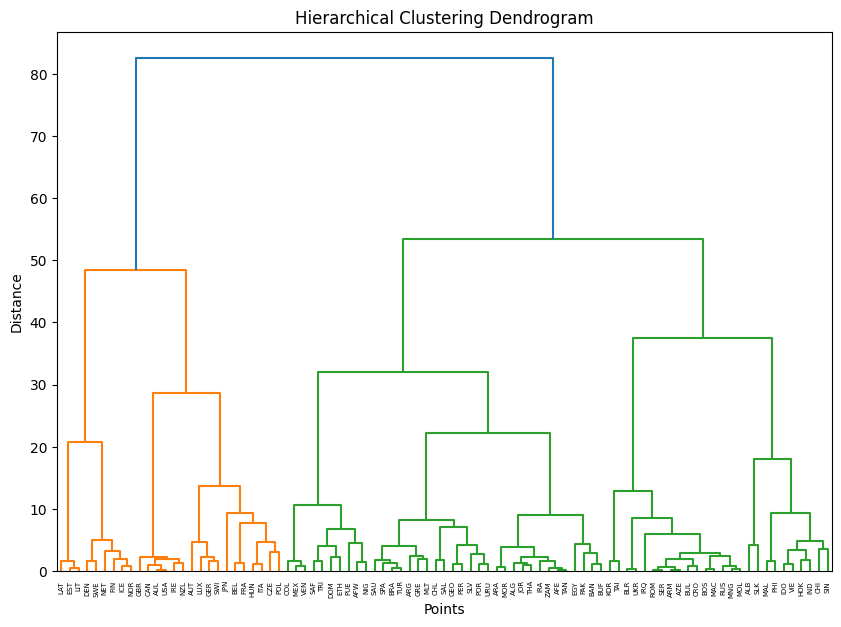

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use the 'single' linkage for hierarchical clustering (based on minimal distances between clusters)
Z = linkage(squareform(distance_matrix), method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=points)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')

plt.savefig('Hierarchical-Clustering-Dendogram.png', format='png')


plt.show()



In [6]:
from sklearn.manifold import MDS

# Perform Multidimensional Scaling (MDS) to convert distance matrix to 2D coordinates
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(distance_matrix)

# The resulting 'mds_coordinates' can now be used for clustering and plotting

In [7]:
from sklearn.cluster import KMeans

# Apply K-Means to the 2D MDS coordinates
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(mds_coordinates)

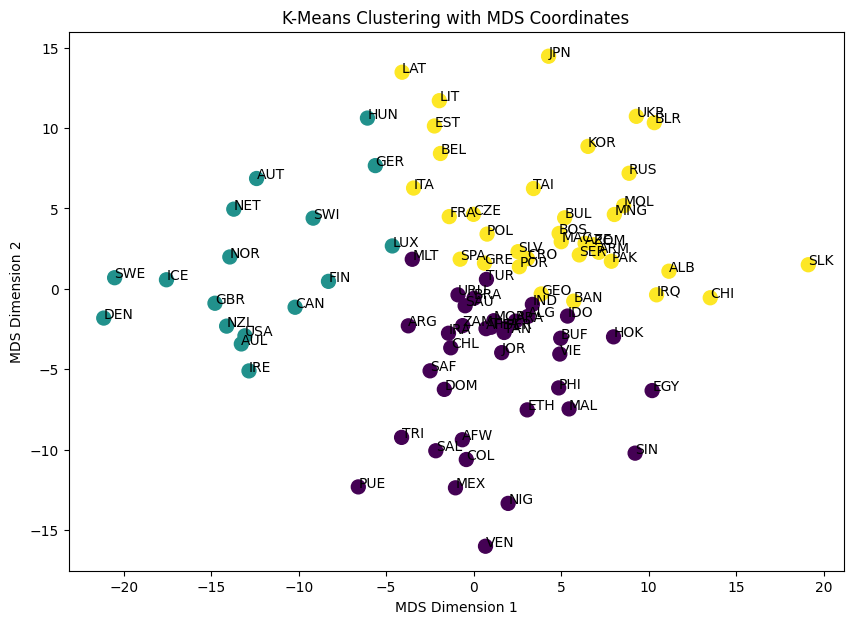

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of MDS coordinates colored by cluster labels
plt.figure(figsize=(10, 7))
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], c=kmeans_labels, cmap='viridis', s=100)

# Annotate the points with the point names
for i, point in enumerate(points):
    plt.annotate(point, (mds_coordinates[i, 0], mds_coordinates[i, 1]))

plt.title('K-Means Clustering with MDS Coordinates')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

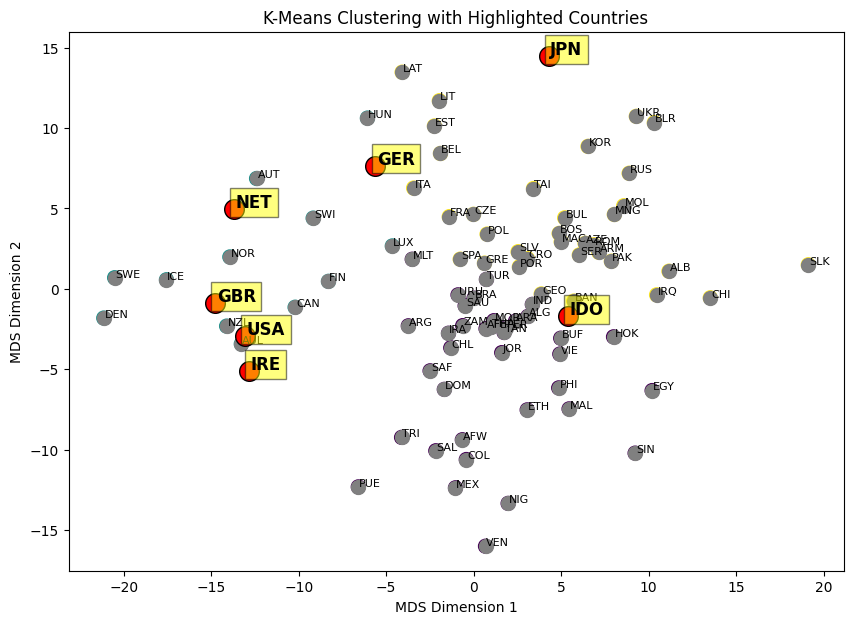

In [ ]:
import matplotlib.pyplot as plt

# List of countries to highlight
highlight_countries = ['GER', 'GBR', 'JPN', 'USA', 'IDO', 'IRE', 'NET']

# Scatter plot of MDS coordinates colored by cluster labels
plt.figure(figsize=(10, 7))

# Plot all points
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], c=kmeans_labels, cmap='viridis', s=100)

# Highlight specific countries
for i, point in enumerate(points):
    if point in highlight_countries:
        plt.scatter(mds_coordinates[i, 0], mds_coordinates[i, 1], color='red', s=200, edgecolor='black')  # Highlighted points
        # Annotate the highlighted points with bold and larger text, offset slightly
        plt.annotate(
            point, 
            (mds_coordinates[i, 0] + 0.1, mds_coordinates[i, 1] + 0.1),  # Adjust the offset for better readability
            fontsize=12,  # Larger font size for highlighted points
            fontweight='bold',  # Bold text
            color='black',  # Font color
            backgroundcolor='white',  # Background color to make the text stand out
            bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black')  # Optional: a box around the text
        )
    else:
        plt.scatter(mds_coordinates[i, 0], mds_coordinates[i, 1], color='gray', s=100)  # Normal points
        plt.annotate(
            point, 
            (mds_coordinates[i, 0] + 0.05, mds_coordinates[i, 1] + 0.05),  # Slight offset for non-highlighted points
            fontsize=8
        )
    
    # Annotate all points with country names
   # plt.annotate(point, (mds_coordinates[i, 0], mds_coordinates[i, 1]), fontsize=8, color='black')

plt.title('K-Means Clustering with Highlighted Countries')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')

plt.savefig('K-Means Cluster Cultural Distances.png', format='png')


plt.show()

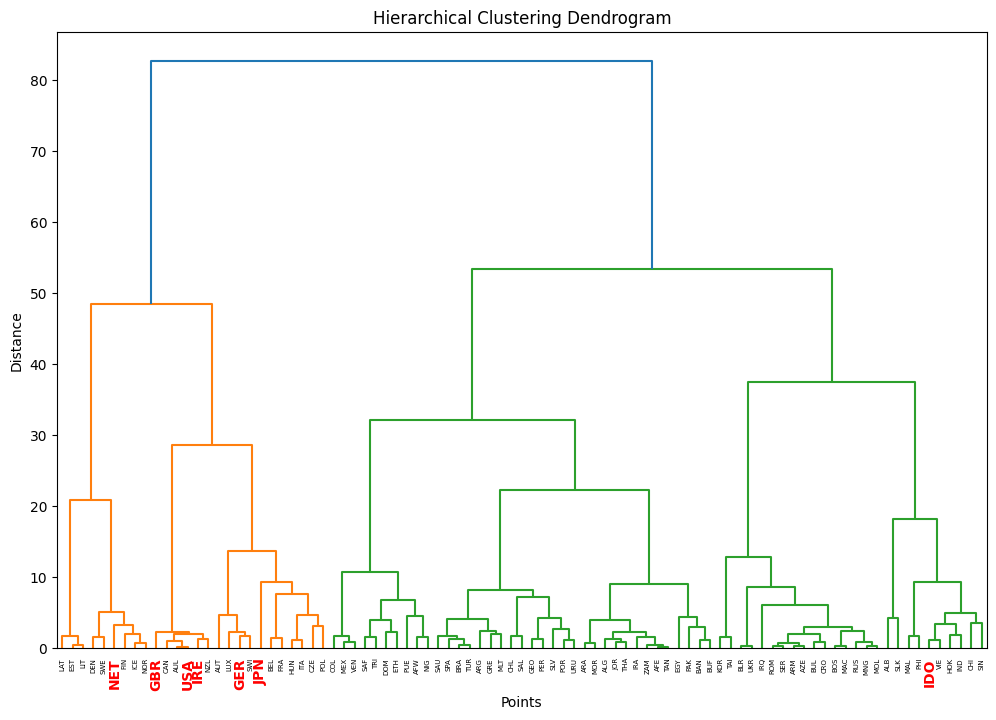

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Suppose `distance_matrix` and `points` are already defined, with 'points' being your country labels
# List of countries to highlight
highlight_countries = ['GER', 'GBR', 'JPN', 'USA', 'IDO', 'IRE', 'NET']
  # Adjust this list with the countries you want to highlight

# Perform hierarchical clustering using Ward's method
Z = linkage(squareform(distance_matrix), method='ward')

# Create the dendrogram and save the object for further customization
plt.figure(figsize=(12, 8))
dendro = dendrogram(Z, labels=points)

# Access the leaf labels
ax = plt.gca()  # Get current axis
x_labels = ax.get_xmajorticklabels()

# Highlight the selected countries by changing label color and font weight
for label in x_labels:
    country = label.get_text()
    if country in highlight_countries:
        label.set_color('red')  # Set the color to red
        label.set_fontweight('bold')  # Make the label bold for better visibility
        label.set_fontsize(10)
# Set title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')

# Save the figure
plt.savefig('Hierarchical-Clustering-Dendrogram-Highlighted.png', format='png')

# Show the plot
plt.show()


In [11]:
culture_map_countries = [
    {"id":1,"name":"Argentina","datamapId":"ARG","isoCode":32,"isoShortCode":"AR","scores":{"communicating":55,"evaluating":35,"leading":60,"deciding":65,"trusting":72,"disagreeing":32,"scheduling":76,"persuading":25}},
    {"id":2,"name":"Australia","datamapId":"AUS","isoCode":36,"isoShortCode":"AU","scores":{"communicating":4,"evaluating":32,"leading":18,"deciding":48,"trusting":16,"disagreeing":34,"scheduling":26,"persuading":86}},
    {"id":3,"name":"Botswana","datamapId":"BWA","isoCode":72,"isoShortCode":"BW","scores":{"communicating":80,"evaluating":73,"leading":90,"deciding":94,"trusting":96,"disagreeing":80,"scheduling":96,"persuading":-1}},
    {"id":4,"name":"Brazil","datamapId":"BRA","isoCode":76,"isoShortCode":"BR","scores":{"communicating":62,"evaluating":65,"leading":57,"deciding":57,"trusting":75,"disagreeing":62,"scheduling":77,"persuading":39}},
    {"id":5,"name":"Canada","datamapId":"CAN","isoCode":124,"isoShortCode":"CA","scores":{"communicating":8,"evaluating":50,"leading":21,"deciding":48,"trusting":6,"disagreeing":54,"scheduling":26,"persuading":92}},
    {"id":6,"name":"Chile","datamapId":"CHL","isoCode":152,"isoShortCode":"CL","scores":{"communicating":58,"evaluating":60,"leading":65,"deciding":60,"trusting":70,"disagreeing":56,"scheduling":76,"persuading":44}},
    {"id":7,"name":"China","datamapId":"CHN","isoCode":156,"isoShortCode":"CN","scores":{"communicating":92,"evaluating":68,"leading":90,"deciding":88,"trusting":88,"disagreeing":80,"scheduling":82,"persuading":-1}},
    {"id":8,"name":"Colombia","datamapId":"COL","isoCode":170,"isoShortCode":"CO","scores":{"communicating":65,"evaluating":65,"leading":70,"deciding":70,"trusting":75,"disagreeing":66,"scheduling":72,"persuading":44}},
    {"id":9,"name":"Denmark","datamapId":"DNK","isoCode":208,"isoShortCode":"DK","scores":{"communicating":27,"evaluating":12,"leading":0,"deciding":16,"trusting":10,"disagreeing":26,"scheduling":24,"persuading":58}},
    {"id":10,"name":"Egypt","datamapId":"EGY","isoCode":818,"isoShortCode":"EG","scores":{"communicating":74,"evaluating":65,"leading":84,"deciding":80,"trusting":76,"disagreeing":64,"scheduling":84,"persuading":-1}},
    {"id":11,"name":"U.A.E (Emirati)","datamapId":"ARE","isoCode":784,"isoShortCode":"AE","scores":{"communicating":70,"evaluating":68,"leading":84,"deciding":80,"trusting":78,"disagreeing":74,"scheduling":70,"persuading":-1}},
    {"id":12,"name":"Finland","datamapId":"FIN","isoCode":246,"isoShortCode":"FI","scores":{"communicating":34,"evaluating":18,"leading":24,"deciding":26,"trusting":24,"disagreeing":60,"scheduling":20,"persuading":56}},
    {"id":13,"name":"France","datamapId":"FRA","isoCode":250,"isoShortCode":"FR","scores":{"communicating":66,"evaluating":17,"leading":67,"deciding":67,"trusting":58,"disagreeing":3,"scheduling":55,"persuading":1}},
    {"id":14,"name":"Germany","datamapId":"DEU","isoCode":276,"isoShortCode":"DE","scores":{"communicating":24,"evaluating":8,"leading":61,"deciding":28,"trusting":20,"disagreeing":9,"scheduling":3,"persuading":22}},
    {"id":15,"name":"Ghana","datamapId":"GHA","isoCode":288,"isoShortCode":"GH","scores":{"communicating":81,"evaluating":78,"leading":96,"deciding":94,"trusting":96,"disagreeing":75,"scheduling":96,"persuading":-1}},
    {"id":16,"name":"India","datamapId":"IND","isoCode":356,"isoShortCode":"IN","scores":{"communicating":76,"evaluating":65,"leading":85,"deciding":85,"trusting":85,"disagreeing":72,"scheduling":88,"persuading":-1}},
    {"id":17,"name":"Indonesia","datamapId":"IDN","isoCode":360,"isoShortCode":"ID","scores":{"communicating":94,"evaluating":96,"leading":92,"deciding":92,"trusting":94,"disagreeing":96,"scheduling":90,"persuading":-1}},
    {"id":18,"name":"Italy","datamapId":"ITA","isoCode":380,"isoShortCode":"IT","scores":{"communicating":65,"evaluating":25,"leading":68,"deciding":66,"trusting":62,"disagreeing":32,"scheduling":64,"persuading":15}},
    {"id":19,"name":"Japan","datamapId":"JPN","isoCode":392,"isoShortCode":"JP","scores":{"communicating":95,"evaluating":90,"leading":91,"deciding":3,"trusting":77,"disagreeing":95,"scheduling":15,"persuading":-1}},
    {"id":20,"name":"Kenya","datamapId":"KEN","isoCode":404,"isoShortCode":"KE","scores":{"communicating":84,"evaluating":70,"leading":90,"deciding":92,"trusting":88,"disagreeing":72,"scheduling":96,"persuading":-1}},
    {"id":21,"name":"Korea","datamapId":"KOR","isoCode":410,"isoShortCode":"KR","scores":{"communicating":94,"evaluating":78,"leading":96,"deciding":94,"trusting":84,"disagreeing":80,"scheduling":64,"persuading":-1}},
    {"id":22,"name":"Kuwait","datamapId":"KWT","isoCode":414,"isoShortCode":"KW","scores":{"communicating":75,"evaluating":75,"leading":87,"deciding":86,"trusting":94,"disagreeing":76,"scheduling":92,"persuading":-1}},
    {"id":23,"name":"Mexico","datamapId":"MEX","isoCode":484,"isoShortCode":"MX","scores":{"communicating":65,"evaluating":64,"leading":68,"deciding":68,"trusting":75,"disagreeing":66,"scheduling":70,"persuading":50}},
    {"id":24,"name":"Morocco","datamapId":"MAR","isoCode":504,"isoShortCode":"MA","scores":{"communicating":74,"evaluating":62,"leading":84,"deciding":80,"trusting":76,"disagreeing":64,"scheduling":84,"persuading":-1}},
    {"id":25,"name":"Netherlands","datamapId":"NLD","isoCode":528,"isoShortCode":"NL","scores":{"communicating":14,"evaluating":4,"leading":6,"deciding":16,"trusting":8,"disagreeing":18,"scheduling":24,"persuading":66}},
    {"id":26,"name":"Nigeria","datamapId":"NGA","isoCode":566,"isoShortCode":"NG","scores":{"communicating":78,"evaluating":26,"leading":100,"deciding":96,"trusting":90,"disagreeing":24,"scheduling":96,"persuading":-1}},
    {"id":27,"name":"Norway","datamapId":"NOR","isoCode":578,"isoShortCode":"NO","scores":{"communicating":34,"evaluating":30,"leading":4,"deciding":10,"trusting":16,"disagreeing":50,"scheduling":20,"persuading":56}},
    {"id":28,"name":"Pakistan","datamapId":"PAK","isoCode":586,"isoShortCode":"PK","scores":{"communicating":78,"evaluating":68,"leading":90,"deciding":86,"trusting":88,"disagreeing":72,"scheduling":88,"persuading":-1}},
    {"id":29,"name":"Peru","datamapId":"PER","isoCode":604,"isoShortCode":"PE","scores":{"communicating":75,"evaluating":75,"leading":76,"deciding":72,"trusting":80,"disagreeing":70,"scheduling":74,"persuading":44}},
    {"id":30,"name":"Philippines","datamapId":"PHL","isoCode":618,"isoShortCode":"PH","scores":{"communicating":94,"evaluating":88,"leading":92,"deciding":92,"trusting":94,"disagreeing":94,"scheduling":90,"persuading":-1}},
    {"id":31,"name":"Poland","datamapId":"POL","isoCode":616,"isoShortCode":"PL","scores":{"communicating":42,"evaluating":12,"leading":65,"deciding":65,"trusting":45,"disagreeing":26,"scheduling":40,"persuading":30}},
    {"id":32,"name":"Portugal","datamapId":"PRT","isoCode":620,"isoShortCode":"PT","scores":{"communicating":56,"evaluating":35,"leading":64,"deciding":64,"trusting":66,"disagreeing":48,"scheduling":65,"persuading":6}},
    {"id":33,"name":"Romania","datamapId":"ROU","isoCode":642,"isoShortCode":"RO","scores":{"communicating":70,"evaluating":32,"leading":80,"deciding":72,"trusting":74,"disagreeing":32,"scheduling":64,"persuading":10}},
    {"id":34,"name":"Russia","datamapId":"RUS","isoCode":643,"isoShortCode":"RU","scores":{"communicating":70,"evaluating":2,"leading":88,"deciding":76,"trusting":74,"disagreeing":8,"scheduling":64,"persuading":10}},
    {"id":35,"name":"Saudi Arabia","datamapId":"SSD","isoCode":682,"isoShortCode":"SA","scores":{"communicating":82,"evaluating":84,"leading":88,"deciding":86,"trusting":94,"disagreeing":74,"scheduling":92,"persuading":-1}},
    {"id":36,"name":"Singapore","datamapId":"XXX","isoCode":702,"isoShortCode":"SG","scores":{"communicating":72,"evaluating":68,"leading":86,"deciding":72,"trusting":68,"disagreeing":62,"scheduling":26,"persuading":-1}},
    {"id":37,"name":"Spain","datamapId":"ESP","isoCode":724,"isoShortCode":"ES","scores":{"communicating":60,"evaluating":30,"leading":60,"deciding":60,"trusting":66,"disagreeing":26,"scheduling":65,"persuading":10}},
    {"id":38,"name":"Sweden","datamapId":"SWE","isoCode":752,"isoShortCode":"SE","scores":{"communicating":34,"evaluating":50,"leading":2,"deciding":1,"trusting":24,"disagreeing":62,"scheduling":18,"persuading":56}},
    {"id":39,"name":"Thailand","datamapId":"THA","isoCode":764,"isoShortCode":"TH","scores":{"communicating":94,"evaluating":98,"leading":92,"deciding":92,"trusting":94,"disagreeing":98,"scheduling":90,"persuading":-1}},
    {"id":40,"name":"Turkey","datamapId":"TUR","isoCode":792,"isoShortCode":"TR","scores":{"communicating":70,"evaluating":58,"leading":80,"deciding":72,"trusting":80,"disagreeing":60,"scheduling":74,"persuading":-1}},
    {"id":41,"name":"UK","datamapId":"GBR","isoCode":826,"isoShortCode":"GB","scores":{"communicating":32,"evaluating":63,"leading":46,"deciding":46,"trusting":15,"disagreeing":55,"scheduling":30,"persuading":76}},
    {"id":42,"name":"United States","datamapId":"USA","isoCode":840,"isoShortCode":"US","scores":{"communicating":3,"evaluating":45,"leading":24,"deciding":64,"trusting":3,"disagreeing":44,"scheduling":22,"persuading":95}},
    {"id":43,"name":"Venezuela","datamapId":"VEN","isoCode":862,"isoShortCode":"VE","scores":{"communicating":70,"evaluating":65,"leading":72,"deciding":72,"trusting":80,"disagreeing":68,"scheduling":72,"persuading":44}},
    {"id":44,"name":"Zimbabwe","datamapId":"ZWE","isoCode":716,"isoShortCode":"ZW","scores":{"communicating":82,"evaluating":74,"leading":95,"deciding":91,"trusting":94,"disagreeing":80,"scheduling":96,"persuading":-1}},
    {"id":45,"name":"Czech Republic","datamapId":"CZE","isoCode":203,"isoShortCode":"CZ","scores":{"communicating":34,"evaluating":10,"leading":70,"deciding":65,"trusting":30,"disagreeing":65,"scheduling":20,"persuading":36}},
    {"id":46,"name":"Ireland","datamapId":"IRL","isoCode":372,"isoShortCode":"IE","scores":{"communicating":32,"evaluating":60,"leading":30,"deciding":30,"trusting":40,"disagreeing":55,"scheduling":35,"persuading":76}},
    {"id":47,"name":"Greece","datamapId":"GRC","isoCode":300,"isoShortCode":"GR","scores":{"communicating":68,"evaluating":19,"leading":67,"deciding":67,"trusting":72,"disagreeing":9,"scheduling":70,"persuading":5}},
    {"id":48,"name":"Israel","datamapId":"ISR","isoCode":376,"isoShortCode":"IL","scores":{"communicating":35,"evaluating":1,"leading":9,"deciding":48,"trusting":62,"disagreeing":1,"scheduling":65,"persuading":90}},
    {"id":49,"name":"Qatar","datamapId":"QAT","isoCode":634,"isoShortCode":"QA","scores":{"communicating":78,"evaluating":80,"leading":86,"deciding":86,"trusting":93,"disagreeing":74,"scheduling":89,"persuading":-1}},
    {"id":50,"name":"Cameroon","datamapId":"CMR","isoCode":120,"isoShortCode":"CM","scores":{"communicating":90,"evaluating":60,"leading":96,"deciding":94,"trusting":97,"disagreeing":60,"scheduling":96,"persuading":-1}},
    {"id":51,"name":"Tanzania","datamapId":"TZA","isoCode":834,"isoShortCode":"TZ","scores":{"communicating":88,"evaluating":78,"leading":92,"deciding":92,"trusting":92,"disagreeing":86,"scheduling":96,"persuading":-1}},
    {"id":52,"name":"Uganda","datamapId":"UGA","isoCode":800,"isoShortCode":"UG","scores":{"communicating":86,"evaluating":70,"leading":93,"deciding":93,"trusting":93,"disagreeing":74,"scheduling":96,"persuading":-1}},
    {"id":53,"name":"Belgium","datamapId":"BEL","isoCode":56,"isoShortCode":"BE","scores":{"communicating":42,"evaluating":25,"leading":50,"deciding":25,"trusting":40,"disagreeing":40,"scheduling":40,"persuading":10}},
    {"id":54,"name":"Hungary","datamapId":"HUN","isoCode":348,"isoShortCode":"HU","scores":{"communicating":70,"evaluating":10,"leading":76,"deciding":76,"trusting":65,"disagreeing":30,"scheduling":20,"persuading":25}},
    {"id":55,"name":"Bolivia","datamapId":"BOL","isoCode":68,"isoShortCode":"BO","scores":{"communicating":72,"evaluating":75,"leading":76,"deciding":72,"trusting":80,"disagreeing":70,"scheduling":74,"persuading":44}},
    {"id":56,"name":"Ethiopia","datamapId":"ETH","isoCode":231,"isoShortCode":"ET","scores":{"communicating":87,"evaluating":80,"leading":96,"deciding":96,"trusting":98,"disagreeing":86,"scheduling":96,"persuading":-1}},
    {"id":57,"name":"Austria","datamapId":"AUT","isoCode":40,"isoShortCode":"AT","scores":{"communicating":42,"evaluating":34,"leading":68,"deciding":66,"trusting":42,"disagreeing":32,"scheduling":30,"persuading":15}},
    {"id":58,"name":"Switzerland","datamapId":"CHE","isoCode":756,"isoShortCode":"CH","scores":{"communicating":34,"evaluating":34,"leading":46,"deciding":55,"trusting":28,"disagreeing":35,"scheduling":1,"persuading":22}},
    {"id":59,"name":"Tunisia","datamapId":"TUN","isoCode":788,"isoShortCode":"TN","scores":{"communicating":76,"evaluating":60,"leading":86,"deciding":80,"trusting":78,"disagreeing":60,"scheduling":84,"persuading":-1}},
    {"id":60,"name":"Ukraine","datamapId":"UKR","isoCode":804,"isoShortCode":"UA","scores":{"communicating":60,"evaluating":3,"leading":75,"deciding":75,"trusting":71,"disagreeing":20,"scheduling":64,"persuading":10}},
    {"id":61,"name":"Malaysia","datamapId":"MYS","isoCode":458,"isoShortCode":"MY","scores":{"communicating":82,"evaluating":78,"leading":89,"deciding":82,"trusting":80,"disagreeing":75,"scheduling":75,"persuading":-1}},
    {"id":62,"name":"Vietnam","datamapId":"VNM","isoCode":704,"isoShortCode":"VN","scores":{"communicating":94,"evaluating":80,"leading":90,"deciding":88,"trusting":84,"disagreeing":86,"scheduling":84,"persuading":-1}},
    {"id":63,"name":"New Zealand","datamapId":"NZL","isoCode":554,"isoShortCode":"NZ","scores":{"communicating":21,"evaluating":35,"leading":20,"deciding":45,"trusting":45,"disagreeing":50,"scheduling":30,"persuading":80}},
    {"id":64,"name":"Jordan","datamapId":"JOR","isoCode":400,"isoShortCode":"JO","scores":{"communicating":73,"evaluating":72,"leading":85,"deciding":86,"trusting":93,"disagreeing":75,"scheduling":75,"persuading":-1}},
    {"id":65,"name":"South Africa (Afrikaans)","datamapId":"ZAF","isoCode":710,"isoShortCode":"ZA","scores":{"communicating":32,"evaluating":12,"leading":50,"deciding":65,"trusting":20,"disagreeing":25,"scheduling":30,"persuading":-1}},
    {"id":66,"name":"South Africa (Zulu)","datamapId":"ZAF","isoCode":710,"isoShortCode":"ZA","scores":{"communicating":75,"evaluating":60,"leading":80,"deciding":80,"trusting":80,"disagreeing":65,"scheduling":84,"persuading":-1}},
    {"id":67,"name":"Bulgaria","datamapId":"BGR","isoCode":100,"isoShortCode":"BG","scores":{"communicating":70,"evaluating":15,"leading":80,"deciding":72,"trusting":74,"disagreeing":26,"scheduling":64,"persuading":10}},
    {"id":68,"name":"Lebanon","datamapId":"LBN","isoCode":422,"isoShortCode":"LB","scores":{"communicating":70,"evaluating":60,"leading":75,"deciding":75,"trusting":78,"disagreeing":55,"scheduling":70,"persuading":-1}},
    {"id":69,"name":"Costa Rica","datamapId":"CRI","isoCode":188,"isoShortCode":"CR","scores":{"communicating":65,"evaluating":55,"leading":65,"deciding":65,"trusting":75,"disagreeing":62,"scheduling":65,"persuading":50}},
    {"id":70,"name":"Jamaica","datamapId":"JAM","isoCode":388,"isoShortCode":"JM","scores":{"communicating":65,"evaluating":30,"leading":78,"deciding":78,"trusting":80,"disagreeing":32,"scheduling":80,"persuading":60}},
    {"id":71,"name":"Dominican Republic","datamapId":"DOM","isoCode":214,"isoShortCode":"DO","scores":{"communicating":75,"evaluating":65,"leading":80,"deciding":80,"trusting":85,"disagreeing":65,"scheduling":80,"persuading":75}}
]

name                Argentina  Australia  Botswana    Brazil    Canada  \
name                                                                     
Argentina            0.000000   4.365175  3.424036  1.789428  4.649963   
Australia            4.365175   0.000000  7.082309  4.623932  1.154614   
Botswana             3.424036   7.082309  0.000000  2.824641  6.928695   
Brazil               1.789428   4.623932  2.824641  0.000000  4.500923   
Canada               4.649963   1.154614  6.928695  4.500923  0.000000   
...                       ...        ...       ...       ...       ...   
Bulgaria             1.447343   5.219606  3.581711  2.839126  5.576598   
Lebanon              1.867543   5.593776  1.924421  1.766365  5.589490   
Costa Rica           1.770328   4.487067  2.911902  0.823612  4.388494   
Jamaica              1.560908   4.798882  3.508068  2.272068  5.030134   
Dominican Republic   2.787232   5.409237  2.820263  1.891860  5.229512   

name                   Chile     Chin

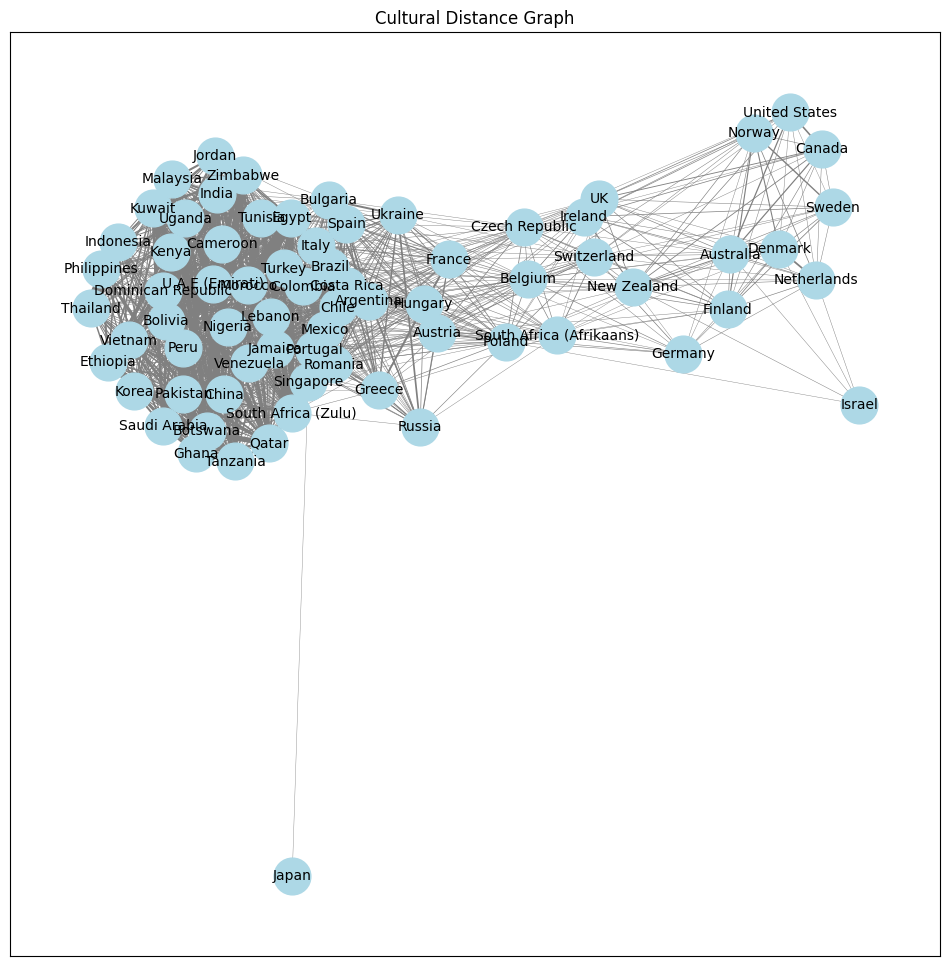

In [12]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
# Flatten the structure to convert into a dataframe
flattened_data = []
for country in culture_map_countries:
    flattened = {
        "id": country["id"],
        "name": country["name"],
        "isoCode": country["isoCode"],
        "isoShortCode": country["isoShortCode"]
    }
    flattened.update(country["scores"])
    flattened_data.append(flattened)

# Convert the flattened data into a pandas DataFrame
df = pd.DataFrame(flattened_data)
# Extract countries and their scores into a pandas DataFrame
data = []
for country in culture_map_countries:
    scores = country["scores"]
    scores["name"] = country["name"]
    data.append(scores)

df = pd.DataFrame(data)
# Calculate Euclidean distances between all countries
# Select only the columns that have the scores (exclude 'name')
scores_df = df.drop(columns=["name"])

variances = scores_df.var()

# Calculate the pairwise Euclidean distances between all countries
distances = pdist(scores_df, metric='seuclidean', V=variances)

# Convert the distances into a square form (a matrix)
distance_matrix = squareform(distances)

# Create a DataFrame for better readability, where rows and columns are countries
meyer_distances_df = pd.DataFrame(distance_matrix, index=df["name"], columns=df["name"])
meyer = df
# Display the distance matrix
print(meyer_distances_df)

# Creation of Distance Graph

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Threshold to filter edges based on distance (optional)
threshold = distances.mean()  # You can adjust this value

# Create a graph
G = nx.Graph()

# Add nodes (countries)
for country in meyer_distances_df.index:
    G.add_node(country)

# Add edges with weights (distances)
for i, country1 in enumerate(meyer_distances_df.index):
    for j, country2 in enumerate(meyer_distances_df.columns):
        if i < j:  # To avoid duplicates (since it's symmetric)
            distance = meyer_distances_df.loc[country1, country2]
            if distance <= threshold:  # Add only edges below the threshold
                G.add_edge(country1, country2, weight=distance)

# Visualize the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Positions for nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
edges = nx.draw_networkx_edges(
    G, pos, edge_color='gray',
    width=[1 / (G[u][v]['weight'] + 1e-5) for u, v in G.edges()]
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Cultural Distance Graph")
plt.show()

In [13]:
hofstede = []

df = pd.read_csv('hofstede-cultural-values.csv')
print(df.head(10))

   ctr      country cultural dimension  Value
0  AFE  Africa East                idv     27
1  AFE  Africa East                ivr     40
2  AFE  Africa East             ltowvs     32
3  AFE  Africa East                mas     41
4  AFE  Africa East                pdi     64
5  AFE  Africa East                uai     52
6  AFW  Africa West                idv     20
7  AFW  Africa West                ivr     78
8  AFW  Africa West             ltowvs      9
9  AFW  Africa West                mas     46


In [14]:
df_pivot = df.pivot(index=['ctr', 'country'], columns='cultural dimension', values='Value').reset_index()
print(df_pivot)

cultural dimension  ctr         country  idv  ivr  ltowvs  mas  pdi  uai
0                   AFE     Africa East   27   40      32   41   64   52
1                   AFW     Africa West   20   78       9   46   77   54
2                   ALB         Albania   27   15      61   80   90   70
3                   ALG         Algeria   29   32      26   35   80   70
4                   ARA  Arab countries   38   34      23   53   80   68
..                  ...             ...  ...  ...     ...  ...  ...  ...
84                  URU         Uruguay   36   53      26   38   61   98
85                  USA          U.S.A.   91   68      26   62   40   46
86                  VEN       Venezuela   12  100      16   73   81   76
87                  VIE         Vietnam   20   35      57   40   70   30
88                  ZAM          Zambia   35   42      30   40   60   50

[89 rows x 8 columns]


In [15]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Ensure country names are unique by dropping duplicates
unique_df = df_pivot.drop_duplicates(subset=['country'])

# Selecting the numerical columns for distance calculation
cultural_dimensions = unique_df[['idv', 'ivr', 'ltowvs', 'mas', 'pdi', 'uai']]

variances = cultural_dimensions.var()

# Calculate the pairwise Euclidean distances between all countries
distances = pdist(cultural_dimensions, metric='seuclidean', V=variances)

# Convert the distances into a square matrix form
distance_matrix = squareform(distances)

# Create a DataFrame for better readability
hofstede_distances_df = pd.DataFrame(distance_matrix, index=unique_df['country'], columns=unique_df['country'])

# Display the distance DataFrame
hofstede_distances_df
hofstede = unique_df

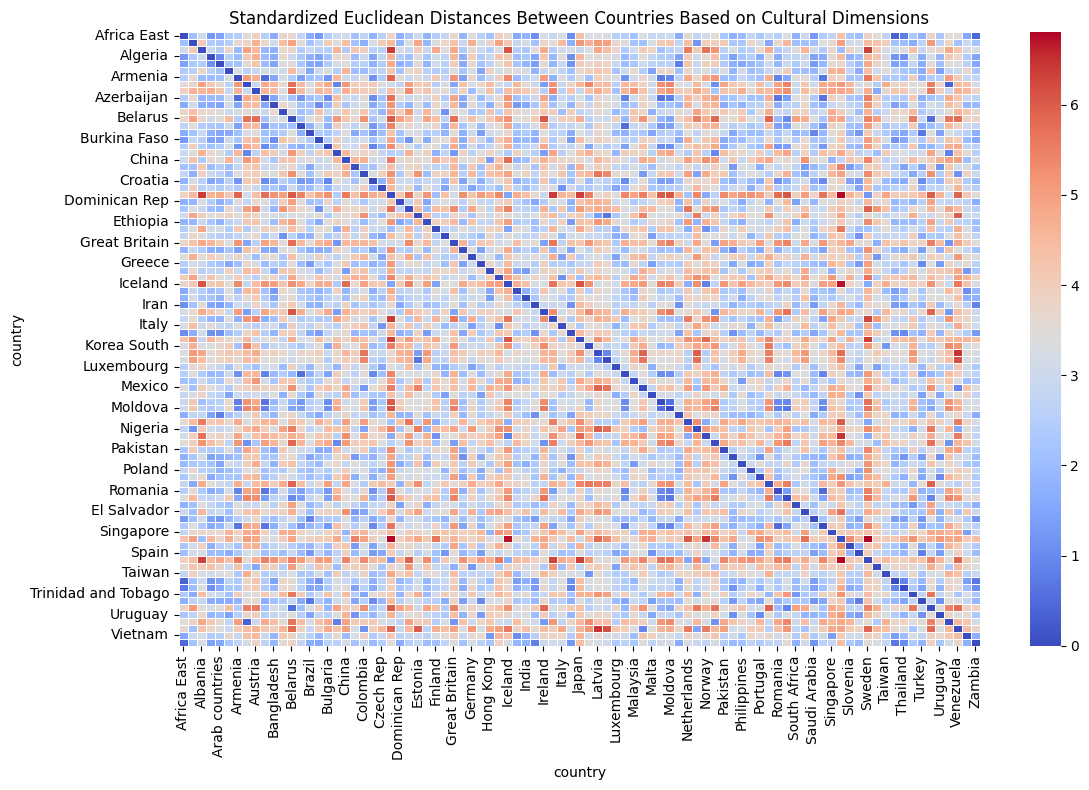

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap of the distance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(hofstede_distances_df, cmap='coolwarm', linewidths=0.5, annot=False, cbar=True)
plt.title('Standardized Euclidean Distances Between Countries Based on Cultural Dimensions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

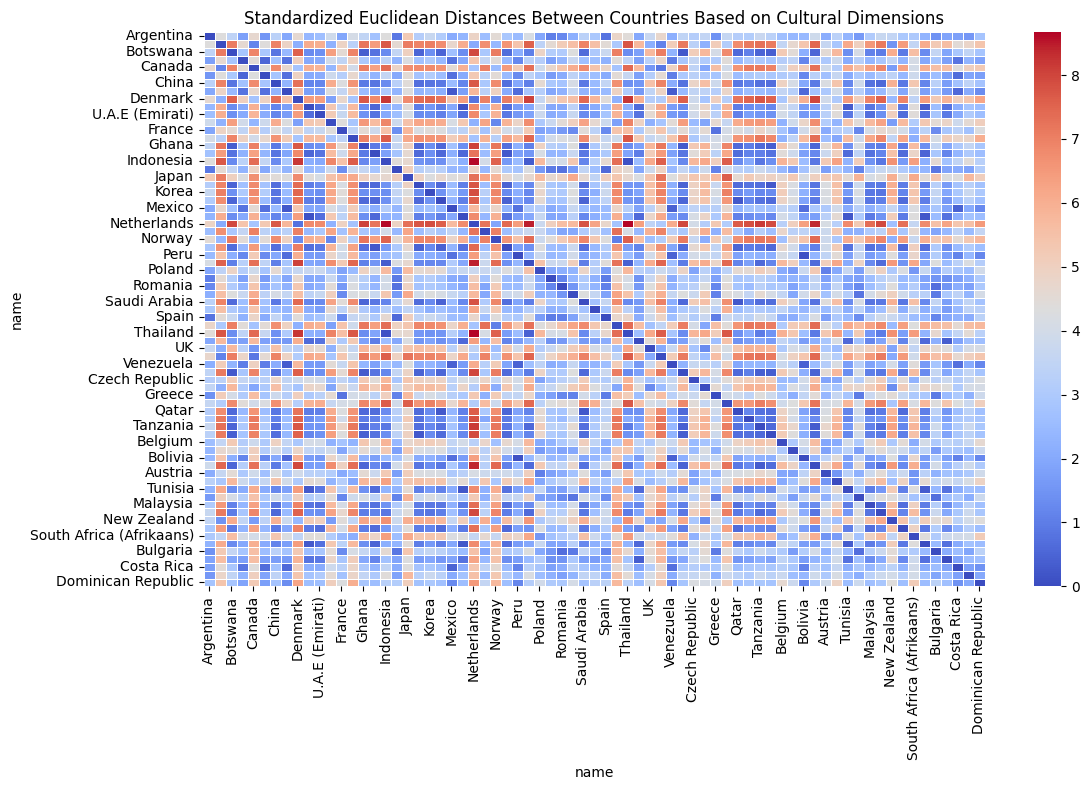

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap of the distance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(meyer_distances_df, cmap='coolwarm', linewidths=0.5, annot=False, cbar=True)
plt.title('Standardized Euclidean Distances Between Countries Based on Cultural Dimensions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import pandas as pd
import numpy as np

In [19]:
# Ensure your DataFrame with distances is correct
# distance_df: a square DataFrame where both rows and columns are country names
hofstede_distances_df  # Just to check the first few rows

country,Africa East,Africa West,Albania,Algeria,Arab countries,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Tanzania,Thailand,Trinidad and Tobago,Turkey,Ukraine,Uruguay,U.S.A.,Venezuela,Vietnam,Zambia
country,,,,,,,,,,,,,,,,,,,,,
Africa East,0.000000,2.074514,3.090235,1.271246,1.428034,2.366963,2.489900,3.530508,3.950538,2.490558,...,0.346031,0.775907,2.353723,1.764552,3.788393,2.278916,3.489470,3.588402,1.539287,0.432066
Africa West,2.074514,0.000000,4.114317,2.389018,2.305157,2.527819,3.589806,3.743594,4.635399,3.691450,...,2.121582,2.021400,1.625483,2.635338,5.086562,2.685992,3.805985,2.103162,3.012166,2.131634
Albania,3.090235,4.114317,0.000000,3.001342,2.423823,3.766477,1.961470,4.975187,4.564080,1.886614,...,2.986834,3.366770,4.333972,2.891396,3.517877,3.752816,4.855800,4.289544,3.182058,3.319271
Algeria,1.271246,2.389018,3.001342,0.000000,1.076191,2.555059,1.984463,4.136597,4.722630,1.940140,...,1.180757,1.111766,3.123844,1.623048,3.173560,1.881614,4.135422,3.757178,2.373543,1.478943
Arab countries,1.428034,2.305157,2.423823,1.076191,0.000000,2.163124,2.113184,3.584231,4.234680,1.984162,...,1.418829,1.649498,2.870858,1.626393,3.490382,2.052952,3.567446,3.343159,2.552201,1.545873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,2.278916,2.685992,3.752816,1.881614,2.052952,1.427589,2.522215,3.726475,3.948132,2.477565,...,2.447918,1.804947,2.856279,1.141116,3.545616,0.000000,3.855701,3.352731,3.611751,2.299427
U.S.A.,3.489470,3.805985,4.855800,4.135422,3.567446,2.788749,5.026030,0.360156,2.941545,4.785658,...,3.715287,3.890974,3.413626,3.570038,5.451973,3.855701,0.000000,4.516363,4.190377,3.125009
Venezuela,3.588402,2.103162,4.289544,3.757178,3.343159,2.925817,4.053405,4.413961,4.626381,4.214565,...,3.657078,3.464620,2.282050,3.297223,5.816343,3.352731,4.516363,0.000000,4.404882,3.697076


In [20]:
# Apply MDS to reduce the distances to 2D space
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(hofstede_distances_df)

# Convert the MDS result to a DataFrame
mds_df = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'], index=hofstede_distances_df.index)

/var/folders/dh/w4dwv9z949s5lr4xx7jrcmmr0000gn/T/ipykernel_72396/711568769.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(country, (mds_df['MDS1'][i], mds_df['MDS2'][i]), fontsize=9)


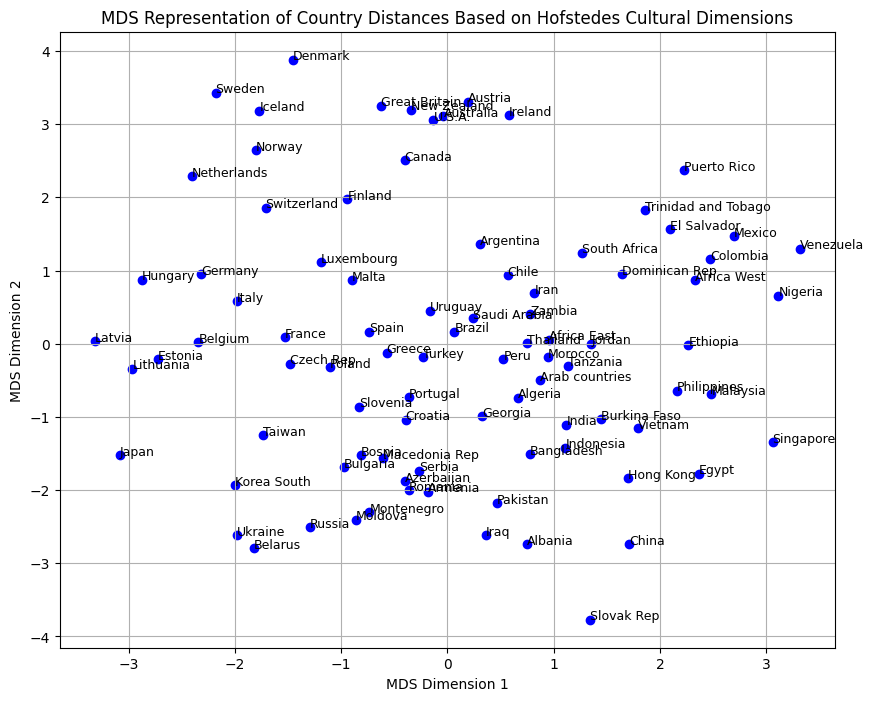

In [21]:
# Create a scatter plot of the MDS result
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], c='blue', marker='o')

# Annotate the points with country names
for i, country in enumerate(mds_df.index):
    plt.annotate(country, (mds_df['MDS1'][i], mds_df['MDS2'][i]), fontsize=9)

plt.title('MDS Representation of Country Distances Based on Hofstedes Cultural Dimensions')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [22]:
# Apply MDS to reduce the distances to 2D space
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_result = mds.fit_transform(meyer_distances_df)

# Convert the MDS result to a DataFrame
mds_df = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'], index=meyer_distances_df.index)

/var/folders/dh/w4dwv9z949s5lr4xx7jrcmmr0000gn/T/ipykernel_72396/2330794098.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(country, (mds_df['MDS1'][i], mds_df['MDS2'][i]), fontsize=9)


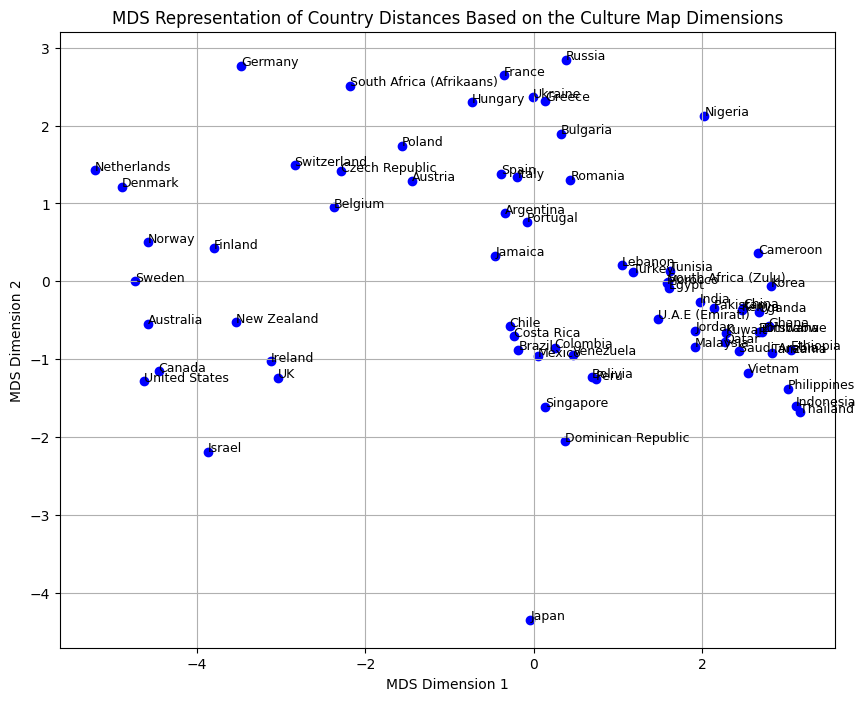

In [23]:
# Create a scatter plot of the MDS result
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], c='blue', marker='o')

# Annotate the points with country names
for i, country in enumerate(mds_df.index):
    plt.annotate(country, (mds_df['MDS1'][i], mds_df['MDS2'][i]), fontsize=9)

plt.title('MDS Representation of Country Distances Based on the Culture Map Dimensions')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [24]:
hofstede

cultural dimension,ctr,country,idv,ivr,ltowvs,mas,pdi,uai
0,AFE,Africa East,27,40,32,41,64,52
1,AFW,Africa West,20,78,9,46,77,54
2,ALB,Albania,27,15,61,80,90,70
3,ALG,Algeria,29,32,26,35,80,70
4,ARA,Arab countries,38,34,23,53,80,68
...,...,...,...,...,...,...,...,...
84,URU,Uruguay,36,53,26,38,61,98
85,USA,U.S.A.,91,68,26,62,40,46
86,VEN,Venezuela,12,100,16,73,81,76
87,VIE,Vietnam,20,35,57,40,70,30


In [25]:
my_countries = [
    "Japan",
    "UK",
    "United States",
    "Indonesia",
    "Germany"
]

output = pd.DataFrame()
#output = pd.concat([meyer.query('name=="'+my_countries[0]+'"'),meyer.query('name=="'+my_countries[1]+'"'),meyer.query('name=="'+my_countries[2]+'"'),meyer.query('name=="'+my_countries[3]+'"')])
output = pd.concat([meyer.query('name=="'+my_countries[0]+'"'),meyer.query('name=="'+my_countries[1]+'"')])
output

,communicating,evaluating,leading,deciding,trusting,disagreeing,scheduling,persuading,name
18,95,90,91,3,77,95,15,-1,Japan
40,32,63,46,46,15,55,30,76,UK


In [26]:
hs_countries = [
    'Japan',
    'Great Britain',
    'U.S.A.',
    'Indonesia',
    'Germany'
]
output = pd.DataFrame()
#output = pd.concat([hofstede.query('country=="'+hs_countries[0]+'"'),hofstede.query('country=="'+hs_countries[1]+'"'),hofstede.query('country=="'+hs_countries[2]+'"'),hofstede.query('country=="'+hs_countries[3]+'"')])
output = pd.concat([hofstede.query('country=="'+hs_countries[0]+'"'),hofstede.query('country=="'+hs_countries[1]+'"')])
output = output.reindex(['ctr','country','pdi','idv','mas','uai','ltowvs','ivr'], axis=1)
output

cultural dimension,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
44,JPN,Japan,54,46,95,92,88,42
30,GBR,Great Britain,35,89,66,35,51,69


In [27]:
hofstede_distances_df
print("Culture Map Distance between " + my_countries[0] + " <> " + my_countries[1] + ": " + str(meyer_distances_df.loc[my_countries[0], my_countries[1]]))
print("Hofstede Distance: " + hs_countries[0] + " <> " + hs_countries[1] + ": " + str(hofstede_distances_df.loc[hs_countries[0], hs_countries[1]]))


Culture Map Distance between Japan <> UK: 5.360213533655657
Hofstede Distance: Japan <> Great Britain: 4.215322972760015


In [28]:
hofstede_distances_df.to_excel("hofstede_dist.xlsx")
meyer_distances_df.to_excel("meyer_dist.xlsx")


In [29]:
my_countries = [
    "Germany",
    "UK",
]

output = pd.DataFrame()
#output = pd.concat([meyer.query('name=="'+my_countries[0]+'"'),meyer.query('name=="'+my_countries[1]+'"'),meyer.query('name=="'+my_countries[2]+'"'),meyer.query('name=="'+my_countries[3]+'"')])
output = pd.concat([meyer.query('name=="'+my_countries[0]+'"'),meyer.query('name=="'+my_countries[1]+'"')])
output

,communicating,evaluating,leading,deciding,trusting,disagreeing,scheduling,persuading,name
13,24,8,61,28,20,9,3,22,Germany
40,32,63,46,46,15,55,30,76,UK


In [30]:
hs_countries = [
    'Germany',
    'Great Britain',
]
output = pd.DataFrame()
#output = pd.concat([hofstede.query('country=="'+hs_countries[0]+'"'),hofstede.query('country=="'+hs_countries[1]+'"'),hofstede.query('country=="'+hs_countries[2]+'"'),hofstede.query('country=="'+hs_countries[3]+'"')])
output = pd.concat([hofstede.query('country=="'+hs_countries[0]+'"'),hofstede.query('country=="'+hs_countries[1]+'"')])
output = output.reindex(['ctr','country','pdi','idv','mas','uai','ltowvs','ivr'], axis=1)
output

cultural dimension,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
32,GER,Germany,35,67,66,65,83,40
30,GBR,Great Britain,35,89,66,35,51,69


In [31]:
hofstede_distances_df
print("Culture Map Distance between " + my_countries[0] + " <> " + my_countries[1] + ": " + str(meyer_distances_df.loc[my_countries[0], my_countries[1]]))
print("Hofstede Distance: " + hs_countries[0] + " <> " + hs_countries[1] + ": " + str(hofstede_distances_df.loc[hs_countries[0], hs_countries[1]]))


Culture Map Distance between Germany <> UK: 3.604101983670023
Hofstede Distance: Germany <> Great Britain: 2.508768399193425
